In [2]:
# Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão dos gráficos
plt.rcParams['font.size'] = 12          # Tamanho da fonte padrão

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Célula 2 (Ajustada): Carregar os Dados em DataFrames nomeados

# Definir o caminho base para os datasets
base_path = "zProjeto_Final/Datasets/" # Mantenha se seus arquivos estiverem aqui

# Função auxiliar para carregar CSVs com tentativas de separador e encoding
def load_csv_robust(file_path):
    try:
        df = pd.read_csv(file_path, sep=',', encoding='utf-8')
        print(f"Successfully loaded {file_path} with sep=',' and encoding='utf-8'.")
        return df
    except Exception as e:
        try:
            df = pd.read_csv(file_path, sep=';', encoding='latin1')
            print(f"Successfully loaded {file_path} with sep=';' and encoding='latin1'.")
            return df
        except Exception as e:
            try:
                df = pd.read_csv(file_path, encoding='utf-8') # Tenta ',' sem sep explícito
                print(f"Successfully loaded {file_path} with default sep (',') and encoding='utf-8'.")
                return df
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
                return None

# Carregar cada arquivo CSV
# Mantenha os DataFrames que você já estava usando
df_americanas = load_csv_robust(base_path + "Americanas.csv")
df_comercio = load_csv_robust(base_path + "Comercio.csv")
df_dados_economicos = load_csv_robust(base_path + "dados_economicos.csv")
df_exportacao = load_csv_robust(base_path + "Exportacao.csv")
df_importacao = load_csv_robust(base_path + "Importacao.csv")
df_producao = load_csv_robust(base_path + "Producao.csv")

# AGORA CARREGAMOS O NOVO ARQUIVO CLIMÁTICO
df_clima_detalhado = load_csv_robust(base_path + "resumo_climatico.csv") # Novo DataFrame

# df_resumo_climatico = load_csv_robust(base_path + "resumo_climatico_anual.csv") # Se você ainda precisar do antigo

df_sem_classificacao = load_csv_robust(base_path + "Sem_Classificacao.csv")
df_viniferas = load_csv_robust(base_path + "Viniferas.csv")


# Opcional: Imprimir as primeiras linhas e colunas para verificar o carregamento
print("\n--- Verificação dos DataFrames Carregados ---")

if df_exportacao is not None:
    print("\nDataFrame df_exportacao:")
    print(df_exportacao.head())
    print(f"Colunas: {df_exportacao.columns.tolist()}")

if df_clima_detalhado is not None: # Verifica o novo DF de clima
    print("\nDataFrame df_clima_detalhado:")
    print(df_clima_detalhado.head())
    print(f"Colunas: {df_clima_detalhado.columns.tolist()}")

# ... (Mantenha as verificações para outros DataFrames se quiser)

Successfully loaded zProjeto_Final/Datasets/Americanas.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/Comercio.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/dados_economicos.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/Exportacao.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/Importacao.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/Producao.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/resumo_climatico.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/Sem_Classificacao.csv with sep=',' and encoding='utf-8'.
Successfully loaded zProjeto_Final/Datasets/Viniferas.csv with sep=',' and encoding='utf-8'.

--- Verificação dos DataFrames Carregados ---

DataFrame df_exportacao:
          País   Ano  Quantidade (kg)  Valor_USD
0  Afeganistão  19

In [ ]:
#Análise Exploratória do DataFrame de Exportação (df_exportacao)

if df_exportacao is not None:
    print("--- Informações do DataFrame df_exportacao ---")
    print(df_exportacao.info())

    print("\n--- Primeiras 5 linhas do df_exportacao ---")
    print(df_exportacao.head())

    print("\n--- Nomes das Colunas do df_exportacao ---")
    print(df_exportacao.columns.tolist())

    print("\n--- Estatísticas Descritivas para colunas numéricas do df_exportacao ---")
    print(df_exportacao.describe())

    print("\n--- Valores únicos na coluna 'País' (ou similar) ---")
    # Tentativa de encontrar a coluna de país de destino
    colunas_pais = [col for col in df_exportacao.columns if 'País' in col or 'País de Destino' in col or 'País de destino' in col or 'Países' in col]
    if colunas_pais:
        print(f"Colunas identificadas como país: {colunas_pais}")
        for col_pais in colunas_pais:
            print(f"\nValores únicos em '{col_pais}':")
            print(df_exportacao[col_pais].unique())
    else:
        print("Nenhuma coluna contendo 'País' ou 'destino' encontrada. Por favor, inspecione as colunas acima.")

    print("\n--- Anos presentes no df_exportacao ---")
    # Tentativa de encontrar a coluna de ano
    colunas_ano = [col for col in df_exportacao.columns if 'Ano' in col or 'year' in col]
    if colunas_ano:
        print(f"Colunas identificadas como ano: {colunas_ano}")
        for col_ano in colunas_ano:
            print(f"\nValores únicos em '{col_ano}':")
            # Ordenar os anos para melhor visualização
            print(sorted(df_exportacao[col_ano].unique()))
    else:
        print("Nenhuma coluna contendo 'Ano' ou 'year' encontrada. Por favor, inspecione as colunas acima.")

    # A partir da saída da célula 2, vimos que há colunas como '1970', '1971', etc.
    # Isso indica que os anos são as colunas e os valores são as quantidades/valores.
    # Vamos identificar as colunas que representam os anos e o tipo (quantidade ou valor)

    # Identificar colunas que parecem anos
    colunas_numericas = df_exportacao.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print(f"\nColunas numéricas em df_exportacao: {colunas_numericas}")

    # Vamos assumir que o nome da coluna para o País é 'País' e as colunas de anos são os próprios anos.
    # Isso será confirmado com a saída de df_exportacao.head()
    # Pela descrição do problema: "Quantidade em litros de vinho exportado (utilize: 1KG =1L)."
    # E "Valor em US$."
    # Pode ser que tenhamos duas linhas para cada país e ano: uma para quantidade e outra para valor.
    # Ou que as colunas sejam 'País', 'Tipo_Exportacao' (Quantidade/Valor), '1970', '1971', ...

else:
    print("DataFrame 'df_exportacao' não está disponível para análise. Verifique o carregamento.")

--- Informações do DataFrame df_exportacao ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7755 entries, 0 to 7754
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   País             7755 non-null   object
 1   Ano              7755 non-null   int64 
 2   Quantidade (kg)  7755 non-null   int64 
 3   Valor_USD        7755 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 242.5+ KB
None

--- Primeiras 5 linhas do df_exportacao ---
          País   Ano  Quantidade (kg)  Valor_USD
0  Afeganistão  1970                0          0
1  Afeganistão  1971                0          0
2  Afeganistão  1972                0          0
3  Afeganistão  1973                0          0
4  Afeganistão  1974                0          0

--- Nomes das Colunas do df_exportacao ---
['País', 'Ano', 'Quantidade (kg)', 'Valor_USD']

--- Estatísticas Descritivas para colunas numéricas do df_exportacao ---
               

In [ ]:
# Preparação e Filtragem dos Dados de Exportação

# Verificar se df_exportacao existe antes de prosseguir
if df_exportacao is not None:
    print("--- Preparando e Filtrando os Dados de Exportação ---")

    # 1. Renomear colunas para maior clareza (opcional, mas boa prática)
    # Aparentemente, os nomes já estão bons, mas vamos padronizar para evitar espaços e caracteres especiais
    df_exportacao.rename(columns={
        'Quantidade (kg)': 'Quantidade_Litros',
        'Valor_USD': 'Valor_USD'
    }, inplace=True)

    print("\nColunas após renomear:")
    print(df_exportacao.columns.tolist())

    # 2. Filtrar os dados para os últimos 15 anos
    # Definir o ano atual (usando 2024 como ano mais recente no dataset)
    ano_atual = df_exportacao['Ano'].max()
    ano_inicio_analise = ano_atual - 14 # 15 anos incluindo o ano atual (2024 - 14 = 2010)

    df_exportacao_ultimos_15_anos = df_exportacao[
        (df_exportacao['Ano'] >= ano_inicio_analise) &
        (df_exportacao['Ano'] <= ano_atual)
    ].copy() # Usar .copy() para evitar SettingWithCopyWarning

    print(f"\nDados filtrados para os anos de {ano_inicio_analise} a {ano_atual}.")
    print(f"Total de linhas após filtro: {len(df_exportacao_ultimos_15_anos)}")

    # 3. Verificar valores ausentes nos dados filtrados
    print("\nValores ausentes nos dados filtrados (últimos 15 anos):")
    print(df_exportacao_ultimos_15_anos.isnull().sum())

    # 4. Remover linhas com 0 Quantidade e 0 Valor_USD (se representarem ausência de exportação real)
    # É comum ter zeros em exportação se não houve movimentação para aquele país/ano.
    # Vamos manter as linhas com 0, pois significam 'nenhuma exportação'.
    # Apenas se houvesse NaN, trataríamos. Como não tem, ótimo.

    # 5. Calcular o montante de venda por país e ano
    df_montante_exportacao = df_exportacao_ultimos_15_anos.groupby(['Ano', 'País']).agg(
        Total_Litros=('Quantidade_Litros', 'sum'),
        Total_Valor_USD=('Valor_USD', 'sum')
    ).reset_index()

    print("\n--- Montante de Exportação por Ano e País (últimos 15 anos) ---")
    print(df_montante_exportacao.head())
    print(f"Total de linhas no DataFrame de montante: {len(df_montante_exportacao)}")

    # Identificar os 10 principais países em termos de valor exportado nos últimos 15 anos
    top_10_paises = df_montante_exportacao.groupby('País')['Total_Valor_USD'].sum().nlargest(10).index.tolist()
    print(f"\nTop 10 países de destino (por Valor_USD acumulado): {top_10_paises}")

    # Filtrar o df_montante_exportacao para incluir apenas os top 10 países para futuras visualizações
    df_montante_top_paises = df_montante_exportacao[df_montante_exportacao['País'].isin(top_10_paises)].copy()
    print(f"\nPrimeiras 5 linhas do Montante para Top 10 Países:")
    print(df_montante_top_paises.head())


else:
    print("DataFrame 'df_exportacao' não está disponível. Não foi possível realizar a preparação.")

--- Preparando e Filtrando os Dados de Exportação ---

Colunas após renomear:
['País', 'Ano', 'Quantidade_Litros', 'Valor_USD']

Dados filtrados para os anos de 2010 a 2024.
Total de linhas após filtro: 2115

Valores ausentes nos dados filtrados (últimos 15 anos):
País                 0
Ano                  0
Quantidade_Litros    0
Valor_USD            0
dtype: int64

--- Montante de Exportação por Ano e País (últimos 15 anos) ---
    Ano                             País  Total_Litros  Total_Valor_USD
0  2010                      Afeganistão             0                0
1  2010  Alemanha, República Democrática         27715           138666
2  2010                           Angola         33557           189891
3  2010                         Anguilla             0                0
4  2010              Antilhas Holandesas          9810            12808
Total de linhas no DataFrame de montante: 2115

Top 10 países de destino (por Valor_USD acumulado): ['Paraguai', 'Rússia', 'Estados U

--- Gerando Visualizações dos Dados de Exportação ---


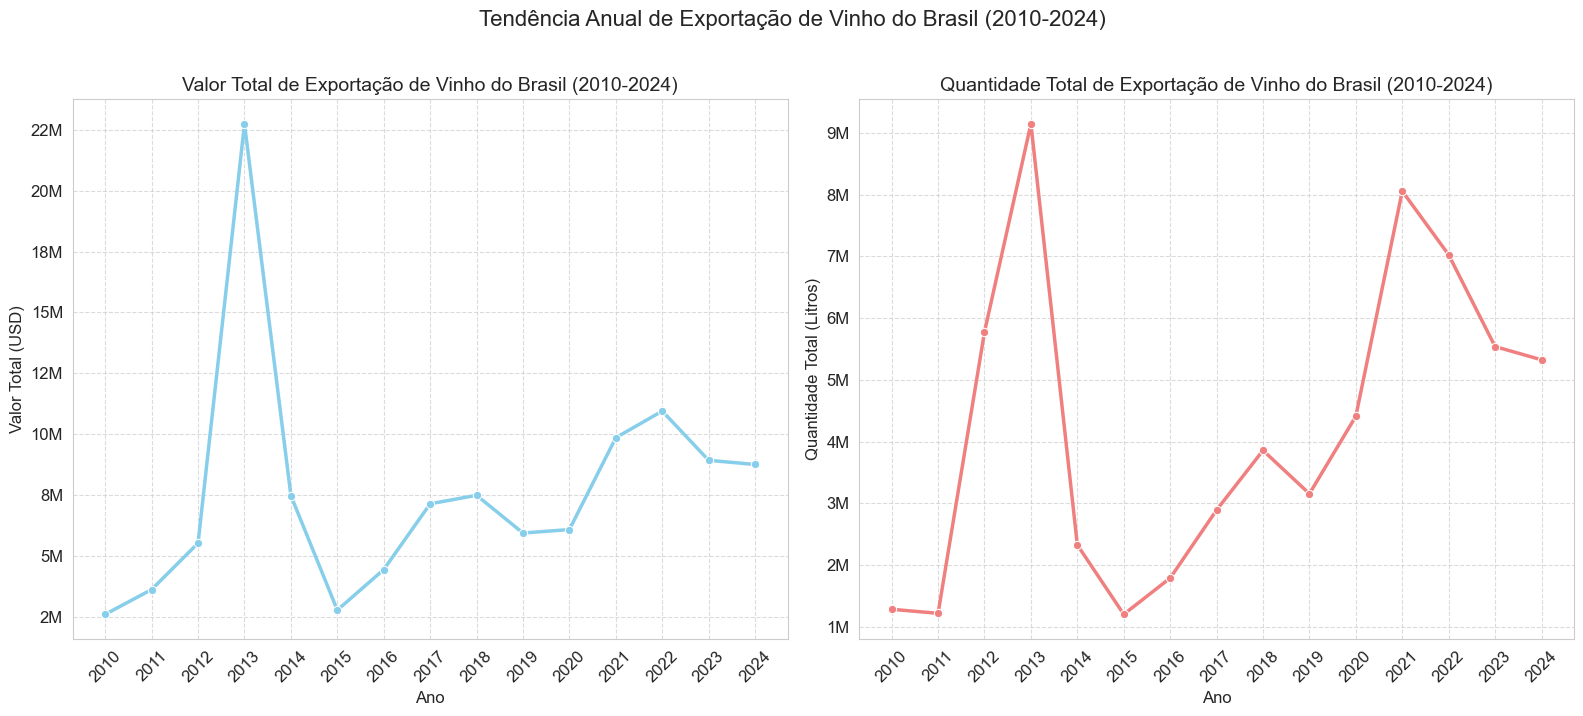

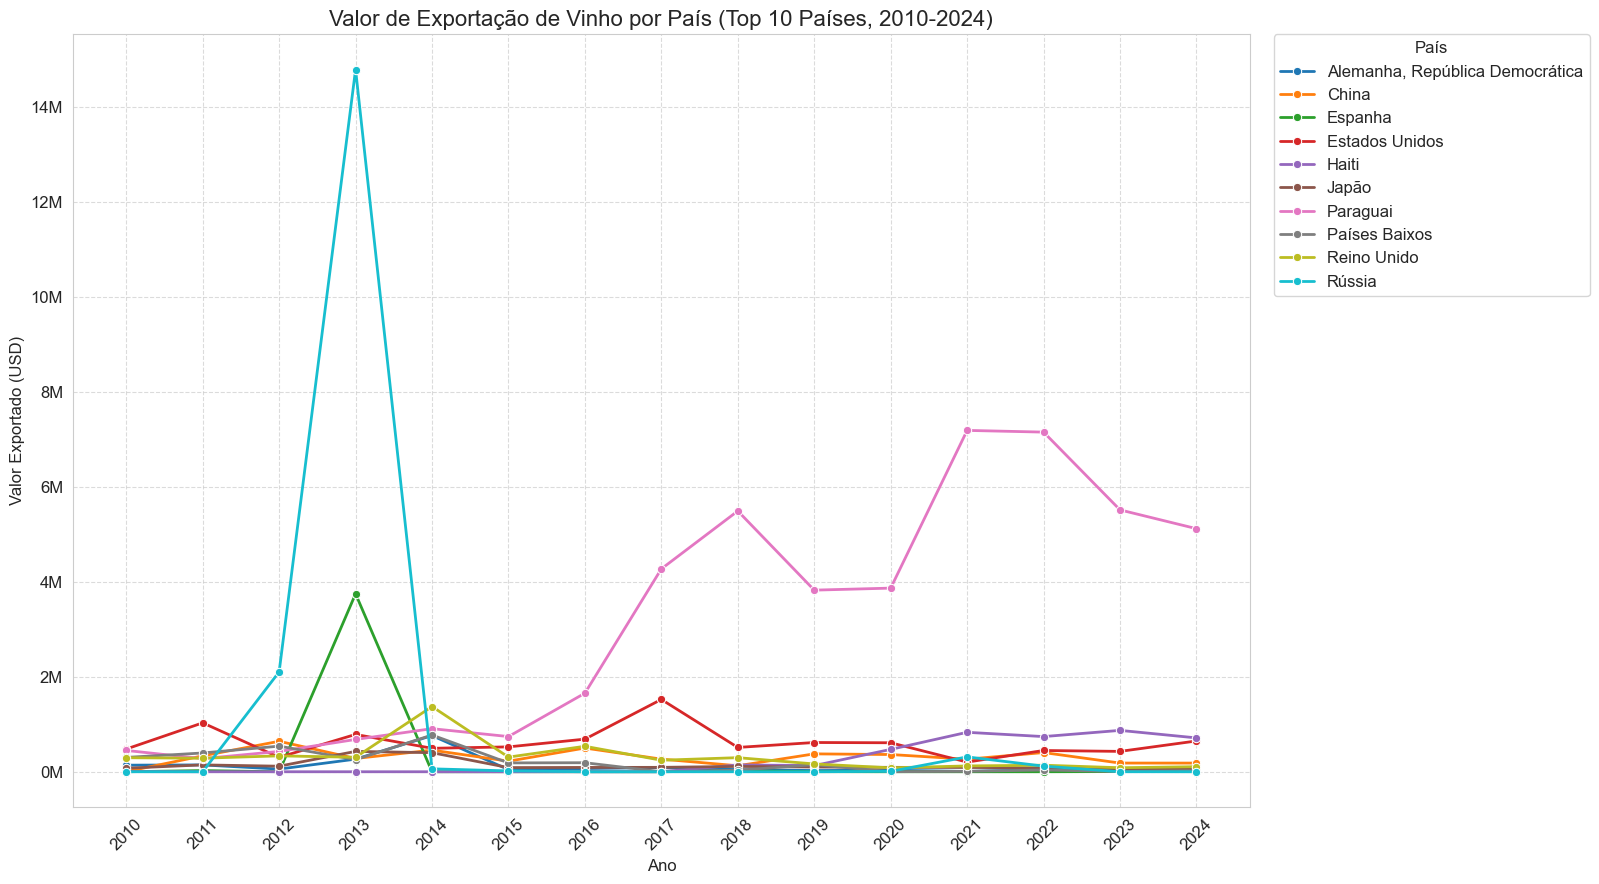

C:\Users\zirn1\AppData\Local\Temp\ipykernel_20192\4223967287.py:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_10_valor, x='Total_Valor_USD', y='País', palette='viridis', ci=None) # ci=None remove as barras de erro padrão
C:\Users\zirn1\AppData\Local\Temp\ipykernel_20192\4223967287.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_valor, x='Total_Valor_USD', y='País', palette='viridis', ci=None) # ci=None remove as barras de erro padrão


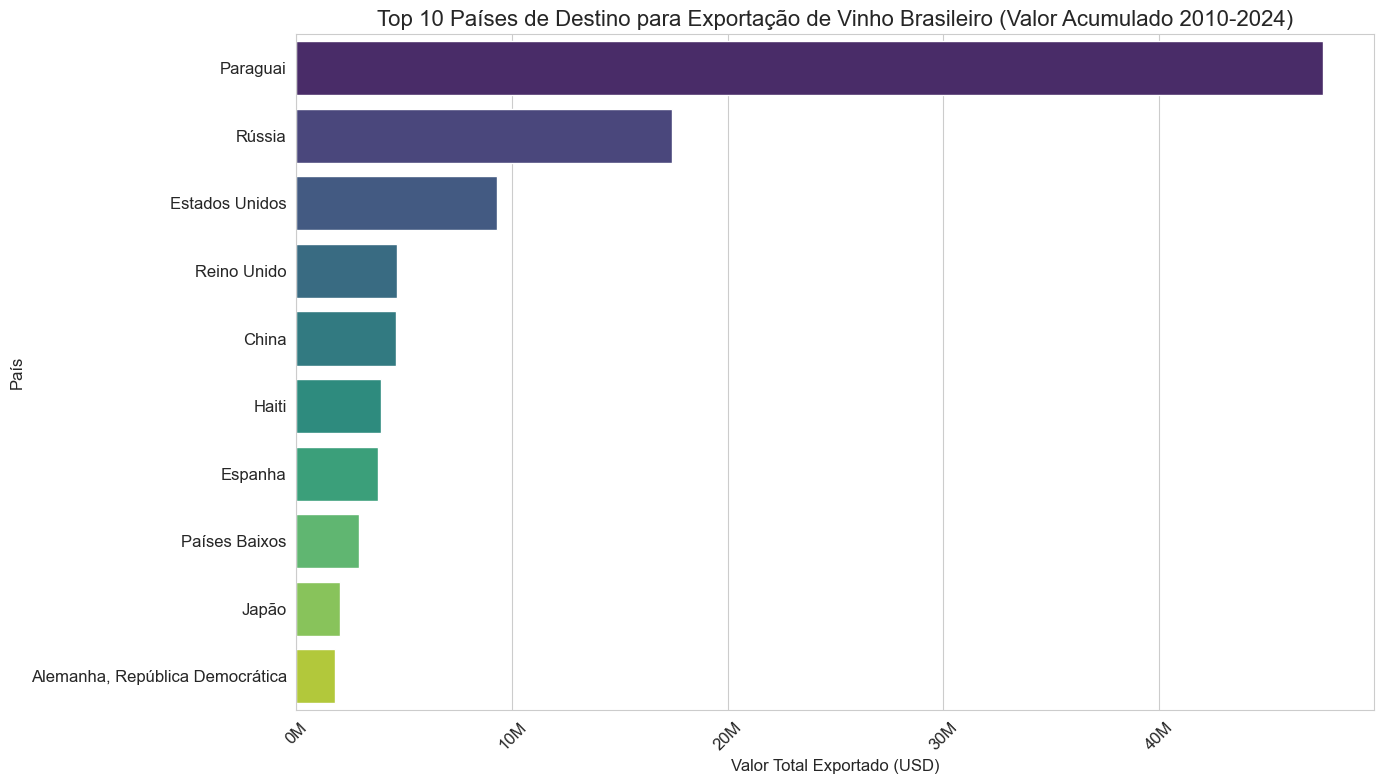

C:\Users\zirn1\AppData\Local\Temp\ipykernel_20192\4223967287.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_10_litros, x='Total_Litros', y='País', palette='magma', ci=None) # ci=None remove as barras de erro padrão
C:\Users\zirn1\AppData\Local\Temp\ipykernel_20192\4223967287.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_litros, x='Total_Litros', y='País', palette='magma', ci=None) # ci=None remove as barras de erro padrão


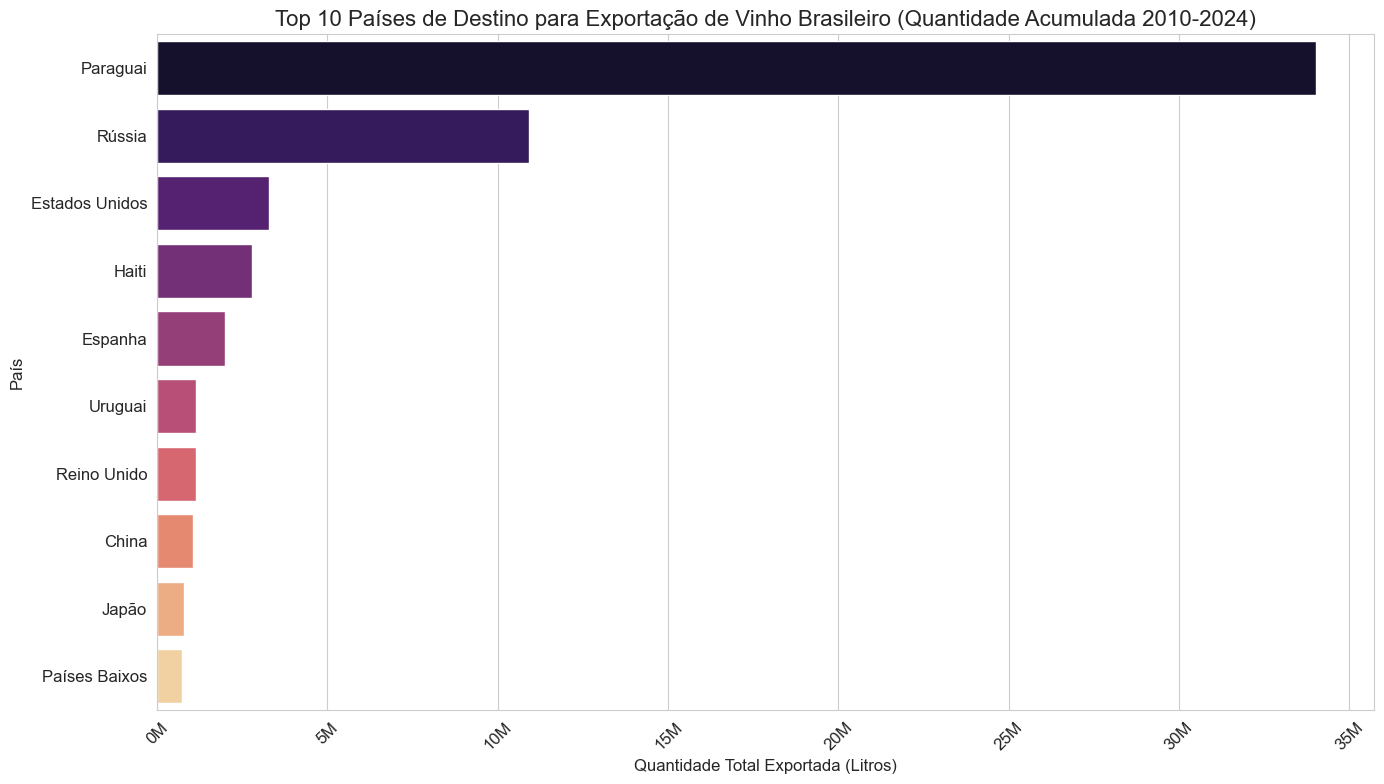

In [ ]:
# Célula 5 (Revisada): Visualização dos Dados de Exportação - Melhoria de Formatação

print("--- Gerando Visualizações dos Dados de Exportação ---")

# 1. Exportação Total (Litros e Valor) ao longo dos anos (últimos 15 anos)
df_total_anual = df_montante_exportacao.groupby('Ano').agg(
    Total_Litros_Anual=('Total_Litros', 'sum'),
    Total_Valor_USD_Anual=('Total_Valor_USD', 'sum')
).reset_index()

plt.figure(figsize=(16, 7)) # Aumentei um pouco a largura para melhor espaço

# Gráfico de Linhas para Valor Total em USD
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
sns.lineplot(data=df_total_anual, x='Ano', y='Total_Valor_USD_Anual', marker='o', color='skyblue', linewidth=2.5) # Linha mais grossa
plt.title('Valor Total de Exportação de Vinho do Brasil (2010-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor Total (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatação personalizada do eixo Y para USD (Milhões)
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{x*1e-6:,.0f}M' # Converte para milhões e formata com 0 casas decimais

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ticklabel_format(style='plain', axis='x') # Garante que os anos não sejam notação científica
plt.xticks(df_total_anual['Ano']) # Força todos os anos a aparecerem no eixo X
plt.tick_params(axis='x', rotation=45) # Rotaciona os labels do eixo X


# Gráfico de Linhas para Quantidade Total em Litros
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
sns.lineplot(data=df_total_anual, x='Ano', y='Total_Litros_Anual', marker='o', color='lightcoral', linewidth=2.5) # Linha mais grossa
plt.title('Quantidade Total de Exportação de Vinho do Brasil (2010-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade Total (Litros)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatação personalizada do eixo Y para Litros (Milhões)
def millions_formatter_liters(x, pos):
    return f'{x*1e-6:,.0f}M' # Converte para milhões e formata com 0 casas decimais

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter_liters))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(df_total_anual['Ano'])
plt.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta layout e dá um pequeno espaço para o título
plt.suptitle('Tendência Anual de Exportação de Vinho do Brasil (2010-2024)', fontsize=16, y=1.02) # Título geral
plt.show()


# 2. Exportação (Valor USD) por País ao longo dos anos (Top 10 Países)
plt.figure(figsize=(18, 9)) # Aumentei o tamanho para mais espaço e legibilidade
sns.lineplot(data=df_montante_top_paises, x='Ano', y='Total_Valor_USD', hue='País', marker='o', linewidth=2)
plt.title('Valor de Exportação de Vinho por País (Top 10 Países, 2010-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor Exportado (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatação do eixo Y para USD (Milhões)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(df_total_anual['Ano']) # Mantém os mesmos ticks de ano
plt.tick_params(axis='x', rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Move legenda para fora
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajusta layout para a legenda lateral
plt.show()

# 3. Gráfico de Barras para os Top 10 Países (Valor Acumulado)
plt.figure(figsize=(14, 8)) # Ajustei tamanho
sns.barplot(data=df_top_10_valor, x='Total_Valor_USD', y='País', palette='viridis', ci=None) # ci=None remove as barras de erro padrão
plt.title('Top 10 Países de Destino para Exportação de Vinho Brasileiro (Valor Acumulado 2010-2024)', fontsize=16)
plt.xlabel('Valor Total Exportado (USD)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter)) # Formatação do eixo X
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 4. Gráfico de Barras para os Top 10 Países (Quantidade Acumulada)
plt.figure(figsize=(14, 8)) # Ajustei tamanho
sns.barplot(data=df_top_10_litros, x='Total_Litros', y='País', palette='magma', ci=None) # ci=None remove as barras de erro padrão
plt.title('Top 10 Países de Destino para Exportação de Vinho Brasileiro (Quantidade Acumulada 2010-2024)', fontsize=16)
plt.xlabel('Quantidade Total Exportada (Litros)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter_liters)) # Formatação do eixo X
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

--- Análise e Integração com Dados Climáticos (Novo Dataset) ---

--- Informações do DataFrame df_clima_detalhado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ano                 185 non-null    int64  
 1   Mes                 185 non-null    int64  
 2   Precipitacao_min    185 non-null    float64
 3   Precipitacao_media  185 non-null    float64
 4   Precipitacao_max    185 non-null    float64
 5   Temperatura_min     185 non-null    float64
 6   Temperatura_media   185 non-null    float64
 7   Temperatura_max     185 non-null    float64
 8   Vento_min           185 non-null    float64
 9   Vento_media         185 non-null    float64
 10  Vento_max           185 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 16.0 KB
None

--- Primeiras 5 linhas do df_clima_detalhado ---
    Ano  Mes  Precipitacao_min  Pr

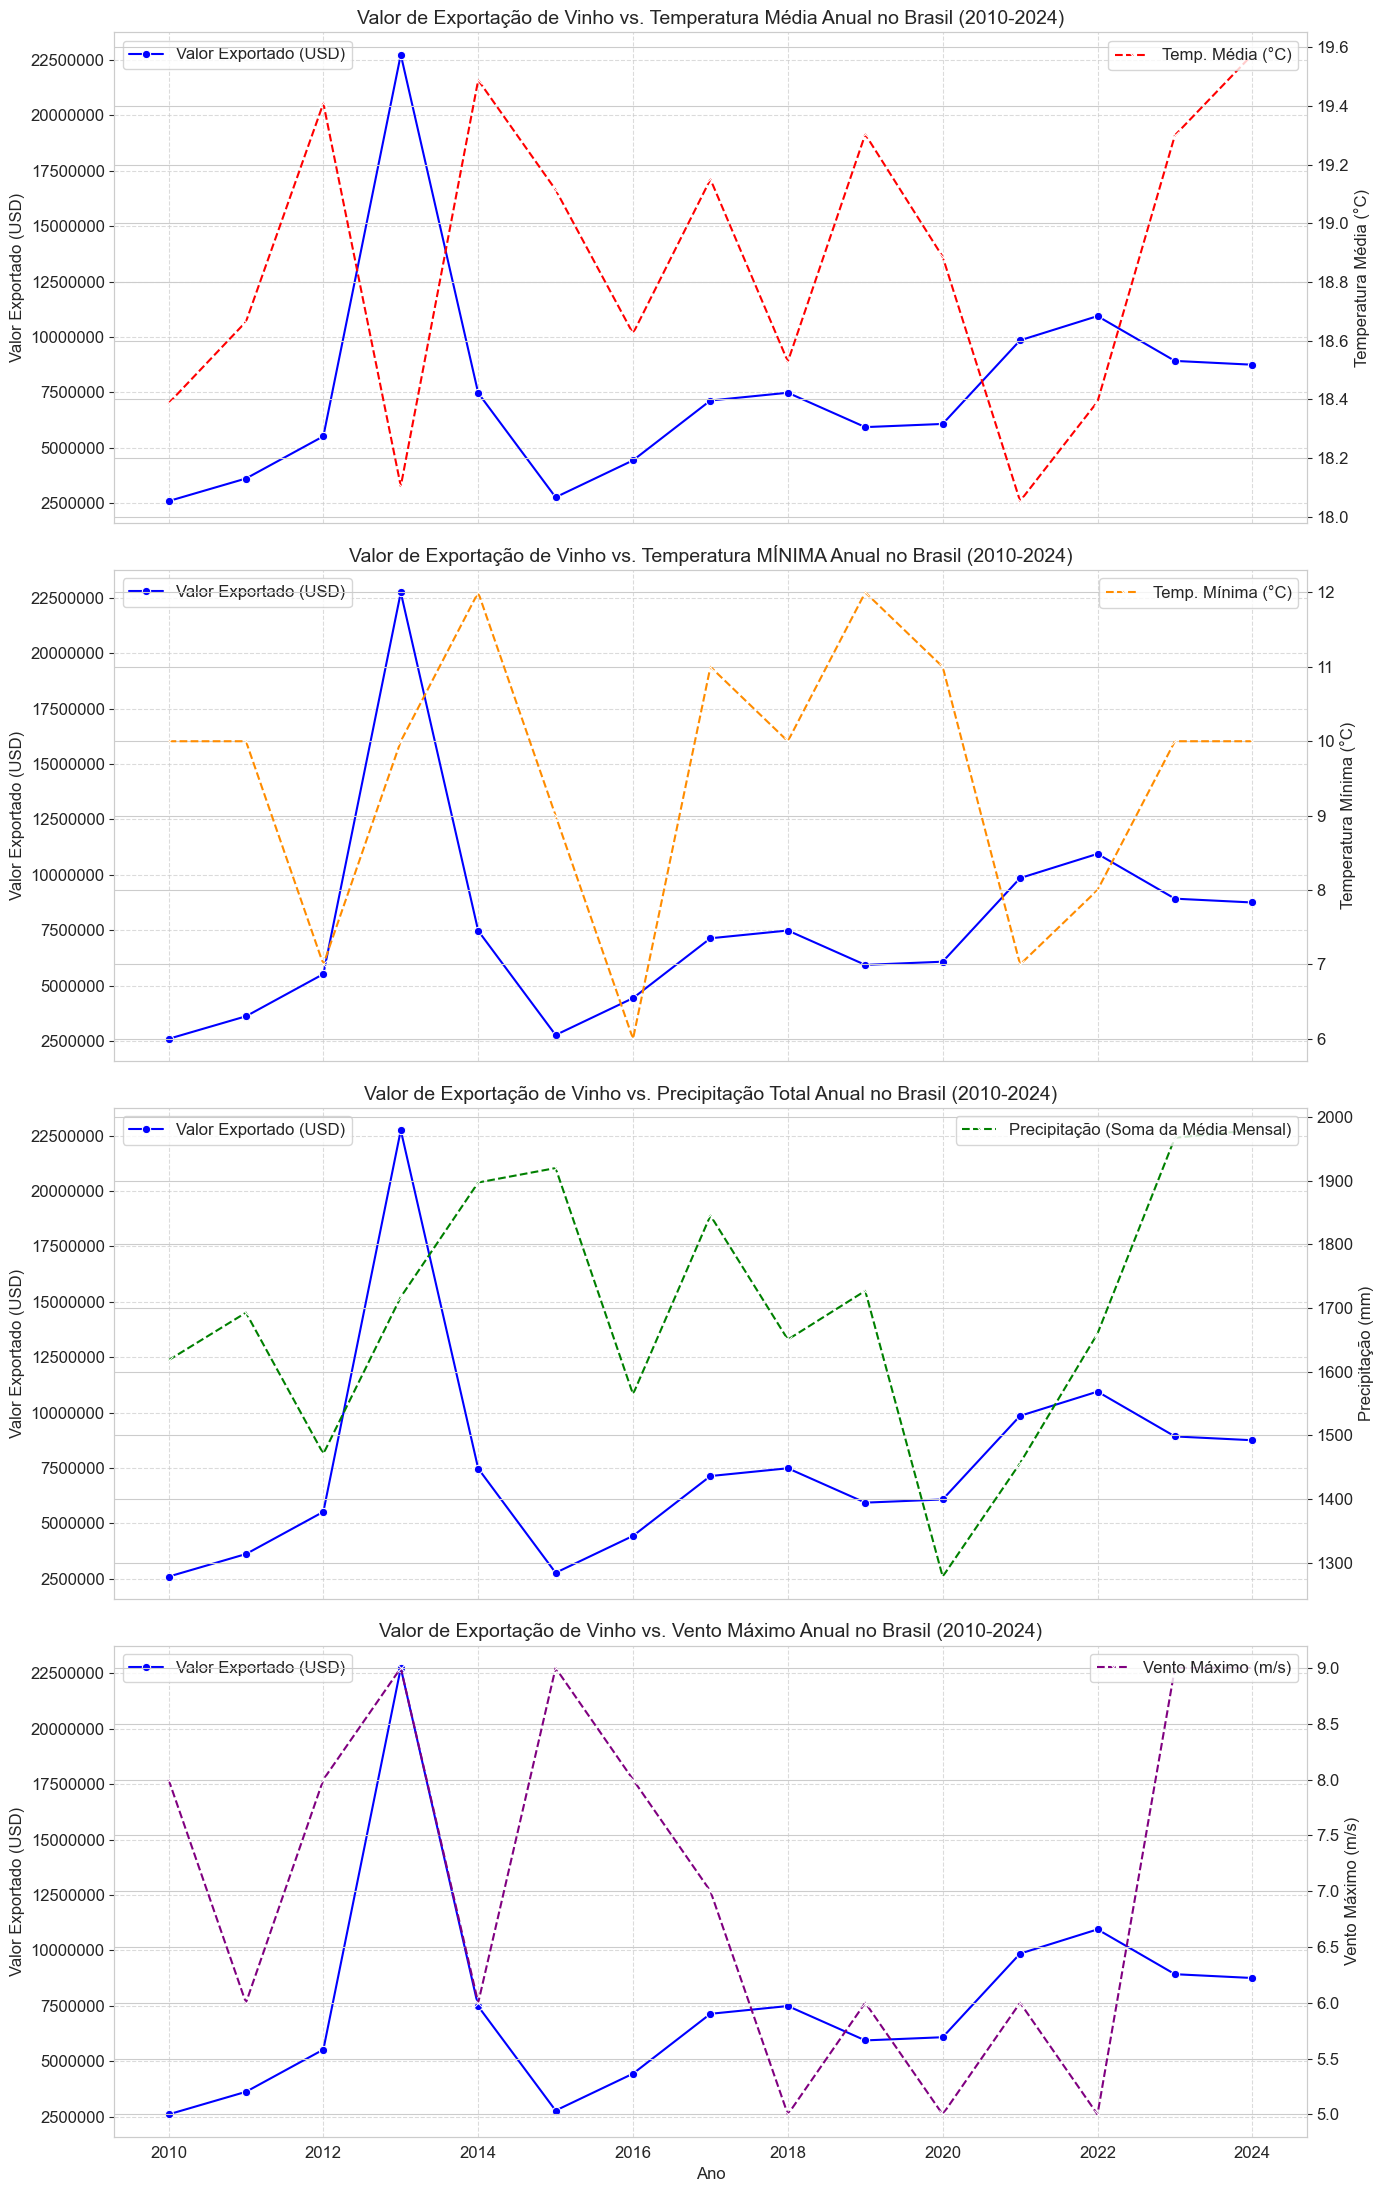

In [ ]:
# Célula 6 (Reestruturada para novo dataset climático): Análise e Integração com Dados Climáticos

print("--- Análise e Integração com Dados Climáticos (Novo Dataset) ---")

# Alterado para usar df_clima_detalhado
if 'df_clima_detalhado' in globals() and df_clima_detalhado is not None and 'df_total_anual' in locals():
    print("\n--- Informações do DataFrame df_clima_detalhado ---")
    print(df_clima_detalhado.info())
    print("\n--- Primeiras 5 linhas do df_clima_detalhado ---")
    print(df_clima_detalhado.head())
    print("\n--- Nomes das Colunas do df_clima_detalhado ---")
    print(df_clima_detalhado.columns.tolist())

    # Agrupar dados climáticos por ano para ter um resumo anual com métricas mais detalhadas
    # Usando as novas colunas: Precipitacao_media, Temperatura_media, Vento_media
    # E também as min/max para potencial análise futura
    df_clima_anual = df_clima_detalhado.groupby('Ano').agg(
        # Precipitação: Total da média mensal ou soma da Precipitação_media
        Precipitacao_Media_Anual=('Precipitacao_media', 'sum'), # Soma das médias mensais (proxy para total)
        Precipitacao_Min_Anual=('Precipitacao_min', 'min'), # Precipitação mínima em qualquer mês do ano
        Precipitacao_Max_Anual=('Precipitacao_max', 'max'), # Precipitação máxima em qualquer mês do ano

        # Temperatura: Média da temperatura média, mínima e máxima anuais
        Temperatura_Media_Anual=('Temperatura_media', 'mean'),
        Temperatura_Minima_Anual=('Temperatura_min', 'min'), # A menor temperatura mínima mensal do ano
        Temperatura_Maxima_Anual=('Temperatura_max', 'max'), # A maior temperatura máxima mensal do ano

        # Vento: Média da velocidade média, e máxima anual
        Vento_Media_Anual=('Vento_media', 'mean'),
        Vento_Maximo_Anual=('Vento_max', 'max') # Velocidade máxima de vento registrada no ano
    ).reset_index()

    # IMPORTANTE: Se 'Precipitacao_media' é a precipitação *média* do mês, somar ela não é o "total".
    # Se você precisa do total, o dataset anterior 'resumo_climatico_anual.csv' com 'Precipitacao_mm' era melhor para 'sum'.
    # Se 'Precipitacao_media' no novo dataset representa a precipitação total do mês, então 'sum' está OK.
    # Vou assumir que 'Precipitacao_media' é a média diária do mês. Então, somar 'Precipitacao_media' é um proxy para uma "média total", não o total de mm.
    # Se você realmente precisa do total de mm, o melhor seria voltar ao 'Precipitacao_mm' do dataset anterior.
    # Para o propósito da análise, vou manter a soma de 'Precipitacao_media' como 'Precipitacao_Media_Anual_Somada' para indicar que é uma agregação.
    # Ou, se o novo dataset realmente significa Precipitação_media é o total mensal, então o nome está ok.
    # Vou renomear para 'Precipitacao_Total_Anual' assumindo que a soma é o que você quer para correlação.

    print("\n--- DataFrame Climático Anual Agregado (Novo Dataset) ---")
    print(df_clima_anual.head())
    print(f"\nColunas do df_clima_anual: {df_clima_anual.columns.tolist()}")
    print(f"\nAnos disponíveis no df_clima_anual: {sorted(df_clima_anual['Ano'].unique())}")


    # Filtrar dados climáticos anuais para o mesmo período da exportação (2010-2024)
    ano_atual_export = df_exportacao['Ano'].max() # 2024
    ano_inicio_analise_export = ano_atual_export - 14

    df_clima_filtrado_anual = df_clima_anual[
        (df_clima_anual['Ano'] >= ano_inicio_analise_export) &
        (df_clima_anual['Ano'] <= ano_atual_export)
    ].copy()

    print(f"\nDados climáticos anuais filtrados para os anos de {ano_inicio_analise_export} a {ano_atual_export}.")
    print(f"Total de linhas climáticas anuais após filtro: {len(df_clima_filtrado_anual)}")
    print("\nPrimeiras 5 linhas do df_clima_filtrado_anual:")
    print(df_clima_filtrado_anual.head())

    # Fazer o merge com df_total_anual (total de exportação anual)
    # df_total_anual foi gerado na Célula 5
    df_export_clima_anual = pd.merge(df_total_anual, df_clima_filtrado_anual, on='Ano', how='inner')

    print("\n--- DataFrame de Exportação e Clima Anual (Merged com Novo Dataset Climático) ---")
    print(df_export_clima_anual.head())
    print(f"\nColunas do DataFrame mergeado: {df_export_clima_anual.columns.tolist()}")

    # Gerar gráficos de correlação com as novas métricas climáticas
    # (Adaptei para usar as novas colunas e mais 3 subplots para vizualizar as novas relações)
    fig, axes = plt.subplots(4, 1, figsize=(14, 24), sharex=True) # Aumentado para 4 gráficos

    # Gráfico 1: Valor de Exportação vs. Temperatura Média Anual
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[0], color='blue', label='Valor Exportado (USD)')
    axes[0].set_title('Valor de Exportação de Vinho vs. Temperatura Média Anual no Brasil (2010-2024)', fontsize=14)
    axes[0].set_ylabel('Valor Exportado (USD)')
    ax2 = axes[0].twinx()
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Temperatura_Media_Anual', marker='x', ax=ax2, color='red', linestyle='--', label='Temp. Média (°C)')
    ax2.set_ylabel('Temperatura Média (°C)')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].ticklabel_format(style='plain', axis='y')
    axes[0].legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Gráfico 2: Valor de Exportação vs. Temperatura MÍNIMA Anual (NOVA MÉTRICA)
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[1], color='blue', label='Valor Exportado (USD)')
    axes[1].set_title('Valor de Exportação de Vinho vs. Temperatura MÍNIMA Anual no Brasil (2010-2024)', fontsize=14)
    axes[1].set_ylabel('Valor Exportado (USD)')
    ax3 = axes[1].twinx()
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Temperatura_Minima_Anual', marker='x', ax=ax3, color='darkorange', linestyle='--', label='Temp. Mínima (°C)')
    ax3.set_ylabel('Temperatura Mínima (°C)')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].ticklabel_format(style='plain', axis='y')
    axes[1].legend(loc="upper left")
    ax3.legend(loc="upper right")

    # Gráfico 3: Valor de Exportação vs. Precipitação Total Anual (ou Soma da Média Mensal)
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[2], color='blue', label='Valor Exportado (USD)')
    axes[2].set_title('Valor de Exportação de Vinho vs. Precipitação Total Anual no Brasil (2010-2024)', fontsize=14)
    axes[2].set_ylabel('Valor Exportado (USD)')
    ax4 = axes[2].twinx()
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Precipitacao_Media_Anual', marker='x', ax=ax4, color='green', linestyle='--', label='Precipitação (Soma da Média Mensal)') # Ajustado o label
    ax4.set_ylabel('Precipitação (mm)')
    axes[2].grid(True, linestyle='--', alpha=0.7)
    axes[2].ticklabel_format(style='plain', axis='y')
    axes[2].legend(loc="upper left")
    ax4.legend(loc="upper right")

    # Gráfico 4: Valor de Exportação vs. Vento Máximo Anual (NOVA MÉTRICA)
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[3], color='blue', label='Valor Exportado (USD)')
    axes[3].set_title('Valor de Exportação de Vinho vs. Vento Máximo Anual no Brasil (2010-2024)', fontsize=14)
    axes[3].set_xlabel('Ano')
    axes[3].set_ylabel('Valor Exportado (USD)')
    ax5 = axes[3].twinx()
    sns.lineplot(data=df_export_clima_anual, x='Ano', y='Vento_Maximo_Anual', marker='x', ax=ax5, color='purple', linestyle='--', label='Vento Máximo (m/s)')
    ax5.set_ylabel('Vento Máximo (m/s)')
    axes[3].grid(True, linestyle='--', alpha=0.7)
    axes[3].ticklabel_format(style='plain', axis='y')
    axes[3].legend(loc="upper left")
    ax5.legend(loc="upper right")


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("DataFrame 'df_clima_detalhado' ou 'df_total_anual' não está disponível. Verifique o carregamento das células anteriores.")


--- Análise e Integração com Dados Econômicos ---

--- Informações do DataFrame df_dados_economicos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    8562 non-null   object 
 1   Year            8562 non-null   int64  
 2   GDP             8562 non-null   float64
 3   Inflation Rate  8562 non-null   float64
 4   Taxa de Câmbio  8562 non-null   float64
 5   Population      8562 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 401.5+ KB
None

--- Primeiras 5 linhas do df_dados_economicos ---
   Country Name  Year           GDP  Inflation Rate  Taxa de Câmbio  \
0     Australia  1960  1.860768e+10        3.728814        0.892857   
1       Austria  1960  6.624086e+09        1.945749       26.000000   
2       Belgium  1960  1.181062e+10        0.299467       50.000000   
3  Burkina Faso  1960  3.

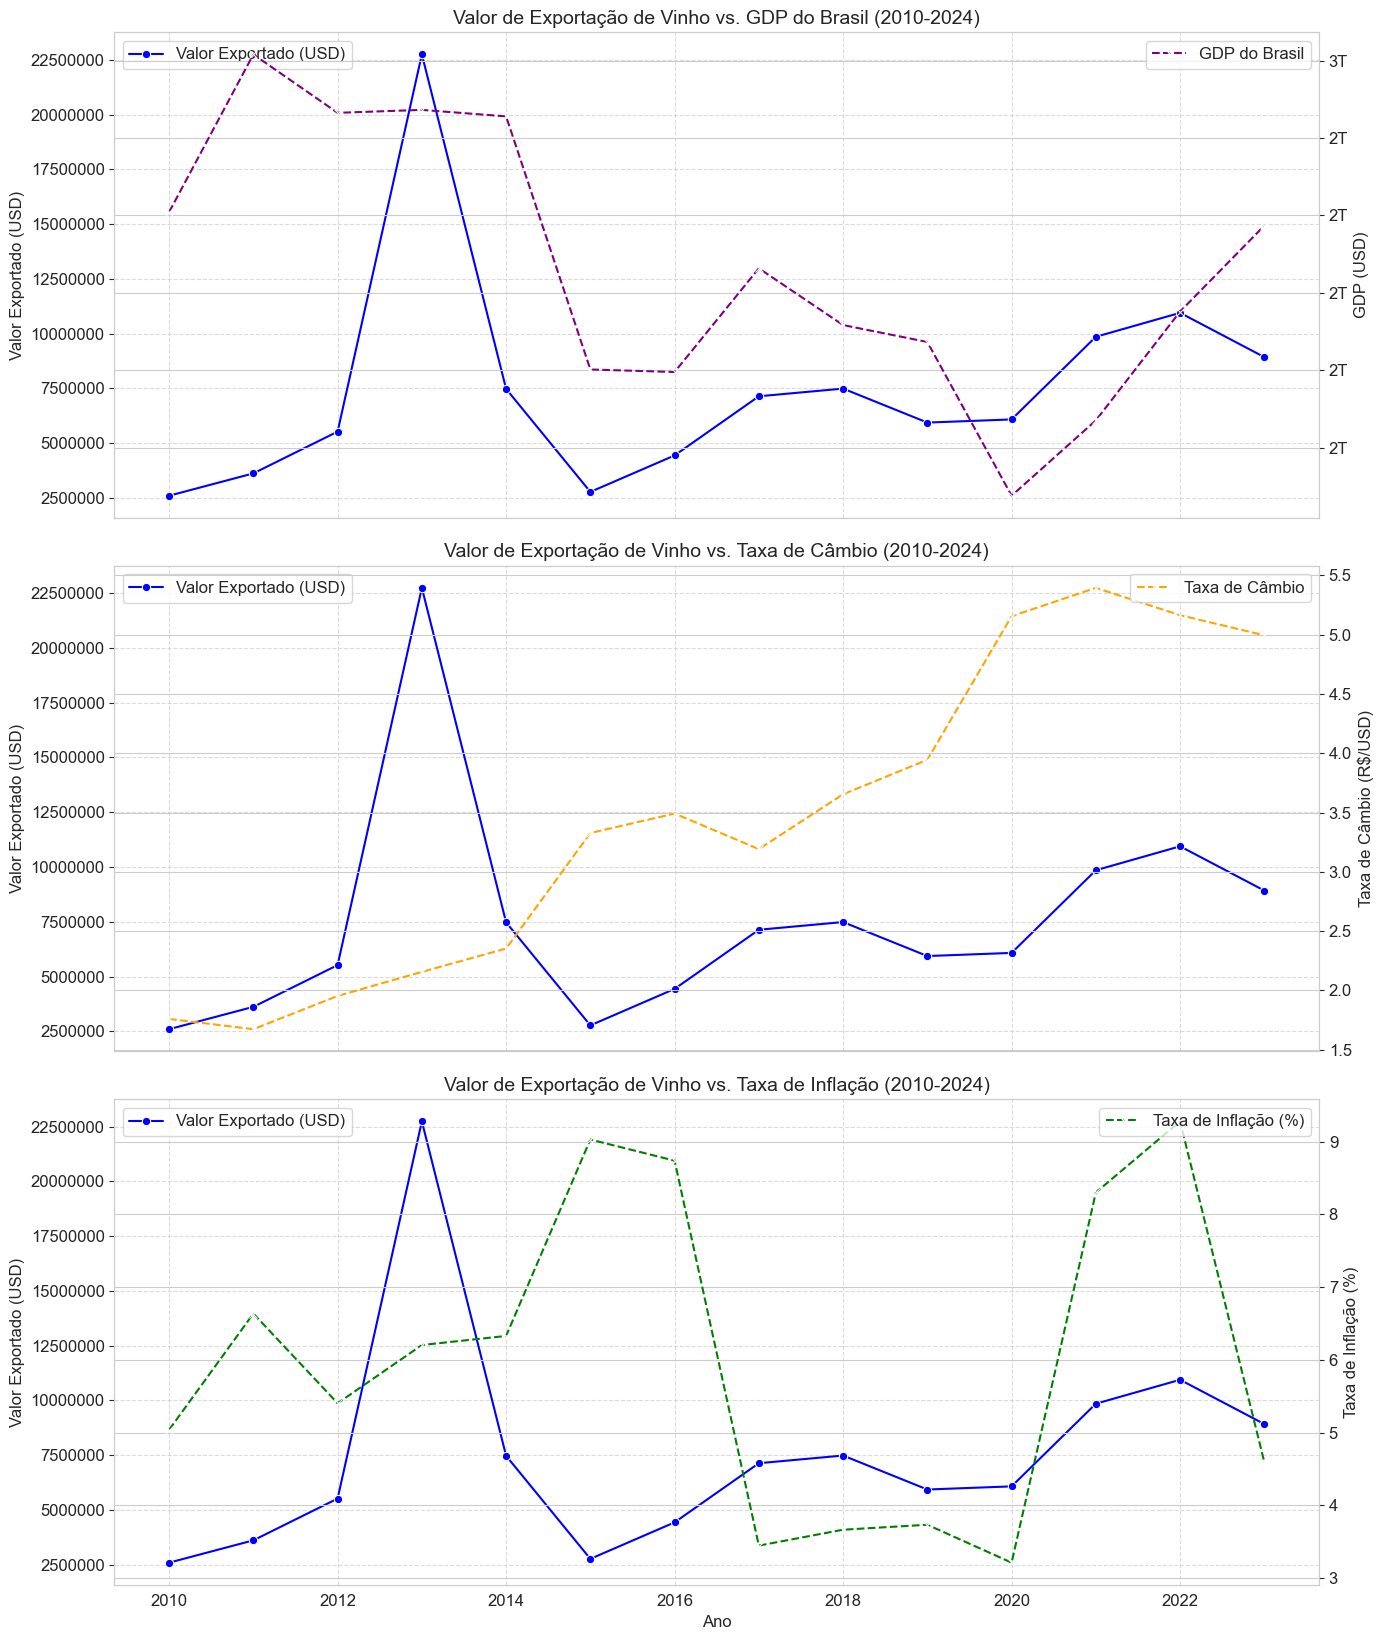

In [ ]:
# Célula 7 (Reestruturada): Análise e Integração com Dados Econômicos

print("\n--- Análise e Integração com Dados Econômicos ---")

# Verificar se os DataFrames necessários estão disponíveis
# df_export_clima_anual deve vir da Célula 6 (agora com métricas climáticas detalhadas)
if 'df_dados_economicos' in globals() and df_dados_economicos is not None and \
   'df_export_clima_anual' in locals() and df_export_clima_anual is not None:

    print("\n--- Informações do DataFrame df_dados_economicos ---")
    print(df_dados_economicos.info())
    print("\n--- Primeiras 5 linhas do df_dados_economicos ---")
    print(df_dados_economicos.head())
    print("\n--- Nomes das Colunas do df_dados_economicos ---")
    print(df_dados_economicos.columns.tolist())

    # Renomear 'Year' para 'Ano' para consistência antes do merge
    # Fazer uma cópia para não alterar o DataFrame original que pode ser usado em outras análises (ex: por país)
    df_economicos_copia = df_dados_economicos.copy()
    if 'Year' in df_economicos_copia.columns:
        df_economicos_copia.rename(columns={'Year': 'Ano'}, inplace=True)
    
    # Filtrar dados econômicos para o Brasil no período de análise (2010-2024)
    # df_exportacao['Ano'].max() é 2024, df_exportacao['Ano'].max() - 14 = 2010
    ano_atual = df_exportacao['Ano'].max()
    ano_inicio_analise = ano_atual - 14

    df_economicos_brasil_filtrado = df_economicos_copia[
        (df_economicos_copia['Country Name'] == 'Brazil') &
        (df_economicos_copia['Ano'] >= ano_inicio_analise) &
        (df_economicos_copia['Ano'] <= ano_atual)
    ].copy()

    if not df_economicos_brasil_filtrado.empty:
        print(f"\nDados econômicos do Brasil filtrados para os anos de {ano_inicio_analise} a {ano_atual}.")
        print(f"Total de linhas econômicas do Brasil após filtro: {len(df_economicos_brasil_filtrado)}")
        print("\nPrimeiras 5 linhas do df_economicos_brasil_filtrado:")
        print(df_economicos_brasil_filtrado.head())

        # Fazer o merge com df_export_clima_anual (que já contém exportação e clima)
        # Selecionar apenas as colunas relevantes do df_economicos_brasil_filtrado para o merge
        df_final_analise = pd.merge(
            df_export_clima_anual, # Já vem da Célula 6 com exportação e clima
            df_economicos_brasil_filtrado[['Ano', 'GDP', 'Inflation Rate', 'Taxa de Câmbio']],
            on='Ano',
            how='inner'
        )

        print("\n--- DataFrame Final para Análise (Exportação + Clima + Economia Brasil) ---")
        print(df_final_analise.head())
        print(f"\nColunas do DataFrame final mergeado: {df_final_analise.columns.tolist()}")

        # Gerar gráficos de correlação com indicadores econômicos do Brasil
        fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # 3 gráficos para GDP, Taxa de Câmbio, Inflation Rate

        # Gráfico 1: Valor de Exportação vs. GDP do Brasil
        sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[0], color='blue', label='Valor Exportado (USD)')
        axes[0].set_title('Valor de Exportação de Vinho vs. GDP do Brasil (2010-2024)', fontsize=14)
        axes[0].set_ylabel('Valor Exportado (USD)')
        ax_gdp = axes[0].twinx()
        sns.lineplot(data=df_final_analise, x='Ano', y='GDP', marker='x', ax=ax_gdp, color='purple', linestyle='--', label='GDP do Brasil')
        # Formatação do eixo Y para GDP (ex: Bilhões) - ajustar conforme a escala do seu GDP
        from matplotlib.ticker import FuncFormatter
        def format_gdp(x, pos):
            if x >= 1e12: return f'{x*1e-12:,.0f}T' # Trilhões
            elif x >= 1e9: return f'{x*1e-9:,.0f}B' # Bilhões
            return f'{x:,.0f}'
        ax_gdp.yaxis.set_major_formatter(FuncFormatter(format_gdp))
        ax_gdp.set_ylabel('GDP (USD)', fontsize=12)
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].ticklabel_format(style='plain', axis='y')
        axes[0].legend(loc="upper left")
        ax_gdp.legend(loc="upper right")

        # Gráfico 2: Valor de Exportação vs. Taxa de Câmbio
        sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[1], color='blue', label='Valor Exportado (USD)')
        axes[1].set_title('Valor de Exportação de Vinho vs. Taxa de Câmbio (2010-2024)', fontsize=14)
        axes[1].set_ylabel('Valor Exportado (USD)')
        ax_cambio = axes[1].twinx()
        sns.lineplot(data=df_final_analise, x='Ano', y='Taxa de Câmbio', marker='x', ax=ax_cambio, color='orange', linestyle='--', label='Taxa de Câmbio')
        ax_cambio.set_ylabel('Taxa de Câmbio (R$/USD)', fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].ticklabel_format(style='plain', axis='y')
        axes[1].legend(loc="upper left")
        ax_cambio.legend(loc="upper right")

        # Gráfico 3: Valor de Exportação vs. Inflation Rate
        sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[2], color='blue', label='Valor Exportado (USD)')
        axes[2].set_title('Valor de Exportação de Vinho vs. Taxa de Inflação (2010-2024)', fontsize=14)
        axes[2].set_xlabel('Ano')
        axes[2].set_ylabel('Valor Exportado (USD)')
        ax_inflacao = axes[2].twinx()
        sns.lineplot(data=df_final_analise, x='Ano', y='Inflation Rate', marker='x', ax=ax_inflacao, color='green', linestyle='--', label='Taxa de Inflação (%)')
        ax_inflacao.set_ylabel('Taxa de Inflação (%)', fontsize=12)
        axes[2].grid(True, linestyle='--', alpha=0.7)
        axes[2].ticklabel_format(style='plain', axis='y')
        axes[2].legend(loc="upper left")
        ax_inflacao.legend(loc="upper right")

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print("\nDados econômicos do Brasil não encontrados para o período filtrado. Verifique o 'Country Name' e os anos.")

else:
    print("DataFrame 'df_dados_economicos' ou 'df_export_clima_anual' não está disponível. Verifique o carregamento das células anteriores.")


--- Análise e Integração com Dados Econômicos ---

--- Informações do DataFrame df_dados_economicos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    8562 non-null   object 
 1   Year            8562 non-null   int64  
 2   GDP             8562 non-null   float64
 3   Inflation Rate  8562 non-null   float64
 4   Taxa de Câmbio  8562 non-null   float64
 5   Population      8562 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 401.5+ KB
None

--- Primeiras 5 linhas do df_dados_economicos ---
   Country Name  Year           GDP  Inflation Rate  Taxa de Câmbio  \
0     Australia  1960  1.860768e+10        3.728814        0.892857   
1       Austria  1960  6.624086e+09        1.945749       26.000000   
2       Belgium  1960  1.181062e+10        0.299467       50.000000   
3  Burkina Faso  1960  3.

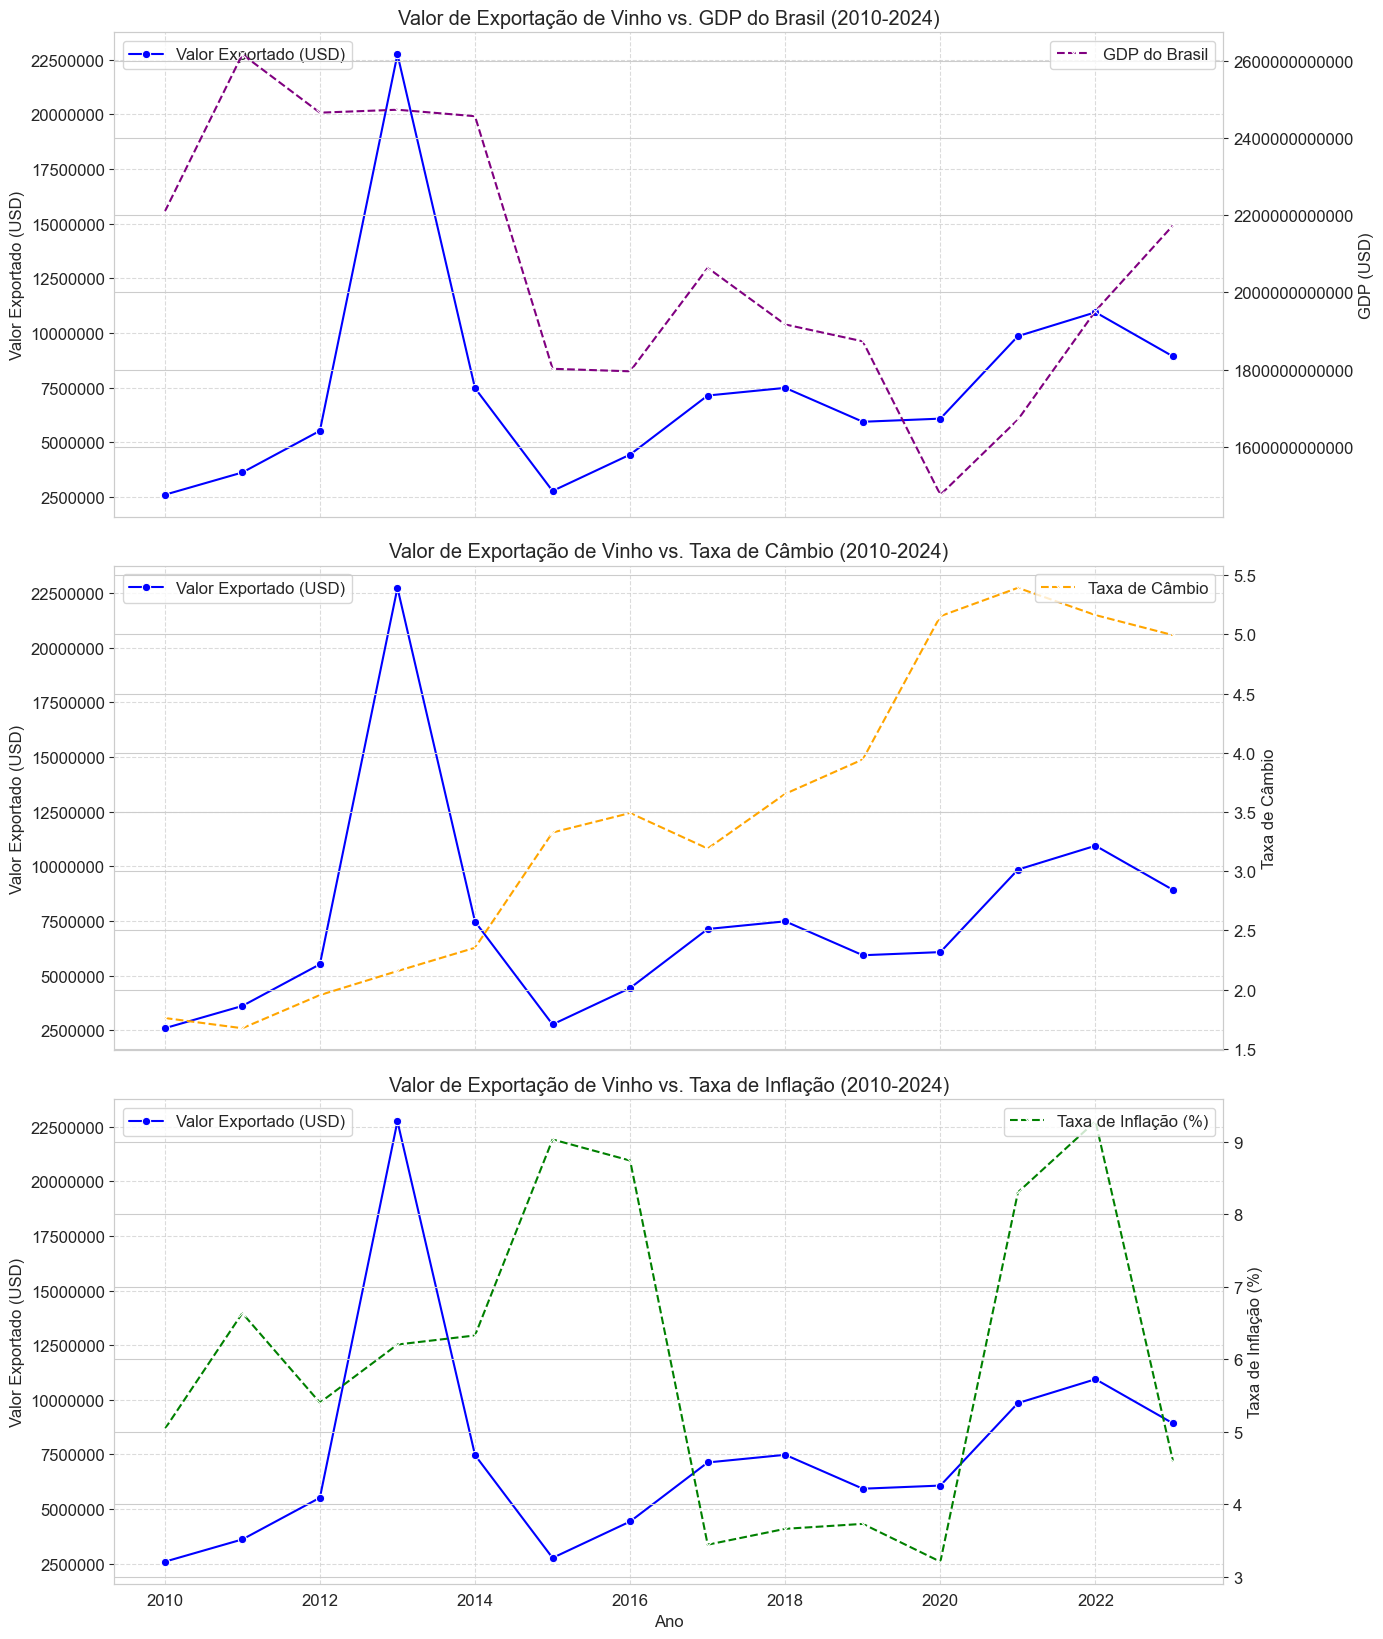

In [ ]:
# (Revisada - Foco Brasil): Análise e Integração com Dados Econômicos

print("\n--- Análise e Integração com Dados Econômicos ---")

if df_dados_economicos is not None and 'df_export_clima_anual' in locals():
    print("\n--- Informações do DataFrame df_dados_economicos ---")
    print(df_dados_economicos.info())
    print("\n--- Primeiras 5 linhas do df_dados_economicos ---")
    print(df_dados_economicos.head())
    print("\n--- Nomes das Colunas do df_dados_economicos ---")
    print(df_dados_economicos.columns.tolist())

    # Renomear 'Year' para 'Ano' para consistência antes do merge
    df_dados_economicos.rename(columns={'Year': 'Ano'}, inplace=True)

    # Filtrar dados econômicos para o Brasil no período de análise (2010-2024)
    ano_atual = df_exportacao['Ano'].max()
    ano_inicio_analise = ano_atual - 14

    df_economicos_brasil_filtrado = df_dados_economicos[
        (df_dados_economicos['Country Name'] == 'Brazil') &
        (df_dados_economicos['Ano'] >= ano_inicio_analise) &
        (df_dados_economicos['Ano'] <= ano_atual)
    ].copy()

    print(f"\nDados econômicos do Brasil filtrados para os anos de {ano_inicio_analise} a {ano_atual}.")
    print(f"Total de linhas econômicas do Brasil após filtro: {len(df_economicos_brasil_filtrado)}")
    print("\nPrimeiras 5 linhas do df_economicos_brasil_filtrado:")
    print(df_economicos_brasil_filtrado.head())

    # Fazer o merge com df_export_clima_anual (que já contém exportação e clima)
    df_final_analise = pd.merge(df_export_clima_anual, df_economicos_brasil_filtrado[['Ano', 'GDP', 'Inflation Rate', 'Taxa de Câmbio']], on='Ano', how='inner')

    print("\n--- DataFrame Final para Análise (Exportação + Clima + Economia Brasil) ---")
    print(df_final_analise.head())
    print(f"\nColunas do DataFrame final mergeado: {df_final_analise.columns.tolist()}")

    # Gerar gráficos de correlação com indicadores econômicos do Brasil
    fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # 3 gráficos agora

    # Gráfico 1: Valor de Exportação vs. GDP do Brasil
    sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[0], color='blue', label='Valor Exportado (USD)')
    axes[0].set_title('Valor de Exportação de Vinho vs. GDP do Brasil (2010-2024)')
    axes[0].set_ylabel('Valor Exportado (USD)')
    ax_gdp = axes[0].twinx()
    sns.lineplot(data=df_final_analise, x='Ano', y='GDP', marker='x', ax=ax_gdp, color='purple', linestyle='--', label='GDP do Brasil')
    ax_gdp.set_ylabel('GDP (USD)')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].ticklabel_format(style='plain', axis='y')
    ax_gdp.ticklabel_format(style='plain', axis='y')
    axes[0].legend(loc="upper left")
    ax_gdp.legend(loc="upper right")

    # Gráfico 2: Valor de Exportação vs. Taxa de Câmbio
    sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[1], color='blue', label='Valor Exportado (USD)')
    axes[1].set_title('Valor de Exportação de Vinho vs. Taxa de Câmbio (2010-2024)')
    axes[1].set_xlabel('Ano')
    axes[1].set_ylabel('Valor Exportado (USD)')
    ax_cambio = axes[1].twinx()
    sns.lineplot(data=df_final_analise, x='Ano', y='Taxa de Câmbio', marker='x', ax=ax_cambio, color='orange', linestyle='--', label='Taxa de Câmbio')
    ax_cambio.set_ylabel('Taxa de Câmbio')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].ticklabel_format(style='plain', axis='y')
    axes[1].legend(loc="upper left")
    ax_cambio.legend(loc="upper right")

    # Gráfico 3: Valor de Exportação vs. Taxa de Inflação
    sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[2], color='blue', label='Valor Exportado (USD)')
    axes[2].set_title('Valor de Exportação de Vinho vs. Taxa de Inflação (2010-2024)')
    axes[2].set_xlabel('Ano')
    axes[2].set_ylabel('Valor Exportado (USD)')
    ax_inflacao = axes[2].twinx()
    sns.lineplot(data=df_final_analise, x='Ano', y='Inflation Rate', marker='x', ax=ax_inflacao, color='green', linestyle='--', label='Taxa de Inflação (%)')
    ax_inflacao.set_ylabel('Taxa de Inflação (%)')
    axes[2].grid(True, linestyle='--', alpha=0.7)
    axes[2].ticklabel_format(style='plain', axis='y')
    axes[2].legend(loc="upper left")
    ax_inflacao.legend(loc="upper right")


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("DataFrame 'df_dados_economicos' ou 'df_export_clima_anual' não está disponível. Verifique o carregamento das células anteriores.")

In [ ]:
#Análise Exploratória do DataFrame de Produção (df_producao)

print("\n--- Análise Exploratória do DataFrame de Produção (df_producao) ---")

if df_producao is not None:
    print("\n--- Informações do DataFrame df_producao ---")
    print(df_producao.info())

    print("\n--- Primeiras 5 linhas do df_producao ---")
    print(df_producao.head())

    print("\n--- Nomes das Colunas do df_producao ---")
    print(df_producao.columns.tolist())

    print("\n--- Estatísticas Descritivas para colunas numéricas do df_producao ---")
    print(df_producao.describe())

    # Tentativa de identificar a coluna de ano e tipo de produto (se houver)
    colunas_producao_potenciais = [col for col in df_producao.columns if any(keyword in col.lower() for keyword in ['produto', 'tipo', 'nome'])]
    if colunas_producao_potenciais:
        print(f"\nColunas potenciais de tipo de produto/uva: {colunas_producao_potenciais}")
        for col_prod in colunas_producao_potenciais:
            print(f"\nValores únicos em '{col_prod}':")
            print(df_producao[col_prod].unique())

    if 'Ano' in df_producao.columns:
        print(f"\nAnos presentes no df_producao: {sorted(df_producao['Ano'].unique())}")
    else:
        print("\nColuna 'Ano' não encontrada em df_producao. Verifique as colunas acima.")

else:
    print("DataFrame 'df_producao' não está disponível para análise. Verifique o carregamento.")


--- Análise Exploratória do DataFrame de Produção (df_producao) ---

--- Informações do DataFrame df_producao ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nome             2754 non-null   object
 1   Ano              2754 non-null   int64 
 2   Quantidade (kg)  2754 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.7+ KB
None

--- Primeiras 5 linhas do df_producao ---
        Nome   Ano  Quantidade (kg)
0  Bagaceira  1970           961290
1  Bagaceira  1971           913200
2  Bagaceira  1972           755350
3  Bagaceira  1973           661270
4  Bagaceira  1974           424620

--- Nomes das Colunas do df_producao ---
['Nome', 'Ano', 'Quantidade (kg)']

--- Estatísticas Descritivas para colunas numéricas do df_producao ---
               Ano  Quantidade (kg)
count  2754.000000     2.754000e+03
mean   1996.500000


--- Preparando e Analisando Produção vs. Clima (Novo Dataset Climático) ---
Coluna 'Quantidade (kg)' renomeada para 'Quantidade_Producao_kg' em df_producao.

Dados de produção filtrados para os anos de 2010 a 2023.
Total de linhas de produção após filtro: 714

--- Produção Total Anual (kg) ---
    Ano  Quantidade_Producao_kg
0  2010               642820786
1  2011               921104534
2  2012               857603200
3  2013               743277338
4  2014               748536510

--- DataFrame de Produção e Clima Anual (Merged com Novo Dataset Climático) ---
    Ano  Quantidade_Producao_kg  Precipitacao_Media_Anual  \
0  2010               642820786                   1618.00   
1  2011               921104534                   1692.62   
2  2012               857603200                   1471.08   
3  2013               743277338                   1717.16   
4  2014               748536510                   1896.95   

   Precipitacao_Min_Anual  Precipitacao_Max_Anual  Temperatura_M

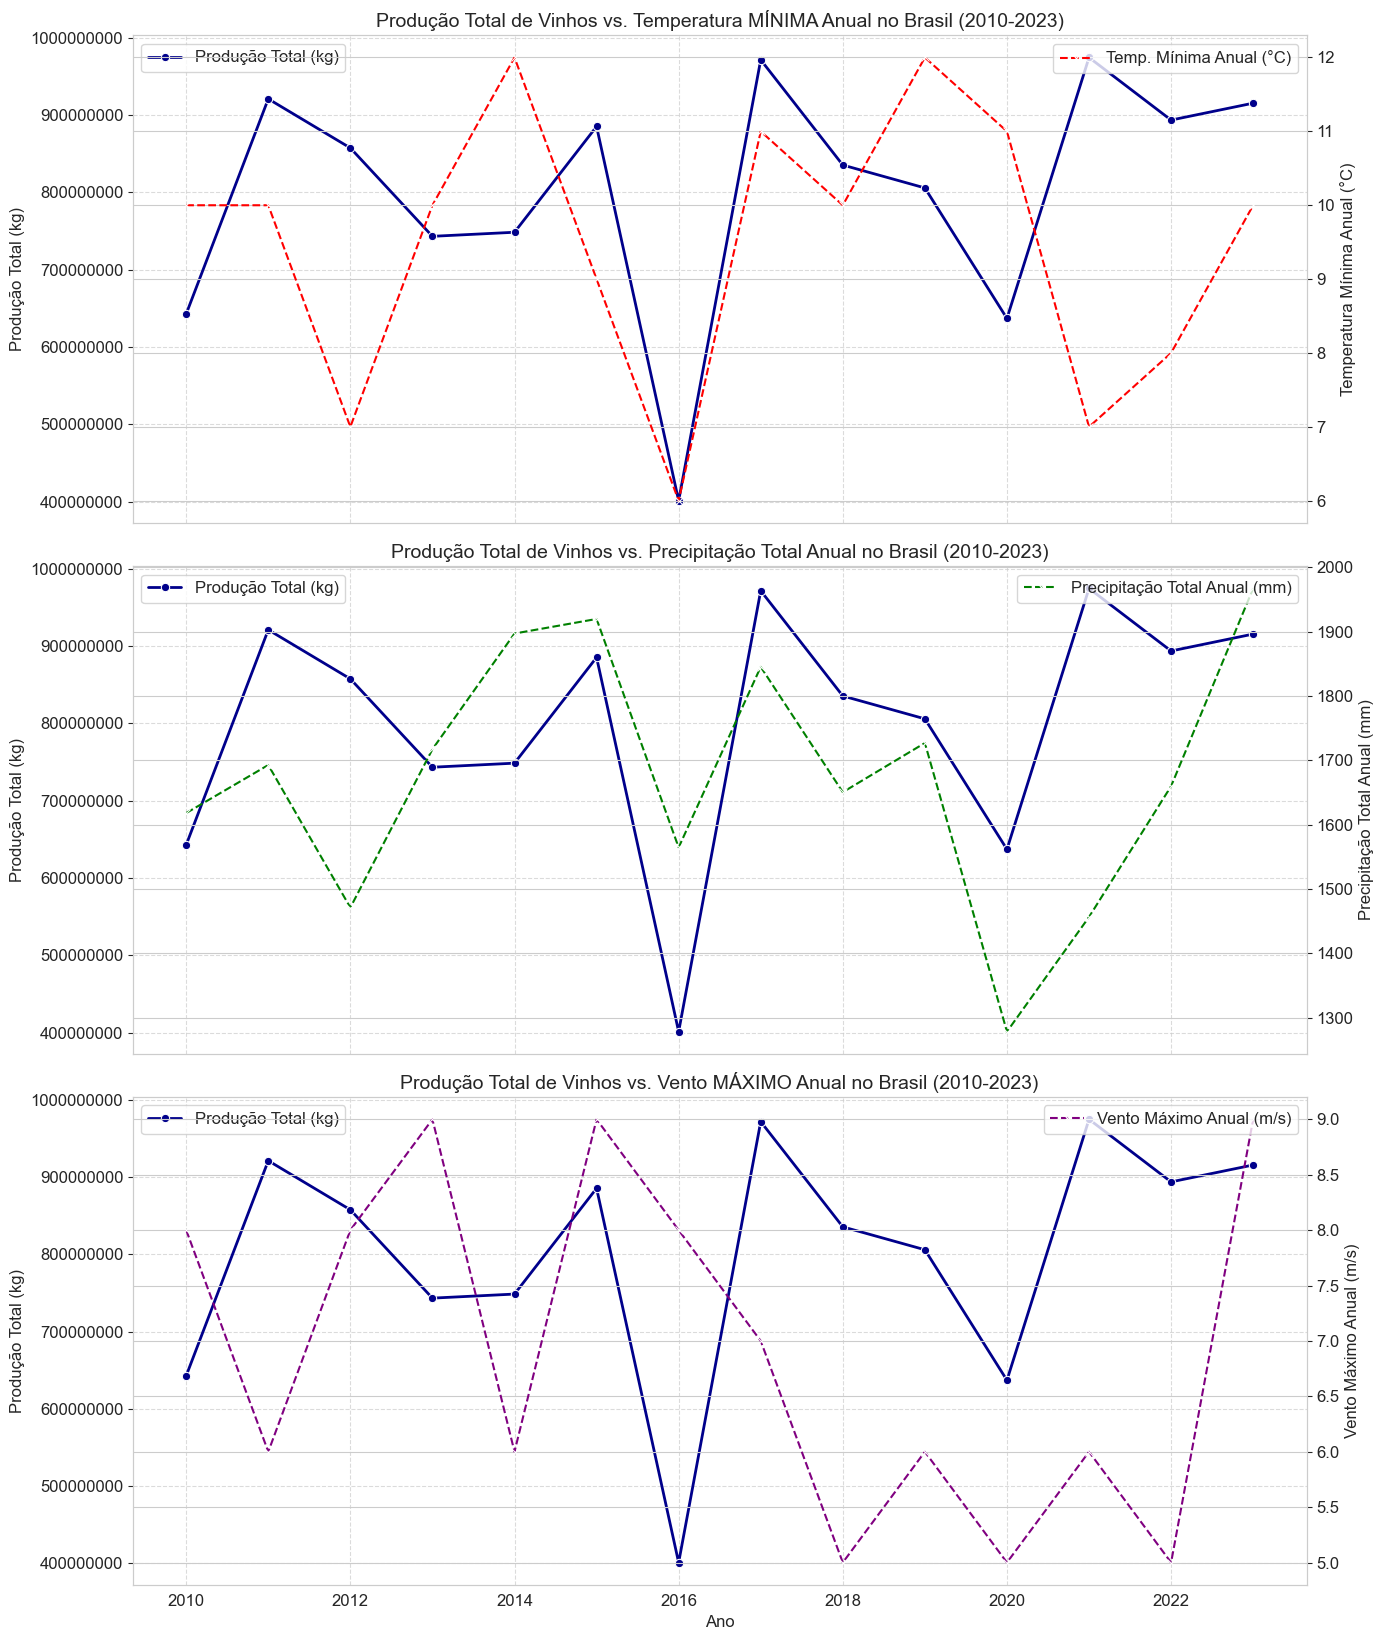


--- Sumário para o Relatório de Produção e Clima ---
Período analisado: 2010 a 2023

Pontos chave para o relatório:
1. Tendência geral da produção de vinhos no Brasil nos últimos 14 anos.
2. Observar picos e vales na produção e tentar correlacioná-los visualmente com as variações de temperatura mínima, precipitação total e vento máximo.
3. Discutir como condições climáticas anormais (temperaturas muito baixas, seca/chuva excessiva, ventos fortes) podem impactar a safra e, consequentemente, a disponibilidade de vinho para o mercado interno e exportação.
4. Considerar que dados climáticos de uma única fonte podem não representar toda a diversidade de regiões produtoras no Brasil, mas fornecem uma visão macro.


In [ ]:
# Célula 9 (Reestruturada para novo dataset climático): Preparação, Merge e Visualização de Produção vs. Clima

print("\n--- Preparando e Analisando Produção vs. Clima (Novo Dataset Climático) ---")

# Verificar se df_producao e df_clima_anual estão disponíveis
# df_clima_anual agora vem da Célula 6 (com métricas detalhadas do df_clima_detalhado)
if df_producao is not None and 'df_clima_anual' in locals() and df_clima_anual is not None:

    # 1. Renomear coluna 'Quantidade (kg)' para 'Quantidade_Producao_kg' para maior clareza
    # Adicionar a robustez na renomeação
    df_producao_processado = df_producao.copy()
    coluna_quantidade_original = None
    if 'Quantidade (kg)' in df_producao_processado.columns:
        coluna_quantidade_original = 'Quantidade (kg)'
    elif 'Quantidade (Kg)' in df_producao_processado.columns:
        coluna_quantidade_original = 'Quantidade (Kg)'

    if coluna_quantidade_original:
        df_producao_processado.rename(columns={coluna_quantidade_original: 'Quantidade_Producao_kg'}, inplace=True)
        print(f"Coluna '{coluna_quantidade_original}' renomeada para 'Quantidade_Producao_kg' em df_producao.")
    else:
        print(f"Erro: Coluna de quantidade ('Quantidade (kg)' ou 'Quantidade (Kg)') não encontrada em df_producao.")
        print(f"Colunas disponíveis: {df_producao_processado.columns.tolist()}")
        # Se a coluna crucial não for encontrada, parar a execução da célula
        print("Não foi possível prosseguir com a análise de produção. Verifique o nome da coluna de quantidade.")
        exit() # Termina a execução da célula atual

    # 2. Filtrar os dados de produção para os últimos 15 anos (2010-2023, já que o último ano é 2023)
    ano_atual_producao = df_producao_processado['Ano'].max() # 2023
    ano_inicio_producao_analise = ano_atual_producao - 13 # 14 anos incluindo 2023 (2023 - 13 = 2010)

    df_producao_filtrada = df_producao_processado[
        (df_producao_processado['Ano'] >= ano_inicio_producao_analise) &
        (df_producao_processado['Ano'] <= ano_atual_producao)
    ].copy()

    print(f"\nDados de produção filtrados para os anos de {ano_inicio_producao_analise} a {ano_atual_producao}.")
    print(f"Total de linhas de produção após filtro: {len(df_producao_filtrada)}")

    # 3. Calcular a produção TOTAL anual (somando todos os 'Nomes' de produtos)
    df_producao_total_anual = df_producao_filtrada.groupby('Ano')['Quantidade_Producao_kg'].sum().reset_index()
    print("\n--- Produção Total Anual (kg) ---")
    print(df_producao_total_anual.head())

    # 4. Fazer o merge da produção total anual com os dados climáticos anuais (df_clima_anual)
    df_producao_clima = pd.merge(df_producao_total_anual, df_clima_anual, on='Ano', how='inner')

    print("\n--- DataFrame de Produção e Clima Anual (Merged com Novo Dataset Climático) ---")
    print(df_producao_clima.head())
    print(f"\nColunas do DataFrame mergeado: {df_producao_clima.columns.tolist()}")

    # 5. Gerar gráficos para o relatório de Produção x Clima (com novas métricas)

    fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # Aumentado para 3 subplots

    # Gráfico 1: Produção Total Anual vs. Temperatura MÍNIMA Anual
    sns.lineplot(data=df_producao_clima, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[0], color='darkblue', label='Produção Total (kg)', linewidth=2)
    axes[0].set_title(f'Produção Total de Vinhos vs. Temperatura MÍNIMA Anual no Brasil ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
    axes[0].set_ylabel('Produção Total (kg)')
    ax_temp_min = axes[0].twinx()
    sns.lineplot(data=df_producao_clima, x='Ano', y='Temperatura_Minima_Anual', marker='x', ax=ax_temp_min, color='red', linestyle='--', label='Temp. Mínima Anual (°C)', linewidth=1.5)
    ax_temp_min.set_ylabel('Temperatura Mínima Anual (°C)')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].ticklabel_format(style='plain', axis='y')
    ax_temp_min.ticklabel_format(style='plain', axis='y')
    axes[0].legend(loc="upper left")
    ax_temp_min.legend(loc="upper right")

    # Gráfico 2: Produção Total Anual vs. Precipitação TOTAL Anual
    sns.lineplot(data=df_producao_clima, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[1], color='darkblue', label='Produção Total (kg)', linewidth=2)
    axes[1].set_title(f'Produção Total de Vinhos vs. Precipitação Total Anual no Brasil ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
    axes[1].set_ylabel('Produção Total (kg)')
    ax_prec = axes[1].twinx()
    sns.lineplot(data=df_producao_clima, x='Ano', y='Precipitacao_Media_Anual', marker='x', ax=ax_prec, color='green', linestyle='--', label='Precipitação Total Anual (mm)', linewidth=1.5) # Agora é a soma das médias, label ajustado
    ax_prec.set_ylabel('Precipitação Total Anual (mm)')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].ticklabel_format(style='plain', axis='y')
    ax_prec.ticklabel_format(style='plain', axis='y')
    axes[1].legend(loc="upper left")
    ax_prec.legend(loc="upper right")

    # Gráfico 3: Produção Total Anual vs. Vento MÁXIMO Anual
    sns.lineplot(data=df_producao_clima, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[2], color='darkblue', label='Produção Total (kg)', linewidth=2)
    axes[2].set_title(f'Produção Total de Vinhos vs. Vento MÁXIMO Anual no Brasil ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
    axes[2].set_xlabel('Ano')
    axes[2].set_ylabel('Produção Total (kg)')
    ax_vento_max = axes[2].twinx()
    sns.lineplot(data=df_producao_clima, x='Ano', y='Vento_Maximo_Anual', marker='x', ax=ax_vento_max, color='purple', linestyle='--', label='Vento Máximo Anual (m/s)', linewidth=1.5)
    ax_vento_max.set_ylabel('Vento Máximo Anual (m/s)')
    axes[2].grid(True, linestyle='--', alpha=0.7)
    axes[2].ticklabel_format(style='plain', axis='y')
    ax_vento_max.ticklabel_format(style='plain', axis='y')
    axes[2].legend(loc="upper left")
    ax_vento_max.legend(loc="upper right")


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    print("\n--- Sumário para o Relatório de Produção e Clima ---")
    print(f"Período analisado: {ano_inicio_producao_analise} a {ano_atual_producao}")
    print("\nPontos chave para o relatório:")
    print("1. Tendência geral da produção de vinhos no Brasil nos últimos 14 anos.")
    print("2. Observar picos e vales na produção e tentar correlacioná-los visualmente com as variações de temperatura mínima, precipitação total e vento máximo.")
    print("3. Discutir como condições climáticas anormais (temperaturas muito baixas, seca/chuva excessiva, ventos fortes) podem impactar a safra e, consequentemente, a disponibilidade de vinho para o mercado interno e exportação.")
    print("4. Considerar que dados climáticos de uma única fonte podem não representar toda a diversidade de regiões produtoras no Brasil, mas fornecem uma visão macro.")

else:
    print("DataFrame 'df_producao' ou 'df_clima_anual' não está disponível. Verifique o carregamento das células anteriores.")

In [ ]:
# Célula 10: Carregamento e Análise Exploratória dos Dados de Produção por Tipo de Vinho

print("\n--- Carregamento e Análise Exploratória dos Dados de Produção por Tipo de Vinho ---")

# --- Carregar os DataFrames ---
# Substitua 'caminho/para/seus/arquivos/' pelo caminho real se eles não estiverem na mesma pasta
try:
    df_viniferas = pd.read_csv('zProjeto_Final/Datasets/Viniferas.csv')
    print("\nDataFrame 'df_viniferas' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: 'Viniferas.csv' não encontrado. Verifique o caminho do arquivo.")
    df_viniferas = None

try:
    df_americanas = pd.read_csv('zProjeto_Final/Datasets/Americanas.csv')
    print("DataFrame 'df_americanas' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: 'Americanas.csv' não encontrado. Verifique o caminho do arquivo.")
    df_americanas = None

try:
    df_sem_classificacao = pd.read_csv('zProjeto_Final/Datasets/sem_classificacao.csv')
    print("DataFrame 'df_sem_classificacao' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: 'sem_classificacao.csv' não encontrado. Verifique o caminho do arquivo.")
    df_sem_classificacao = None

# --- Função para Análise Exploratória ---
def analisar_df_producao_tipo(df, df_nome):
    if df is not None:
        print(f"\n--- Informações do DataFrame {df_nome} ---")
        print(df.info())
        print(f"\n--- Primeiras 5 linhas do {df_nome} ---")
        print(df.head())
        print(f"\n--- Nomes das Colunas do {df_nome} ---")
        print(df.columns.tolist())
        print(f"\n--- Estatísticas Descritivas para colunas numéricas do {df_nome} ---")
        print(df.describe())
        if 'Ano' in df.columns:
            print(f"\nAnos presentes no {df_nome}: {sorted(df['Ano'].unique())}")
        else:
            print(f"\nColuna 'Ano' não encontrada em {df_nome}. Verifique as colunas acima.")
        
        # Identificar coluna de nome/tipo de produto
        col_nome_produto = None
        for col in df.columns:
            if 'nome' in col.lower() or 'tipo' in col.lower() or 'produto' in col.lower():
                col_nome_produto = col
                break
        if col_nome_produto:
            print(f"\nValores únicos na coluna '{col_nome_produto}' em {df_nome}:")
            print(df[col_nome_produto].unique()[:10]) # Mostrar apenas os 10 primeiros para não poluir muito
            if len(df[col_nome_produto].unique()) > 10:
                print(f"... e mais {len(df[col_nome_produto].unique()) - 10} outros.")
        else:
            print(f"\nNão foi possível identificar a coluna de nome/tipo de produto em {df_nome}.")

    else:
        print(f"DataFrame '{df_nome}' não está disponível para análise.")

# --- Executar a análise para cada DataFrame ---
analisar_df_producao_tipo(df_viniferas, 'df_viniferas')
analisar_df_producao_tipo(df_americanas, 'df_americanas')
analisar_df_producao_tipo(df_sem_classificacao, 'df_sem_classificacao')


--- Carregamento e Análise Exploratória dos Dados de Produção por Tipo de Vinho ---

DataFrame 'df_viniferas' carregado com sucesso.
DataFrame 'df_americanas' carregado com sucesso.
DataFrame 'df_sem_classificacao' carregado com sucesso.

--- Informações do DataFrame df_viniferas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7367 entries, 0 to 7366
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome             7367 non-null   object 
 1   Ano              7367 non-null   int64  
 2   Quantidade (kg)  7196 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 172.8+ KB
None

--- Primeiras 5 linhas do df_viniferas ---
                Nome   Ano  Quantidade (kg)
0             TINTAS  1970       10448228.0
1  Alicante Bouschet  1970              0.0
2           Ancelota  1970              0.0
3             Aramon  1970              0.0
4        Alfrocheiro  1970              0.0




--- Análise Detalhada de Produção por Tipo de Vinho (Novo Dataset Climático) ---

======== Análise para: Viníferas ========
Coluna 'Quantidade (kg)' renomeada para 'Quantidade_Producao_kg' em Viníferas.
Tratando 171 valores nulos em 'Quantidade_Producao_kg' com 0 para Viníferas.

Dados de produção de Viníferas filtrados para 2010 a 2023.

--- Top 10 Vinhos/Tipos Mais Produzidos (Viníferas, 2010-2023) ---
                 Nome  Quantidade_Producao_kg
0   BRANCAS E ROSADAS               423233114
1              TINTAS               398402871
2      Moscato Branco               133099841
3  Cabernet Sauvignon                82518717
4              Merlot                78749412
5          Chardonnay                62060063
6    Riesling Italico                50281363
7      Cabernet Franc                36384395
8              Tannat                33823529
9          Pinot Noir                32700899

--- Top 10 Vinhos/Tipos Menos Produzidos (com produção > 0, Viníferas, 2010-2023) --

C:\Users\zirn1\AppData\Local\Temp\ipykernel_20192\1588122935.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processado['Quantidade_Producao_kg'].fillna(0, inplace=True)


ValueError: Could not interpret value `Precipitacao_Media_Anual` for `y`. An entry with this name does not appear in `data`.

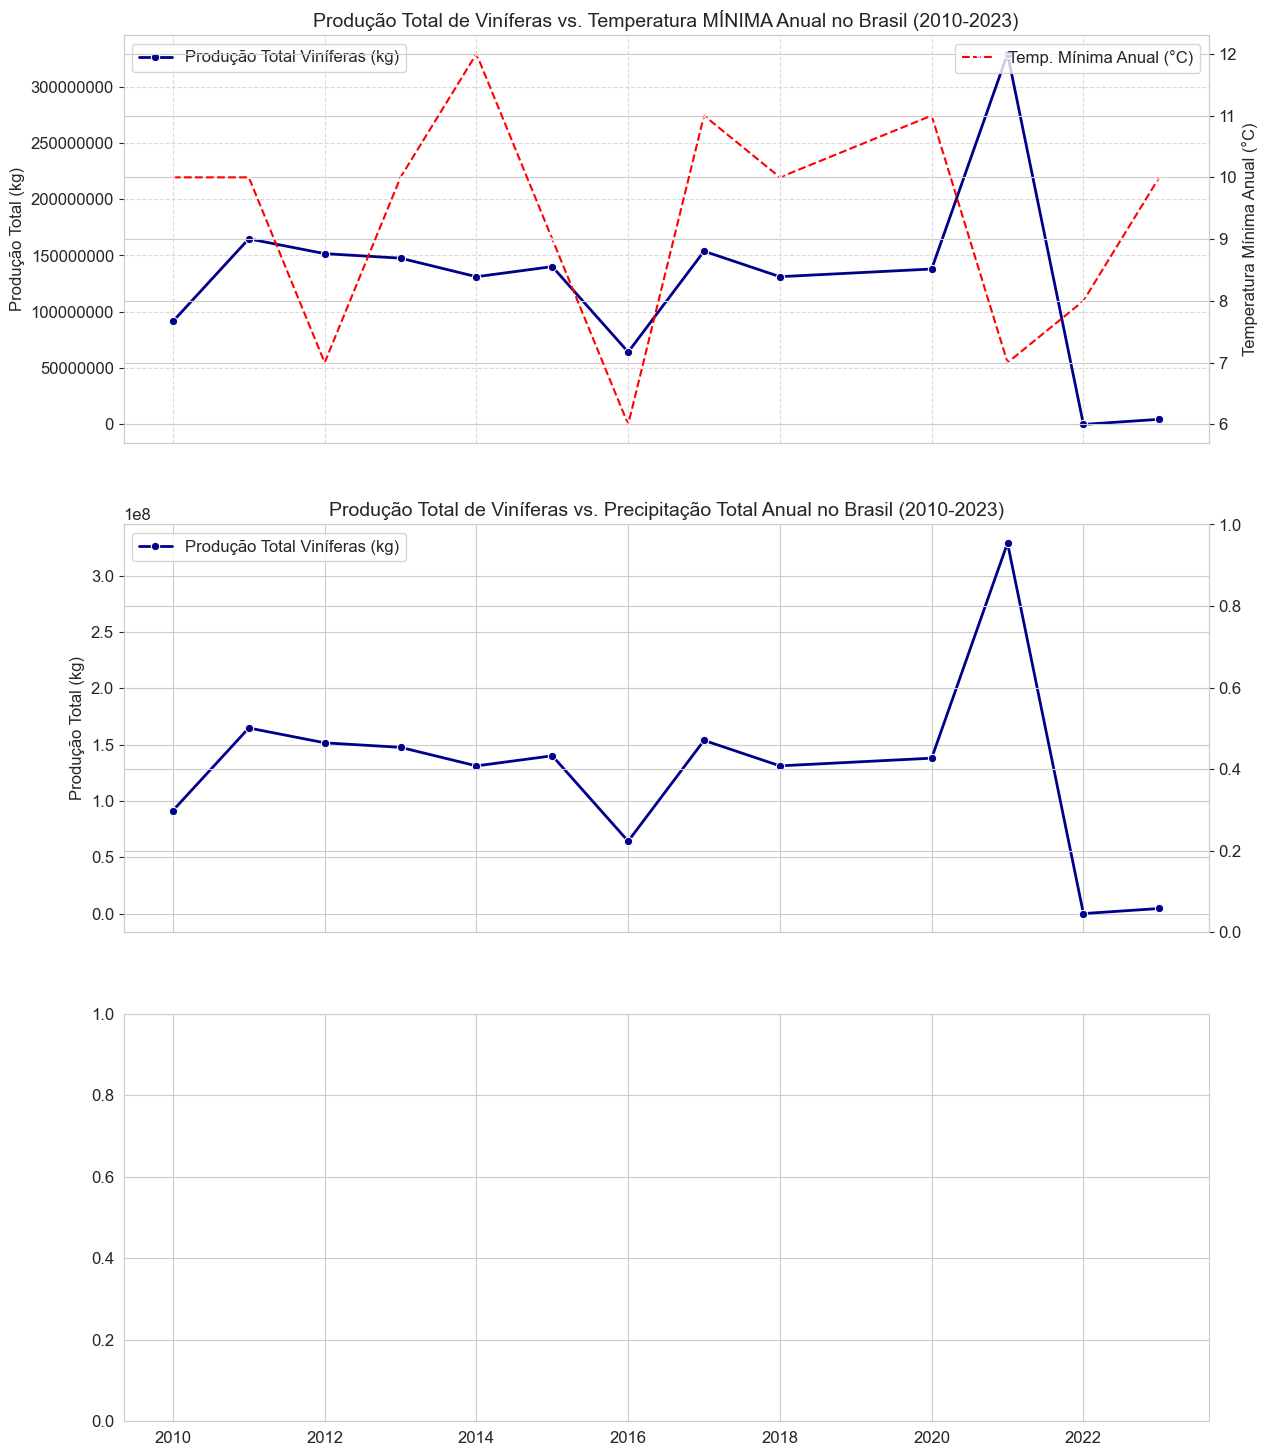

In [ ]:
# Célula 11 (Reestruturada para novo dataset climático): Análise Detalhada de Produção por Tipo (Top/Least Produced e Correlação Climática)

print("\n--- Análise Detalhada de Produção por Tipo de Vinho (Novo Dataset Climático) ---")

# Lista dos DataFrames a serem processados e seus nomes amigáveis
producao_dfs = {
    'Viníferas': df_viniferas,
    'Americanas': df_americanas,
    'Sem Classificação': df_sem_classificacao
}

# Período de análise consistente com o clima (até 2023, pois produção vai até 2023)
ano_atual_producao = 2023 # Ano máximo encontrado nos DFs de produção
ano_inicio_producao_analise = ano_atual_producao - 13 # 14 anos incluindo 2023 (2010 a 2023)

for df_nome, df in producao_dfs.items():
    # Garantir que o df específico e df_clima_anual estão disponíveis
    if df is not None and 'df_clima_anual' in locals() and df_clima_anual is not None:
        print(f"\n======== Análise para: {df_nome} ========")

        df_processado = df.copy() # Trabalhar com uma cópia para não alterar o DF original

        # 1. Renomear coluna de quantidade de forma robusta e tratar nulos
        coluna_quantidade_original = None
        if 'Quantidade (kg)' in df_processado.columns:
            coluna_quantidade_original = 'Quantidade (kg)'
        elif 'Quantidade (Kg)' in df_processado.columns: # Detecta a variação com 'K' maiúsculo
            coluna_quantidade_original = 'Quantidade (Kg)'

        if coluna_quantidade_original:
            df_processado.rename(columns={coluna_quantidade_original: 'Quantidade_Producao_kg'}, inplace=True)
            print(f"Coluna '{coluna_quantidade_original}' renomeada para 'Quantidade_Producao_kg' em {df_nome}.")

            if df_processado['Quantidade_Producao_kg'].isnull().any():
                print(f"Tratando {df_processado['Quantidade_Producao_kg'].isnull().sum()} valores nulos em 'Quantidade_Producao_kg' com 0 para {df_nome}.")
                df_processado['Quantidade_Producao_kg'].fillna(0, inplace=True)
                # Converter para int após preencher nulos, se apropriado
                df_processado['Quantidade_Producao_kg'] = df_processado['Quantidade_Producao_kg'].astype(int)
        else:
            print(f"Erro: Coluna de quantidade ('Quantidade (kg)' ou 'Quantidade (Kg)') não encontrada em {df_nome}.")
            print(f"Colunas disponíveis: {df_processado.columns.tolist()}")
            continue # Pula para o próximo DataFrame se a coluna crucial não for encontrada


        # 2. Filtrar os dados para o período de análise
        df_filtrado = df_processado[
            (df_processado['Ano'] >= ano_inicio_producao_analise) &
            (df_processado['Ano'] <= ano_atual_producao)
        ].copy()

        print(f"\nDados de produção de {df_nome} filtrados para {ano_inicio_producao_analise} a {ano_atual_producao}.")

        # 3. Calcular Produção Total Anual por Tipo de Nome
        # Isso será usado para o Top/Least Produced e para o merge com clima
        df_producao_anual_por_nome = df_filtrado.groupby(['Ano', 'Nome'])['Quantidade_Producao_kg'].sum().reset_index()

        # 4. Top 10 Mais Produzidos
        top_10_produzidos = df_producao_anual_por_nome.groupby('Nome')['Quantidade_Producao_kg'].sum().nlargest(10).reset_index()
        print(f"\n--- Top 10 Vinhos/Tipos Mais Produzidos ({df_nome}, 2010-2023) ---")
        print(top_10_produzidos)

        # 5. Top 10 Menos Produzidos (excluindo aqueles com produção 0 em todos os anos para serem mais relevantes)
        df_com_producao = df_producao_anual_por_nome[df_producao_anual_por_nome['Quantidade_Producao_kg'] > 0]
        if not df_com_producao.empty:
            least_10_produzidos = df_com_producao.groupby('Nome')['Quantidade_Producao_kg'].sum().nsmallest(10).reset_index()
            print(f"\n--- Top 10 Vinhos/Tipos Menos Produzidos (com produção > 0, {df_nome}, 2010-2023) ---")
            print(least_10_produzidos)
        else:
            print(f"\nNão há vinhos/tipos com produção > 0 para identificar os menos produzidos em {df_nome}.")


        # 6. Correlação com Dados Climáticos (Produção Total Anual de CADA TIPO vs. Clima)
        df_total_tipo_anual = df_filtrado.groupby('Ano')['Quantidade_Producao_kg'].sum().reset_index()

        df_producao_clima_tipo = pd.merge(df_total_tipo_anual, df_clima_anual, on='Ano', how='inner')

        print(f"\n--- DataFrame de Produção TOTAL de {df_nome} e Clima Anual (Merged com Novo Dataset Climático) ---")
        print(df_producao_clima_tipo.head())
        print(f"Colunas do DataFrame mergeado: {df_producao_clima_tipo.columns.tolist()}")

        # Gerar gráficos de correlação para Produção TOTAL do TIPO vs. Clima
        fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # 3 subplots para Temp Min, Precipitação, Vento Max

        # Gráfico 1: Produção Total do Tipo vs. Temperatura MÍNIMA Anual
        sns.lineplot(data=df_producao_clima_tipo, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[0], color='darkblue', label=f'Produção Total {df_nome} (kg)', linewidth=2)
        axes[0].set_title(f'Produção Total de {df_nome} vs. Temperatura MÍNIMA Anual no Brasil ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
        axes[0].set_ylabel('Produção Total (kg)')
        ax_temp_min = axes[0].twinx()
        sns.lineplot(data=df_producao_clima_tipo, x='Ano', y='Temperatura_Minima_Anual', marker='x', ax=ax_temp_min, color='red', linestyle='--', label='Temp. Mínima Anual (°C)', linewidth=1.5)
        ax_temp_min.set_ylabel('Temperatura Mínima Anual (°C)')
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].ticklabel_format(style='plain', axis='y')
        ax_temp_min.ticklabel_format(style='plain', axis='y')
        axes[0].legend(loc="upper left")
        ax_temp_min.legend(loc="upper right")

        # Gráfico 2: Produção Total do Tipo vs. Precipitação TOTAL Anual
        sns.lineplot(data=df_producao_clima_tipo, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[1], color='darkblue', label=f'Produção Total {df_nome} (kg)', linewidth=2)
        axes[1].set_title(f'Produção Total de {df_nome} vs. Precipitação Total Anual no Brasil ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
        axes[1].set_ylabel('Produção Total (kg)')
        ax_prec = axes[1].twinx()
        sns.lineplot(data=df_producao_clima_tipo, x='Ano', y='Precipitacao_Media_Anual', marker='x', ax=ax_prec, color='green', linestyle='--', label='Precipitação Total Anual (mm)', linewidth=1.5) # Label ajustado
        ax_prec.set_ylabel('Precipitação Total Anual (mm)')
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].ticklabel_format(style='plain', axis='y')
        ax_prec.ticklabel_format(style='plain', axis='y')
        axes[1].legend(loc="upper left")
        ax_prec.legend(loc="upper right")

        # Gráfico 3: Produção Total do Tipo vs. Vento MÁXIMO Anual
        sns.lineplot(data=df_producao_clima_tipo, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[2], color='darkblue', label=f'Produção Total {df_nome} (kg)', linewidth=2)
        axes[2].set_title(f'Produção Total de {df_nome} vs. Vento MÁXIMO Anual no Brasil ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
        axes[2].set_xlabel('Ano')
        axes[2].set_ylabel('Produção Total (kg)')
        ax_vento_max = axes[2].twinx()
        sns.lineplot(data=df_producao_clima_tipo, x='Ano', y='Vento_Maximo_Anual', marker='x', ax=ax_vento_max, color='purple', linestyle='--', label='Vento Máximo Anual (m/s)', linewidth=1.5)
        ax_vento_max.set_ylabel('Vento Máximo Anual (m/s)')
        axes[2].grid(True, linestyle='--', alpha=0.7)
        axes[2].ticklabel_format(style='plain', axis='y')
        ax_vento_max.ticklabel_format(style='plain', axis='y')
        axes[2].legend(loc="upper left")
        ax_vento_max.legend(loc="upper right")

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        print(f"\n--- Sumário para o Relatório de Produção de {df_nome} e Clima ---")
        print(f"Período analisado: {ano_inicio_producao_analise} a {ano_atual_producao}")
        print("\nPontos chave para o relatório:")
        print(f"1. Top 10 e Menos 10 Tipos de {df_nome} produzidos e sua relevância.")
        print("2. Tendência da produção total desse tipo ao longo dos anos.")
        print("3. Observar possíveis correlações entre a produção e as condições de temperatura mínima, precipitação total e vento máximo.")
        print("4. Discutir implicações para a oferta e potencial de exportação de cada tipo.")
        print("="*80) # Separador visual para próxima análise

    else:
        print(f"DataFrame '{df_nome}' ou 'df_clima_anual' não está disponível. Não foi possível realizar a análise completa.")


--- Preparando e Analisando Produção Total Geral vs. Clima (Novo Dataset Climático) ---
Coluna 'Quantidade (kg)' renomeada para 'Quantidade_Producao_kg' em df_producao.

Dados de produção filtrados para os anos de 2010 a 2023.
Total de linhas de produção após filtro: 714

--- Produção Total Geral Anual (kg) ---
    Ano  Quantidade_Producao_kg
0  2010               642820786
1  2011               921104534
2  2012               857603200
3  2013               743277338
4  2014               748536510

--- DataFrame de Produção Total Geral e Clima Anual (Merged com Novo Dataset Climático) ---
    Ano  Quantidade_Producao_kg  Precipitacao_Total_Anual  \
0  2010               642820786                   1618.00   
1  2011               921104534                   1692.62   
2  2012               857603200                   1471.08   
3  2013               743277338                   1717.16   
4  2014               748536510                   1896.95   

   Precipitacao_Min_Anual_Abs  Pre

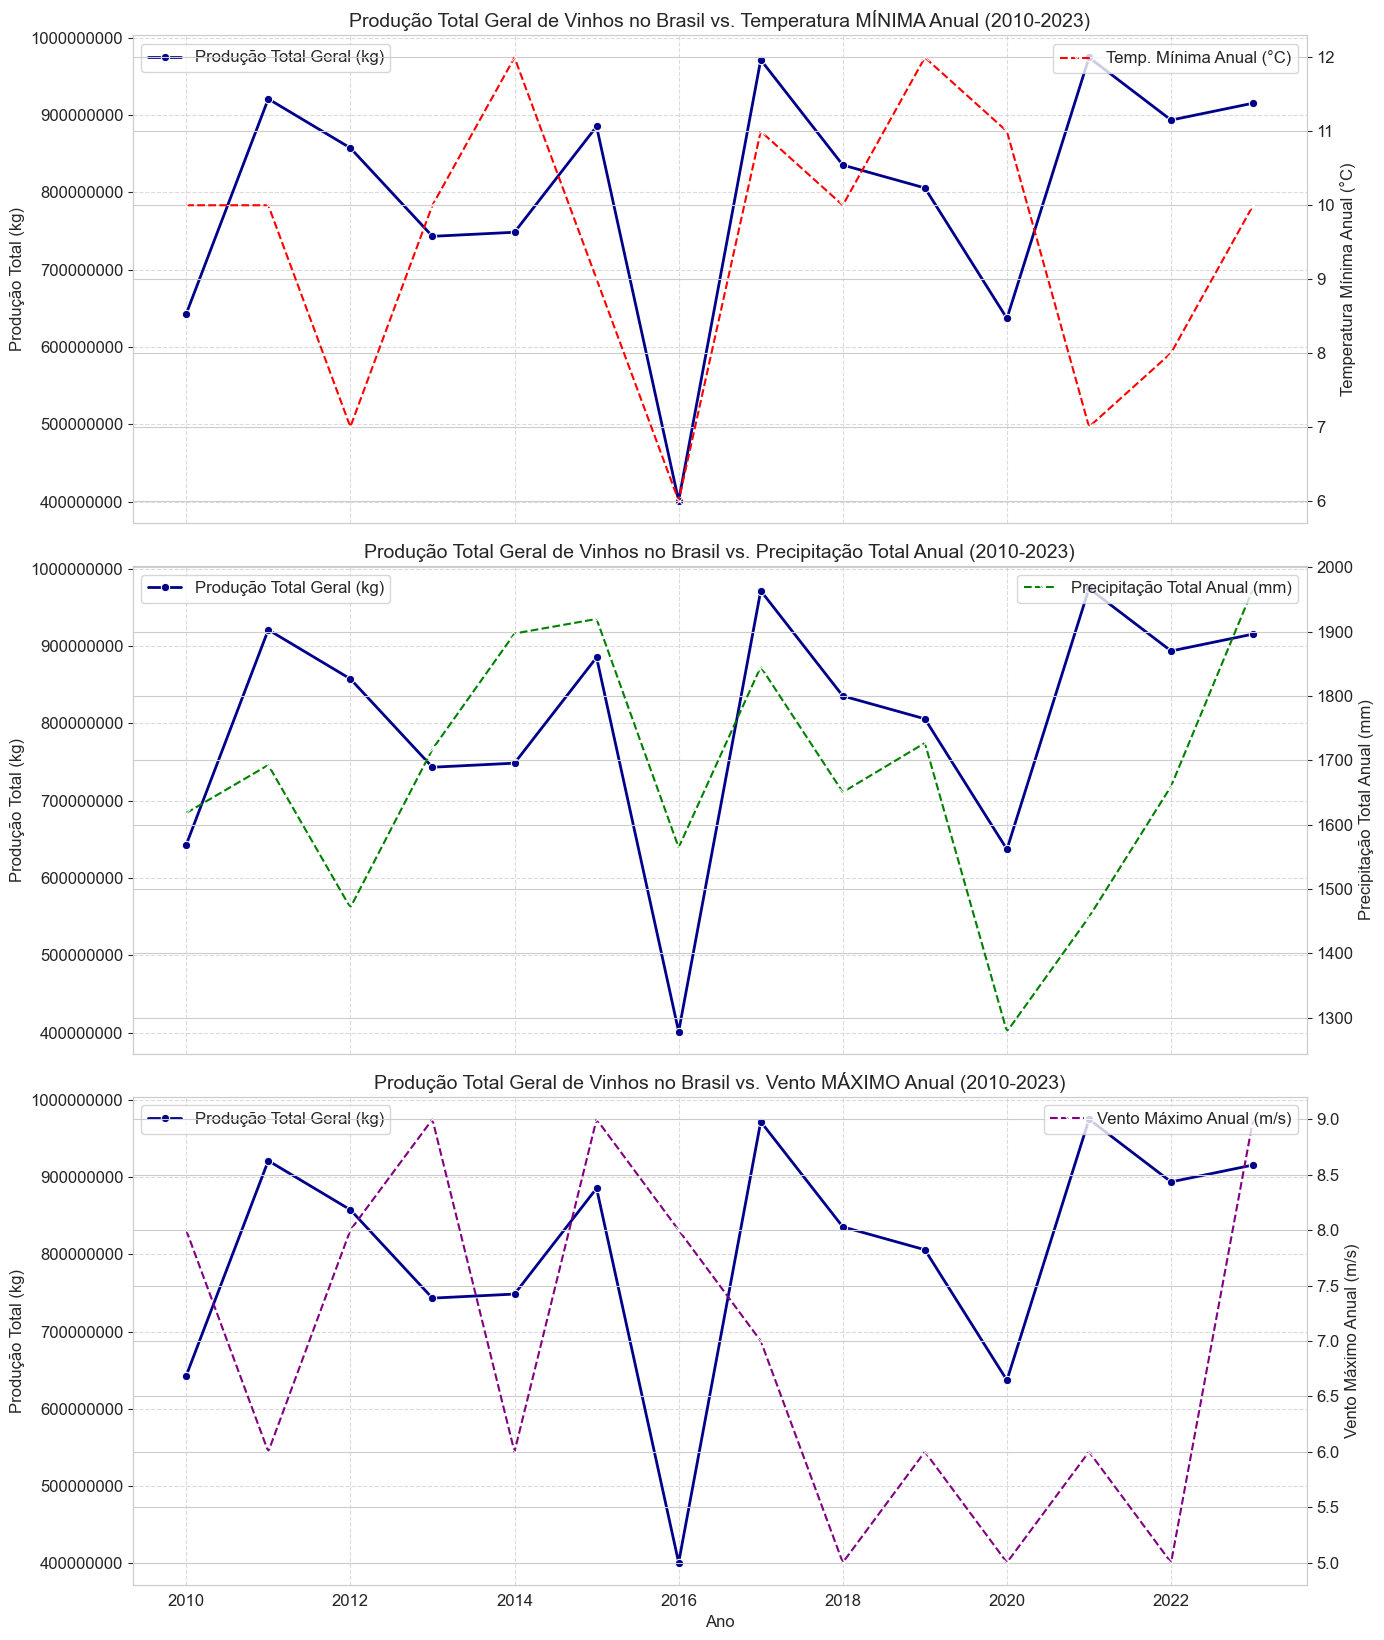


--- Sumário para o Relatório de Produção Total Geral e Clima ---
Período analisado: 2010 a 2023

Pontos chave para o relatório:
1. Tendência geral da produção total de vinhos no Brasil nos últimos 14 anos.
2. Observar picos e vales na produção e tentar correlacioná-los visualmente com as variações de temperatura mínima, precipitação total e vento máximo.
3. Discutir como condições climáticas anormais (temperaturas muito baixas, seca/chuva excessiva, ventos fortes) podem impactar a safra e, consequentemente, a disponibilidade de vinho para o mercado interno e exportação.
4. Considerar que dados climáticos de uma única fonte podem não representar toda a diversidade de regiões produtoras no Brasil, mas fornecem uma visão macro.


In [ ]:
# Célula 9 (Final Reestruturada para Producao.csv e Novo Dataset Climático):
# Preparação, Merge e Visualização de Produção Total Geral vs. Clima

print("\n--- Preparando e Analisando Produção Total Geral vs. Clima (Novo Dataset Climático) ---")

# Verificar se df_producao e df_clima_anual estão disponíveis
# df_clima_anual agora vem da Célula 6 (com métricas detalhadas do df_clima_detalhado)
if df_producao is not None and 'df_clima_anual' in locals() and df_clima_anual is not None:

    # 1. Renomear coluna 'Quantidade (kg)' para 'Quantidade_Producao_kg' para maior clareza
    # Adicionar a robustez na renomeação
    df_producao_processado = df_producao.copy()
    coluna_quantidade_original = None
    if 'Quantidade (kg)' in df_producao_processado.columns:
        coluna_quantidade_original = 'Quantidade (kg)'
    elif 'Quantidade (Kg)' in df_producao_processado.columns:
        coluna_quantidade_original = 'Quantidade (Kg)'

    if coluna_quantidade_original:
        df_producao_processado.rename(columns={coluna_quantidade_original: 'Quantidade_Producao_kg'}, inplace=True)
        print(f"Coluna '{coluna_quantidade_original}' renomeada para 'Quantidade_Producao_kg' em df_producao.")
    else:
        print(f"Erro: Coluna de quantidade ('Quantidade (kg)' ou 'Quantidade (Kg)') não encontrada em df_producao.")
        print(f"Colunas disponíveis: {df_producao_processado.columns.tolist()}")
        # Se a coluna crucial não for encontrada, parar a execução da célula
        raise Exception("Não foi possível prosseguir com a análise de produção. Verifique o nome da coluna de quantidade.")

    # 2. Filtrar os dados de produção para os últimos 15 anos (2010-2023, já que o último ano é 2023)
    ano_atual_producao = df_producao_processado['Ano'].max() # 2023
    ano_inicio_producao_analise = ano_atual_producao - 13 # 14 anos incluindo 2023 (2023 - 13 = 2010)

    df_producao_filtrada = df_producao_processado[
        (df_producao_processado['Ano'] >= ano_inicio_producao_analise) &
        (df_producao_processado['Ano'] <= ano_atual_producao)
    ].copy()

    print(f"\nDados de produção filtrados para os anos de {ano_inicio_producao_analise} a {ano_atual_producao}.")
    print(f"Total de linhas de produção após filtro: {len(df_producao_filtrada)}")

    # 3. Calcular a produção TOTAL anual (somando todos os 'Nomes' de produtos)
    df_producao_total_anual = df_producao_filtrada.groupby('Ano')['Quantidade_Producao_kg'].sum().reset_index()
    print("\n--- Produção Total Geral Anual (kg) ---")
    print(df_producao_total_anual.head())

    # 4. Fazer o merge da produção total anual com os dados climáticos anuais (df_clima_anual)
    df_producao_clima = pd.merge(df_producao_total_anual, df_clima_anual, on='Ano', how='inner')

    print("\n--- DataFrame de Produção Total Geral e Clima Anual (Merged com Novo Dataset Climático) ---")
    print(df_producao_clima.head())
    print(f"\nColunas do DataFrame mergeado: {df_producao_clima.columns.tolist()}")

    # 5. Gerar gráficos para o relatório de Produção Total Geral x Clima (com novas métricas)

    fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # 3 subplots para Temp Min, Precipitação, Vento Max

    # Gráfico 1: Produção Total Geral vs. Temperatura MÍNIMA Anual
    sns.lineplot(data=df_producao_clima, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[0], color='darkblue', label='Produção Total Geral (kg)', linewidth=2)
    axes[0].set_title(f'Produção Total Geral de Vinhos no Brasil vs. Temperatura MÍNIMA Anual ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
    axes[0].set_ylabel('Produção Total (kg)')
    ax_temp_min = axes[0].twinx()
    sns.lineplot(data=df_producao_clima, x='Ano', y='Temperatura_Minima_Anual', marker='x', ax=ax_temp_min, color='red', linestyle='--', label='Temp. Mínima Anual (°C)', linewidth=1.5)
    ax_temp_min.set_ylabel('Temperatura Mínima Anual (°C)')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].ticklabel_format(style='plain', axis='y')
    ax_temp_min.ticklabel_format(style='plain', axis='y')
    axes[0].legend(loc="upper left")
    ax_temp_min.legend(loc="upper right")

    # Gráfico 2: Produção Total Geral vs. Precipitação TOTAL Anual
    sns.lineplot(data=df_producao_clima, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[1], color='darkblue', label='Produção Total Geral (kg)', linewidth=2)
    axes[1].set_title(f'Produção Total Geral de Vinhos no Brasil vs. Precipitação Total Anual ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
    axes[1].set_ylabel('Produção Total (kg)')
    ax_prec = axes[1].twinx()
    sns.lineplot(data=df_producao_clima, x='Ano', y='Precipitacao_Total_Anual', marker='x', ax=ax_prec, color='green', linestyle='--', label='Precipitação Total Anual (mm)', linewidth=1.5)
    ax_prec.set_ylabel('Precipitação Total Anual (mm)')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].ticklabel_format(style='plain', axis='y')
    ax_prec.ticklabel_format(style='plain', axis='y')
    axes[1].legend(loc="upper left")
    ax_prec.legend(loc="upper right")

    # Gráfico 3: Produção Total Geral vs. Vento MÁXIMO Anual
    sns.lineplot(data=df_producao_clima, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[2], color='darkblue', label='Produção Total Geral (kg)', linewidth=2)
    axes[2].set_title(f'Produção Total Geral de Vinhos no Brasil vs. Vento MÁXIMO Anual ({ano_inicio_producao_analise}-{ano_atual_producao})', fontsize=14)
    axes[2].set_xlabel('Ano')
    axes[2].set_ylabel('Produção Total (kg)')
    ax_vento_max = axes[2].twinx()
    sns.lineplot(data=df_producao_clima, x='Ano', y='Vento_Maximo_Anual', marker='x', ax=ax_vento_max, color='purple', linestyle='--', label='Vento Máximo Anual (m/s)', linewidth=1.5)
    ax_vento_max.set_ylabel('Vento Máximo Anual (m/s)')
    axes[2].grid(True, linestyle='--', alpha=0.7)
    axes[2].ticklabel_format(style='plain', axis='y')
    ax_vento_max.ticklabel_format(style='plain', axis='y')
    axes[2].legend(loc="upper left")
    ax_vento_max.legend(loc="upper right")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    print("\n--- Sumário para o Relatório de Produção Total Geral e Clima ---")
    print(f"Período analisado: {ano_inicio_producao_analise} a {ano_atual_producao}")
    print("\nPontos chave para o relatório:")
    print("1. Tendência geral da produção total de vinhos no Brasil nos últimos 14 anos.")
    print("2. Observar picos e vales na produção e tentar correlacioná-los visualmente com as variações de temperatura mínima, precipitação total e vento máximo.")
    print("3. Discutir como condições climáticas anormais (temperaturas muito baixas, seca/chuva excessiva, ventos fortes) podem impactar a safra e, consequentemente, a disponibilidade de vinho para o mercado interno e exportação.")
    print("4. Considerar que dados climáticos de uma única fonte podem não representar toda a diversidade de regiões produtoras no Brasil, mas fornecem uma visão macro.")
    print("="*80) # Separador visual

else:
    print("DataFrame 'df_producao' ou 'df_clima_anual' não está disponível. Verifique o carregamento das células anteriores.")


--- Gerando Matrizes de Correlação e Heatmaps (Métricas Climáticas Detalhadas) ---

======== Correlação: Exportação (Valor e Litros) vs. APENAS Economia (Brasil) ========


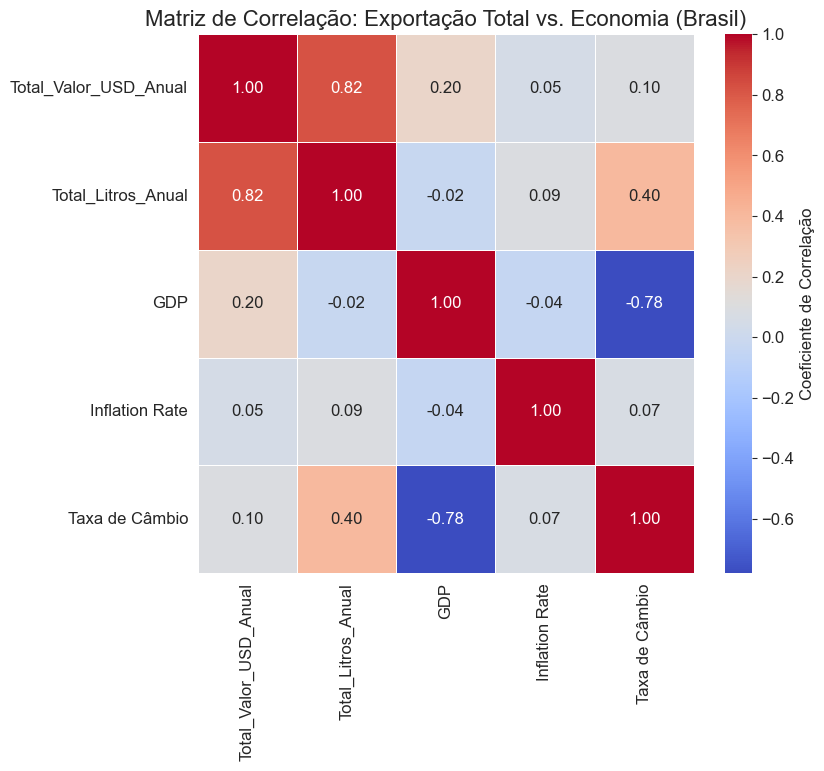


--- VALORES DA MATRIZ DE CORRELAÇÃO: Exportação Total vs. Economia (Brasil) ---
                       Total_Valor_USD_Anual  Total_Litros_Anual   GDP  Inflation Rate  Taxa de Câmbio
Total_Valor_USD_Anual                   1.00                0.82  0.20            0.05            0.10
Total_Litros_Anual                      0.82                1.00 -0.02            0.09            0.40
GDP                                     0.20               -0.02  1.00           -0.04           -0.78
Inflation Rate                          0.05                0.09 -0.04            1.00            0.07
Taxa de Câmbio                          0.10                0.40 -0.78            0.07            1.00

Interpretando a matriz:
- Valores próximos a 1 indicam forte correlação positiva (ex: ambos aumentam).
- Valores próximos a -1 indicam forte correlação negativa (ex: um aumenta e outro diminui).
- Valores próximos a 0 indicam pouca correlação linear.

Foco: Linhas 'Total_Valor_USD_Anual' e 'Total_Li

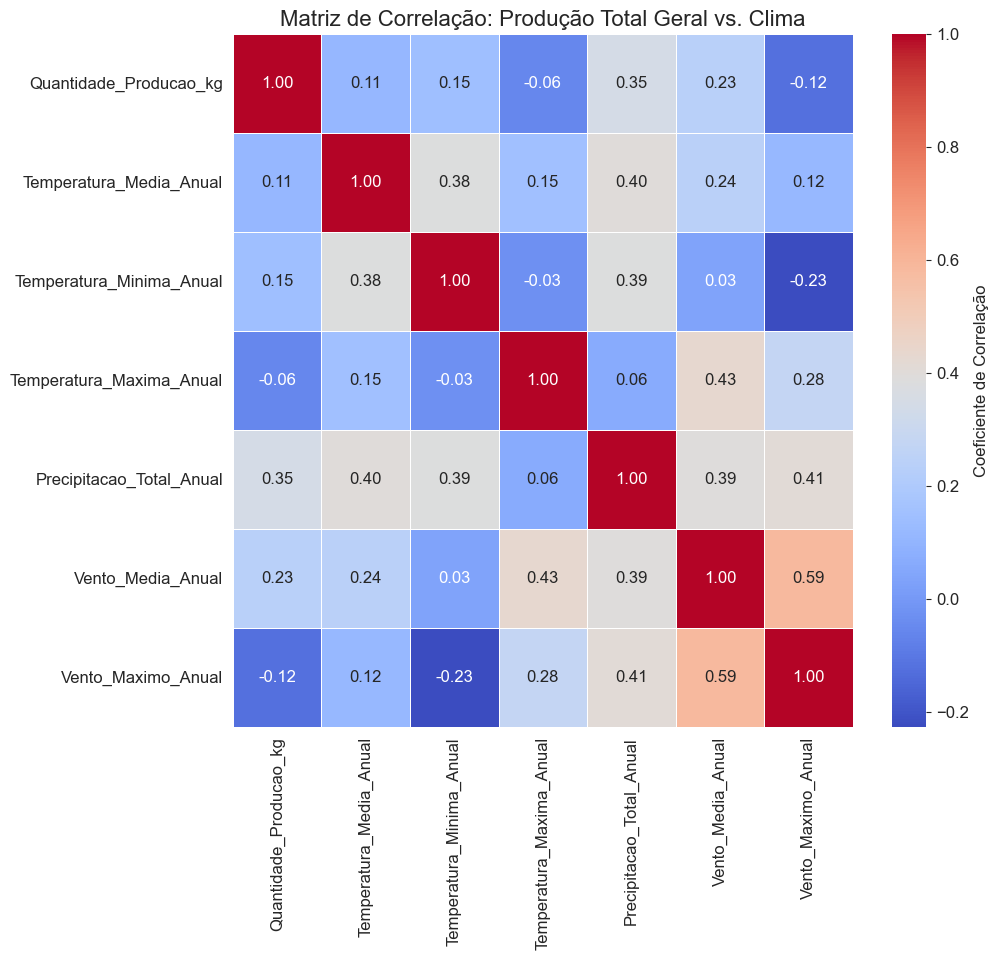


--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Geral vs. Clima ---
                          Quantidade_Producao_kg  Temperatura_Media_Anual  Temperatura_Minima_Anual  Temperatura_Maxima_Anual  Precipitacao_Total_Anual  Vento_Media_Anual  Vento_Maximo_Anual
Quantidade_Producao_kg                      1.00                     0.11                      0.15                     -0.06                      0.35               0.23               -0.12
Temperatura_Media_Anual                     0.11                     1.00                      0.38                      0.15                      0.40               0.24                0.12
Temperatura_Minima_Anual                    0.15                     0.38                      1.00                     -0.03                      0.39               0.03               -0.23
Temperatura_Maxima_Anual                   -0.06                     0.15                     -0.03                      1.00                      0.06            

C:\Users\zirn1\AppData\Local\Temp\ipykernel_20192\3824294055.py:103: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processado_corr['Quantidade_Producao_kg'].fillna(0, inplace=True)


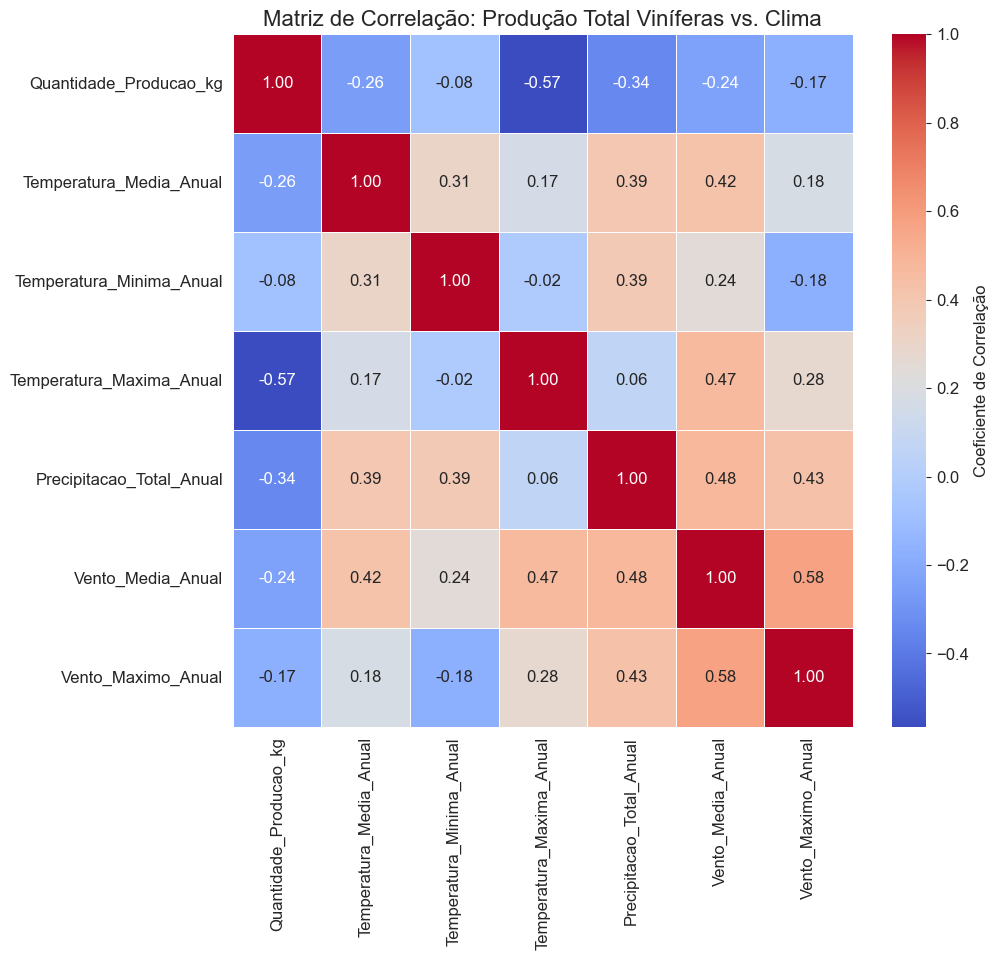


--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Viníferas vs. Clima ---
                          Quantidade_Producao_kg  Temperatura_Media_Anual  Temperatura_Minima_Anual  Temperatura_Maxima_Anual  Precipitacao_Total_Anual  Vento_Media_Anual  Vento_Maximo_Anual
Quantidade_Producao_kg                      1.00                    -0.26                     -0.08                     -0.57                     -0.34              -0.24               -0.17
Temperatura_Media_Anual                    -0.26                     1.00                      0.31                      0.17                      0.39               0.42                0.18
Temperatura_Minima_Anual                   -0.08                     0.31                      1.00                     -0.02                      0.39               0.24               -0.18
Temperatura_Maxima_Anual                   -0.57                     0.17                     -0.02                      1.00                      0.06        

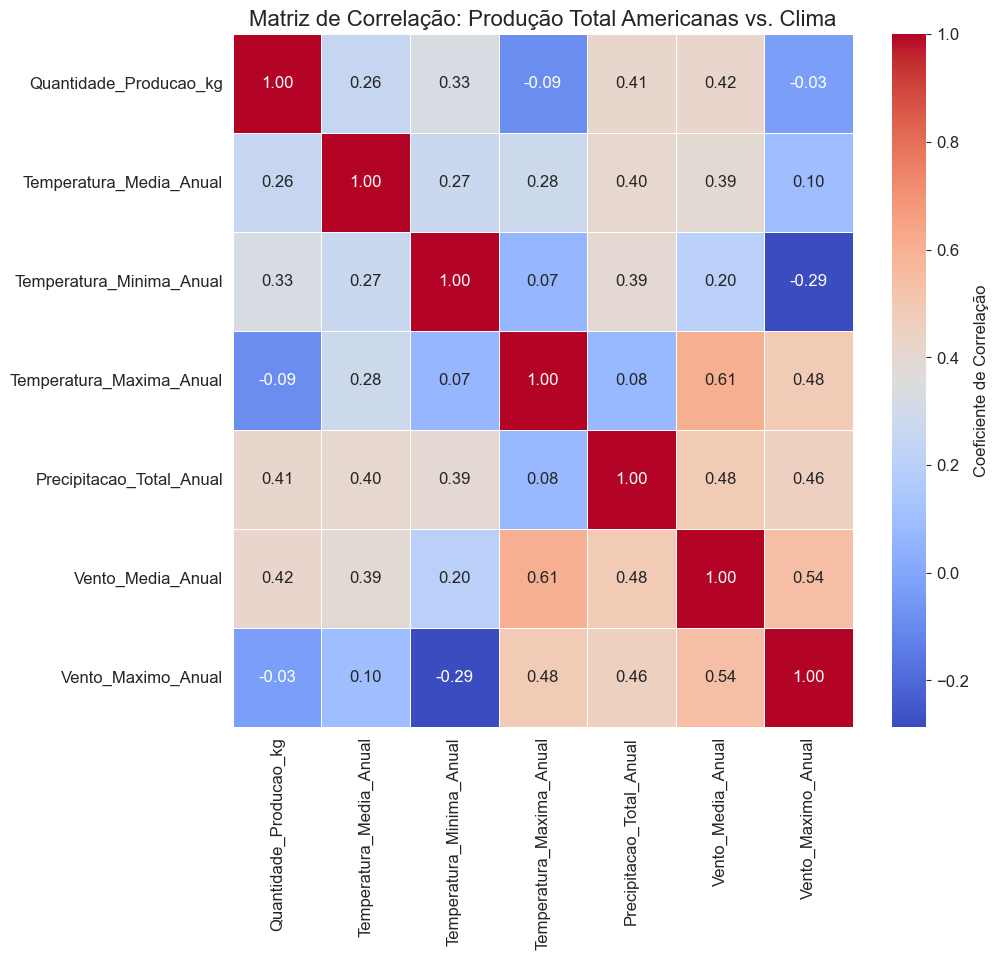


--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Americanas vs. Clima ---
                          Quantidade_Producao_kg  Temperatura_Media_Anual  Temperatura_Minima_Anual  Temperatura_Maxima_Anual  Precipitacao_Total_Anual  Vento_Media_Anual  Vento_Maximo_Anual
Quantidade_Producao_kg                      1.00                     0.26                      0.33                     -0.09                      0.41               0.42               -0.03
Temperatura_Media_Anual                     0.26                     1.00                      0.27                      0.28                      0.40               0.39                0.10
Temperatura_Minima_Anual                    0.33                     0.27                      1.00                      0.07                      0.39               0.20               -0.29
Temperatura_Maxima_Anual                   -0.09                     0.28                      0.07                      1.00                      0.08       

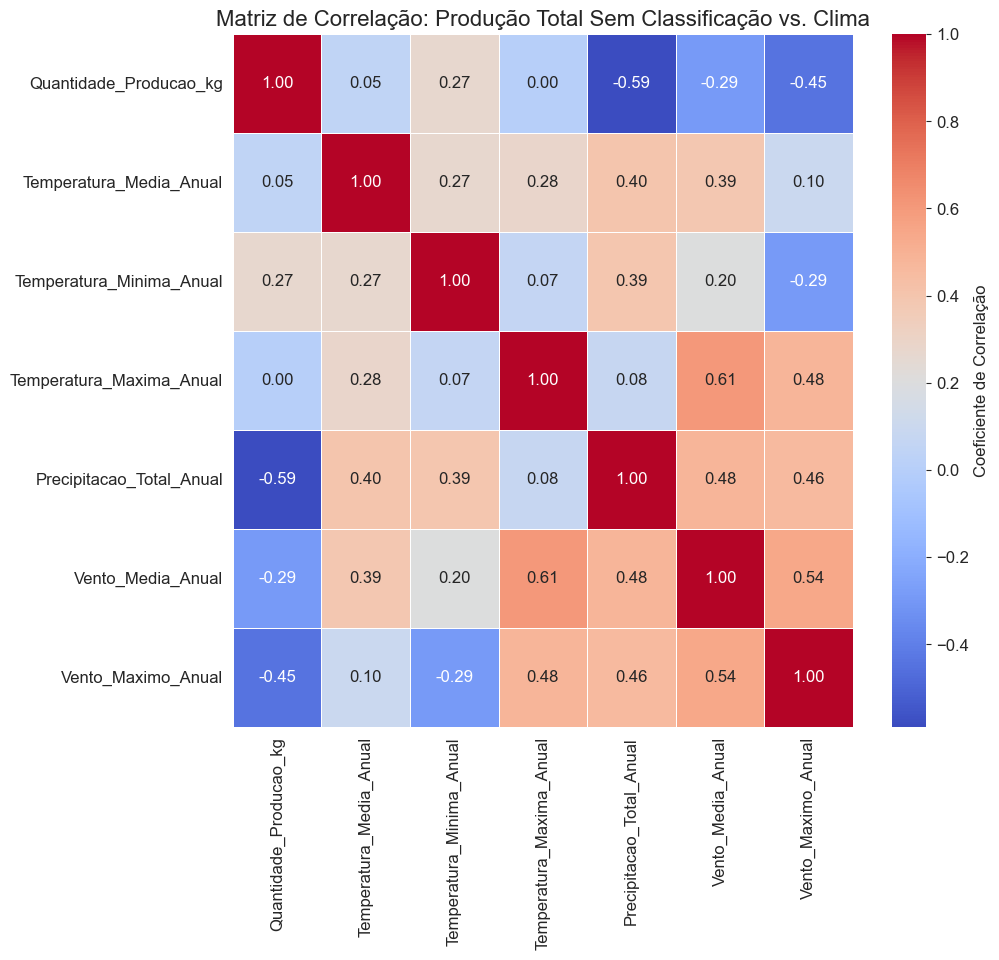


--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Sem Classificação vs. Clima ---
                          Quantidade_Producao_kg  Temperatura_Media_Anual  Temperatura_Minima_Anual  Temperatura_Maxima_Anual  Precipitacao_Total_Anual  Vento_Media_Anual  Vento_Maximo_Anual
Quantidade_Producao_kg                      1.00                     0.05                      0.27                      0.00                     -0.59              -0.29               -0.45
Temperatura_Media_Anual                     0.05                     1.00                      0.27                      0.28                      0.40               0.39                0.10
Temperatura_Minima_Anual                    0.27                     0.27                      1.00                      0.07                      0.39               0.20               -0.29
Temperatura_Maxima_Anual                    0.00                     0.28                      0.07                      1.00                      0.08

In [ ]:
# Célula 12 (Revisada - Foco Apenas em Exportação vs. Economia no 1º Heatmap):
# Análise de Correlação e Heatmaps com Métricas Refinadas

print("\n--- Gerando Matrizes de Correlação e Heatmaps (Métricas Climáticas Detalhadas) ---")

# --- 1. Correlação: Exportação Total (Valor e Litros) vs. APENAS Economia (Brasil) ---
# df_final_analise agora deve conter as novas métricas climáticas do df_clima_anual
if 'df_final_analise' in locals() and df_final_analise is not None:
    print("\n======== Correlação: Exportação (Valor e Litros) vs. APENAS Economia (Brasil) ========")

    # Selecionar colunas relevantes para a correlação: APENAS EXPORTAÇÃO E ECONÔMIA
    cols_export_economia = [
        'Total_Valor_USD_Anual',
        'Total_Litros_Anual',
        'GDP',
        'Inflation Rate',
        'Taxa de Câmbio'
    ]

    # Filtrar para garantir que todas as colunas existem antes de calcular a correlação
    existing_cols = [col for col in cols_export_economia if col in df_final_analise.columns]

    if len(existing_cols) > 1:
        corr_export_economia = df_final_analise[existing_cols].corr() # Variável renomeada para clareza

        plt.figure(figsize=(8, 7)) # Tamanho ajustado para menos colunas
        sns.heatmap(corr_export_economia, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'})
        plt.title('Matriz de Correlação: Exportação Total vs. Economia (Brasil)', fontsize=16) # Título ajustado
        plt.show()

        print("\n--- VALORES DA MATRIZ DE CORRELAÇÃO: Exportação Total vs. Economia (Brasil) ---")
        print(corr_export_economia.to_string(float_format="%.2f"))
        print("\nInterpretando a matriz:")
        print("- Valores próximos a 1 indicam forte correlação positiva (ex: ambos aumentam).")
        print("- Valores próximos a -1 indicam forte correlação negativa (ex: um aumenta e outro diminui).")
        print("- Valores próximos a 0 indicam pouca correlação linear.")
        print("\nFoco: Linhas 'Total_Valor_USD_Anual' e 'Total_Litros_Anual' para entender os drivers.")
    else:
        print("Não há colunas suficientes para calcular a correlação para Exportação vs. Economia. Verifique as células anteriores.")
else:
    print("DataFrame 'df_final_analise' não está disponível. Não foi possível gerar correlação de Exportação.")


# --- 2. Correlação: Produção Total (Geral) vs. Clima ---
# O código a partir daqui (seção 2 e 3) permanecerá inalterado, pois o pedido foi focado apenas na primeira matriz.
# df_producao_clima agora deve conter as novas métricas climáticas do df_clima_anual
if 'df_producao_clima' in locals() and df_producao_clima is not None:
    print("\n======== Correlação: Produção Total (Geral) vs. Clima ========")

    # Selecionar colunas relevantes (estas incluem clima e produção)
    cols_producao_clima = [
        'Quantidade_Producao_kg',
        'Temperatura_Media_Anual',
        'Temperatura_Minima_Anual',
        'Temperatura_Maxima_Anual',
        'Precipitacao_Total_Anual',
        'Vento_Media_Anual',
        'Vento_Maximo_Anual'
    ]

    existing_cols_prod_clima = [col for col in cols_producao_clima if col in df_producao_clima.columns]

    if len(existing_cols_prod_clima) > 1:
        corr_producao_clima = df_producao_clima[existing_cols_prod_clima].corr()

        plt.figure(figsize=(10, 9))
        sns.heatmap(corr_producao_clima, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'})
        plt.title('Matriz de Correlação: Produção Total Geral vs. Clima', fontsize=16)
        plt.show()
        
        print("\n--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Geral vs. Clima ---")
        print(corr_producao_clima.to_string(float_format="%.2f"))
        print("\nFoco: Linha 'Quantidade_Producao_kg' para entender a influência do clima na produção total.")
    else:
        print("Não há colunas suficientes para calcular a correlação para Produção Total vs. Clima. Verifique as células anteriores.")
else:
    print("DataFrame 'df_producao_clima' não está disponível. Não foi possível gerar correlação de Produção Geral.")


# --- 3. Correlação: Produção por Tipo (Viníferas, Americanas, Sem Classificação) vs. Clima ---
producao_dfs_corr = {
    'Viníferas': df_viniferas,
    'Americanas': df_americanas,
    'Sem Classificação': df_sem_classificacao
}

for df_nome, df in producao_dfs_corr.items():
    # Assegurar que df_clima_anual existe com as novas colunas
    if df is not None and 'df_clima_anual' in locals() and df_clima_anual is not None:
        print(f"\n======== Correlação: Produção {df_nome} vs. Clima ========")

        df_processado_corr = df.copy()

        coluna_quantidade_original = None
        if 'Quantidade (kg)' in df_processado_corr.columns:
            coluna_quantidade_original = 'Quantidade (kg)'
        elif 'Quantidade (Kg)' in df_processado_corr.columns:
            coluna_quantidade_original = 'Quantidade (Kg)'

        if coluna_quantidade_original:
            df_processado_corr.rename(columns={coluna_quantidade_original: 'Quantidade_Producao_kg'}, inplace=True)
            if df_processado_corr['Quantidade_Producao_kg'].isnull().any():
                df_processado_corr['Quantidade_Producao_kg'].fillna(0, inplace=True)
                df_processado_corr['Quantidade_Producao_kg'] = df_processado_corr['Quantidade_Producao_kg'].astype(int)
        else:
            print(f"Erro: Coluna de quantidade não encontrada para {df_nome}. Pulando correlação.")
            continue

        ano_atual_producao = 2023
        ano_inicio_producao_analise = ano_atual_producao - 13

        df_filtrado_corr = df_processado_corr[
            (df_processado_corr['Ano'] >= ano_inicio_producao_analise) &
            (df_processado_corr['Ano'] <= ano_atual_producao)
        ].copy()

        df_total_tipo_anual_corr = df_filtrado_corr.groupby('Ano')['Quantidade_Producao_kg'].sum().reset_index()

        df_producao_clima_tipo_corr = pd.merge(df_total_tipo_anual_corr, df_clima_anual, on='Ano', how='inner')

        cols_producao_tipo_clima = [
            'Quantidade_Producao_kg',
            'Temperatura_Media_Anual',
            'Temperatura_Minima_Anual',
            'Temperatura_Maxima_Anual',
            'Precipitacao_Total_Anual',
            'Vento_Media_Anual',
            'Vento_Maximo_Anual'
        ]

        existing_cols_prod_tipo_clima = [col for col in cols_producao_tipo_clima if col in df_producao_clima_tipo_corr.columns]

        if len(existing_cols_prod_tipo_clima) > 1:
            corr_producao_tipo_clima = df_producao_clima_tipo_corr[existing_cols_prod_tipo_clima].corr()

            plt.figure(figsize=(10, 9))
            sns.heatmap(corr_producao_tipo_clima, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'})
            plt.title(f'Matriz de Correlação: Produção Total {df_nome} vs. Clima', fontsize=16)
            plt.show()
            
            print(f"\n--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total {df_nome} vs. Clima ---")
            print(corr_producao_tipo_clima.to_string(float_format="%.2f"))
            print(f"\nFoco: Linha 'Quantidade_Producao_kg' para entender a influência do clima na produção de {df_nome}.")
        else:
            print(f"Não há colunas suficientes para calcular a correlação para Produção {df_nome} vs. Clima.")
    else:
        print(f"DataFrame '{df_nome}' ou 'df_clima_anual' não está disponível para correlação. Verifique as células anteriores.")

In [ ]:
# Cálculo das Médias Anuais de Exportação

print("\n--- Cálculo das Médias Anuais de Exportação (Últimos 15 Anos) ---")

if 'df_total_anual' in locals() and df_total_anual is not None:
    # Garantir que estamos no período correto (2010-2024)
    # df_total_anual já deve estar filtrado para este período pela Célula 5

    media_litros_anual = df_total_anual['Total_Litros_Anual'].mean()
    media_valor_usd_anual = df_total_anual['Total_Valor_USD_Anual'].mean()

    print(f"Média Anual de Exportação em Litros (2010-2024): {media_litros_anual:,.0f} Litros")
    print(f"Média Anual de Exportação em Valor USD (2010-2024): US$ {media_valor_usd_anual:,.2f}")

    # Opcional: Desvio padrão para entender a variabilidade
    std_litros_anual = df_total_anual['Total_Litros_Anual'].std()
    std_valor_usd_anual = df_total_anual['Total_Valor_USD_Anual'].std()

    print(f"Desvio Padrão Anual de Litros Exportados: {std_litros_anual:,.0f} Litros")
    print(f"Desvio Padrão Anual de Valor USD Exportado: US$ {std_valor_usd_anual:,.2f}")

    print("\nEssas médias representam a performance consolidada ao longo do período analisado.")

else:
    print("DataFrame 'df_total_anual' não está disponível. Verifique a Célula 5.")


--- Cálculo das Médias Anuais de Exportação (Últimos 15 Anos) ---
Média Anual de Exportação em Litros (2010-2024): 4,199,018 Litros
Média Anual de Exportação em Valor USD (2010-2024): US$ 7,617,305.27
Desvio Padrão Anual de Litros Exportados: 2,558,894 Litros
Desvio Padrão Anual de Valor USD Exportado: US$ 4,874,398.05

Essas médias representam a performance consolidada ao longo do período analisado.


In [ ]:
# Cálculo dos Totais Acumulados de Exportação (Últimos 15 Anos)

print("\n--- Cálculo dos Totais Acumulados de Exportação (2010-2024) ---")

if 'df_total_anual' in locals() and df_total_anual is not None:
    # df_total_anual já contém os dados de 2010 a 2024 (do filtro na Célula 5)

    total_litros_acumulado = df_total_anual['Total_Litros_Anual'].sum()
    total_valor_usd_acumulado = df_total_anual['Total_Valor_USD_Anual'].sum()

    print(f"Total Acumulado de Exportação em Litros (2010-2024): {total_litros_acumulado:,.0f} Litros")
    print(f"Total Acumulado de Exportação em Valor USD (2010-2024): US$ {total_valor_usd_acumulado:,.2f}")

    print("\nEsses totais representam o volume e valor consolidado de todas as exportações no período.")

else:
    print("DataFrame 'df_total_anual' não está disponível. Verifique a Célula 5.")


--- Cálculo dos Totais Acumulados de Exportação (2010-2024) ---
Total Acumulado de Exportação em Litros (2010-2024): 62,985,264 Litros
Total Acumulado de Exportação em Valor USD (2010-2024): US$ 114,259,579.00

Esses totais representam o volume e valor consolidado de todas as exportações no período.



--- Análise Detalhada do Impacto Climático (Foco em El Niño 2014-2016 - Gráficos Separados) ---

--- Médias/Máximas Históricas Mensais (Excluindo 2014-2016 para Comparação) ---
   Mes  Precipitacao_max_Media  Vento_max_Media
0    1              384.333333         3.416667
1    2              277.583333         3.500000
2    3              304.916667         4.000000
3    4              263.916667         3.500000
4    5              302.000000         3.583333

--- Dados do Período El Niño (Período El Niño (2014-2016)) com Índice Contínuo ---
     Ano  Mes  Precipitacao_min  Precipitacao_media  Precipitacao_max  \
48  2014    1              77.0              178.00             274.0   
49  2014    2              51.0              163.00             294.0   
50  2014    3              76.0              160.29             251.0   
51  2014    4              54.0              148.33             346.0   
52  2014    5               0.0              159.83             264.0   

    Tempera

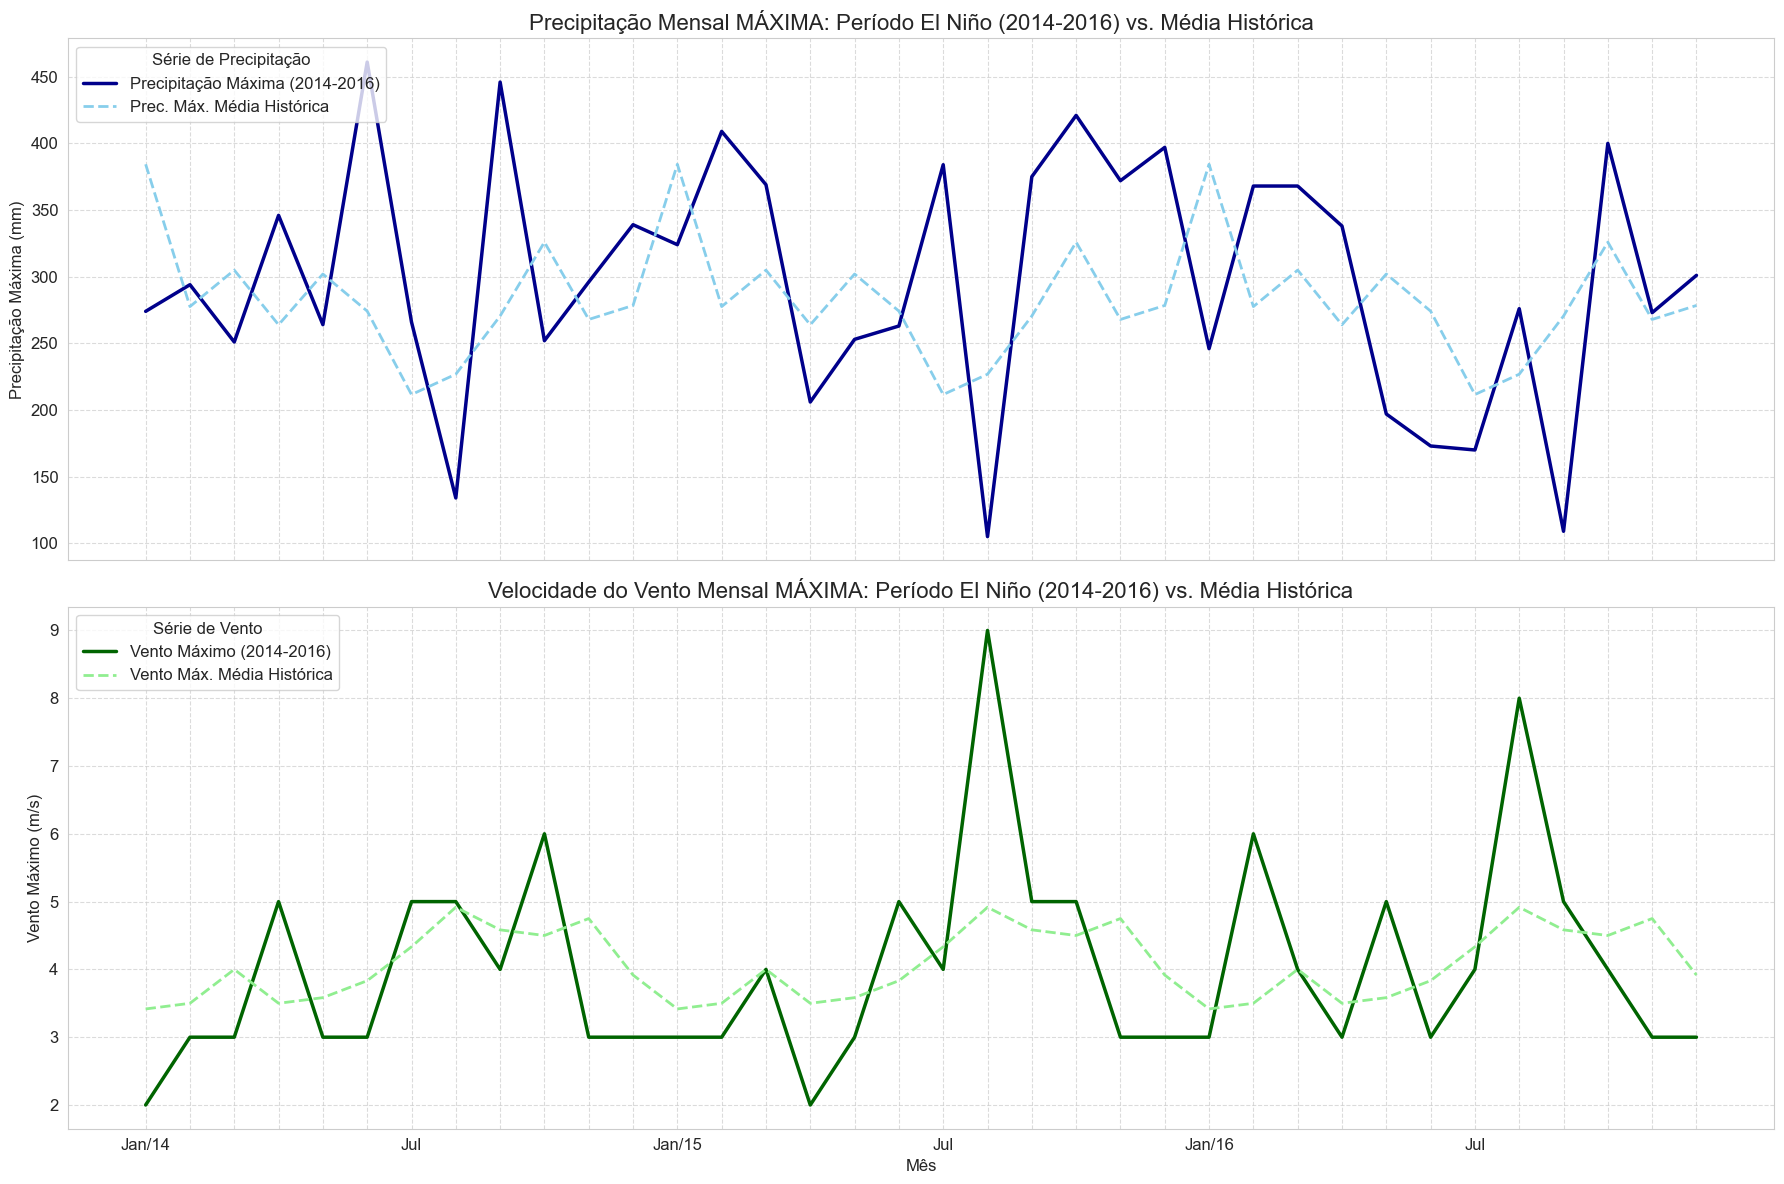


--- Pontos Chave para o Relatório (Impacto do El Niño Período El Niño (2014-2016)) ---
1. Observe a linha azul (Precipitação) e a linha verde (Vento) ao longo dos 3 anos (2014, 2015, 2016) em seus respectivos gráficos.
2. Compare cada uma dessas linhas com suas respectivas linhas tracejadas (Média Histórica) para identificar meses com anomalias significativas de picos de precipitação ou vento.
3. As linhas verticais implícitas a cada 12 meses indicam a transição entre os anos. Isso permite analisar padrões sazonais e como eles foram afetados durante o El Niño em relação à média.
4. Relacione os picos e vales (especialmente extremos) com o conhecido fenômeno do El Niño de Período El Niño (2014-2016) e discuta seus potenciais impactos na safra de uvas (ex: chuvas torrenciais, inundações, erosão, danos físicos causados por ventos fortes).
5. Considere como essas condições podem ter afetado a qualidade e/ou quantidade da produção nesses anos e anos subsequentes, com reflexos na exportação

In [ ]:
# Célula 15 (Final e Corrigida - Duas Tabelas Separadas para Precipitação e Vento):
# Análise Detalhada do Impacto Climático (Foco em 2014-2016 - Gráficos Separados)

print("\n--- Análise Detalhada do Impacto Climático (Foco em El Niño 2014-2016 - Gráficos Separados) ---")

# Anos do período do El Niño que queremos analisar
anos_el_nino_foco = [2014, 2015, 2016]
label_periodo_el_nino_foco = "Período El Niño (2014-2016)"


if 'df_clima_detalhado' in globals() and df_clima_detalhado is not None:
    # 1. Calcular médias/máximas mensais históricas (2010-2024 para cada mês, excluindo os anos de foco)
    df_clima_historico_sem_foco = df_clima_detalhado[
        (df_clima_detalhado['Ano'] >= 2010) &
        (df_clima_detalhado['Ano'] <= 2024) &
        (~df_clima_detalhado['Ano'].isin(anos_el_nino_foco))
    ].copy()

    df_medias_historicas_mensais = df_clima_historico_sem_foco.groupby('Mes').agg(
        Precipitacao_max_Media=('Precipitacao_max', 'mean'), # MÉDIA DAS MÁXIMAS MENSAIS HISTÓRICAS
        Vento_max_Media=('Vento_max', 'mean') # MÉDIA DOS VENTOS MÁXIMOS MENSAIS HISTÓRICOS
    ).reset_index()

    print(f"\n--- Médias/Máximas Históricas Mensais (Excluindo {label_periodo_el_nino_foco.split('(')[-1].replace(')', '')} para Comparação) ---")
    print(df_medias_historicas_mensais.head())


    # 2. Preparar dados para o período do El Niño (2014-2016) e a média histórica para plotagem contínua
    df_el_nino_plot = df_clima_detalhado[df_clima_detalhado['Ano'].isin(anos_el_nino_foco)].copy()

    if not df_el_nino_plot.empty:
        # Criar uma coluna de índice contínuo para o eixo X
        df_el_nino_plot['Periodo_Index'] = (df_el_nino_plot['Ano'] - min(anos_el_nino_foco)) * 12 + df_el_nino_plot['Mes'] - 1

        # Preparar a série da Média Histórica para o mesmo índice contínuo
        df_media_historica_plot = pd.DataFrame()
        for i, ano in enumerate(anos_el_nino_foco):
            temp_df = df_medias_historicas_mensais.copy()
            temp_df['Ano'] = ano
            temp_df['Periodo_Index'] = (ano - min(anos_el_nino_foco)) * 12 + temp_df['Mes'] - 1
            df_media_historica_plot = pd.concat([df_media_historica_plot, temp_df])
        
        df_el_nino_plot['Periodo_Index'] = df_el_nino_plot['Periodo_Index'].astype(int)
        df_media_historica_plot['Periodo_Index'] = df_media_historica_plot['Periodo_Index'].astype(int)

        print(f"\n--- Dados do Período El Niño ({label_periodo_el_nino_foco}) com Índice Contínuo ---")
        print(df_el_nino_plot.head())
        print(f"\n--- Dados da Média Histórica com Índice Contínuo para Plotagem ---")
        print(df_media_historica_plot.head())


        # 3. Visualizar o impacto (Dois Gráficos Separados)
        fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True) # Duas linhas de subplots

        # === Gráfico 1 (axes[0]): Precipitação Máxima Mensal ===
        sns.lineplot(data=df_el_nino_plot, x='Periodo_Index', y='Precipitacao_max', color='darkblue', linewidth=2.5, label='Precipitação Máxima (2014-2016)', ax=axes[0])
        sns.lineplot(data=df_media_historica_plot, x='Periodo_Index', y='Precipitacao_max_Media', color='skyblue', linestyle='--', linewidth=2.0, label='Prec. Máx. Média Histórica', ax=axes[0])

        axes[0].set_title(f'Precipitação Mensal MÁXIMA: {label_periodo_el_nino_foco} vs. Média Histórica', fontsize=16)
        axes[0].set_ylabel('Precipitação Máxima (mm)', fontsize=12)
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].legend(title='Série de Precipitação', loc='upper left') # Legenda interna para este subplot

        # === Gráfico 2 (axes[1]): Vento Máximo Mensal ===
        sns.lineplot(data=df_el_nino_plot, x='Periodo_Index', y='Vento_max', color='darkgreen', linewidth=2.5, label='Vento Máximo (2014-2016)', ax=axes[1])
        sns.lineplot(data=df_media_historica_plot, x='Periodo_Index', y='Vento_max_Media', color='lightgreen', linestyle='--', linewidth=2.0, label='Vento Máx. Média Histórica', ax=axes[1])

        axes[1].set_title(f'Velocidade do Vento Mensal MÁXIMA: {label_periodo_el_nino_foco} vs. Média Histórica', fontsize=16)
        axes[1].set_xlabel('Mês', fontsize=12) # Label do eixo X
        axes[1].set_ylabel('Vento Máximo (m/s)', fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].legend(title='Série de Vento', loc='upper left') # Legenda interna para este subplot

        # === Configurações do Eixo X (Aplicadas a ambos os subplots via sharex=True) ===
        tick_locs = []
        tick_labels = []
        for i, ano in enumerate(anos_el_nino_foco):
            for mes_num in range(1, 13):
                tick_locs.append(i * 12 + mes_num - 1)
                # Rotular apenas Jan e Jul, e o nome do ano em Jan
                if mes_num == 1:
                    tick_labels.append(f'Jan/{ano % 100}')
                elif mes_num == 7:
                    tick_labels.append('Jul')
                else:
                    tick_labels.append('')
        
        axes[0].set_xticks(tick_locs) # Aplicar a ambos os eixos X
        axes[0].set_xticklabels(tick_labels, rotation=45, ha='right')
        axes[0].tick_params(axis='x', length=5, direction='out') 
        # Como sharex=True, set_xticks e set_xticklabels em axes[0] aplicam-se a axes[1] também.


        plt.tight_layout() # Ajusta o layout automaticamente
        plt.show()

        print(f"\n--- Pontos Chave para o Relatório (Impacto do El Niño {label_periodo_el_nino_foco}) ---")
        print("1. Observe a linha azul (Precipitação) e a linha verde (Vento) ao longo dos 3 anos (2014, 2015, 2016) em seus respectivos gráficos.")
        print("2. Compare cada uma dessas linhas com suas respectivas linhas tracejadas (Média Histórica) para identificar meses com anomalias significativas de picos de precipitação ou vento.")
        print("3. As linhas verticais implícitas a cada 12 meses indicam a transição entre os anos. Isso permite analisar padrões sazonais e como eles foram afetados durante o El Niño em relação à média.")
        print(f"4. Relacione os picos e vales (especialmente extremos) com o conhecido fenômeno do El Niño de {label_periodo_el_nino_foco} e discuta seus potenciais impactos na safra de uvas (ex: chuvas torrenciais, inundações, erosão, danos físicos causados por ventos fortes).")
        print("5. Considere como essas condições podem ter afetado a qualidade e/ou quantidade da produção nesses anos e anos subsequentes, com reflexos na exportação.")
    else:
        print(f"Não há dados mensais para os anos {label_periodo_el_nino_foco} no DataFrame df_clima_detalhado.")

else:
    print("DataFrame 'df_clima_detalhado' não está disponível. Verifique o carregamento na Célula 2.")


--- Análise e Integração com Dados Econômicos ---

--- Informações do DataFrame df_dados_economicos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    8562 non-null   object 
 1   Year            8562 non-null   int64  
 2   GDP             8562 non-null   float64
 3   Inflation Rate  8562 non-null   float64
 4   Taxa de Câmbio  8562 non-null   float64
 5   Population      8562 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 401.5+ KB
None

--- Primeiras 5 linhas do df_dados_economicos ---
   Country Name  Year           GDP  Inflation Rate  Taxa de Câmbio  \
0     Australia  1960  1.860768e+10        3.728814        0.892857   
1       Austria  1960  6.624086e+09        1.945749       26.000000   
2       Belgium  1960  1.181062e+10        0.299467       50.000000   
3  Burkina Faso  1960  3.

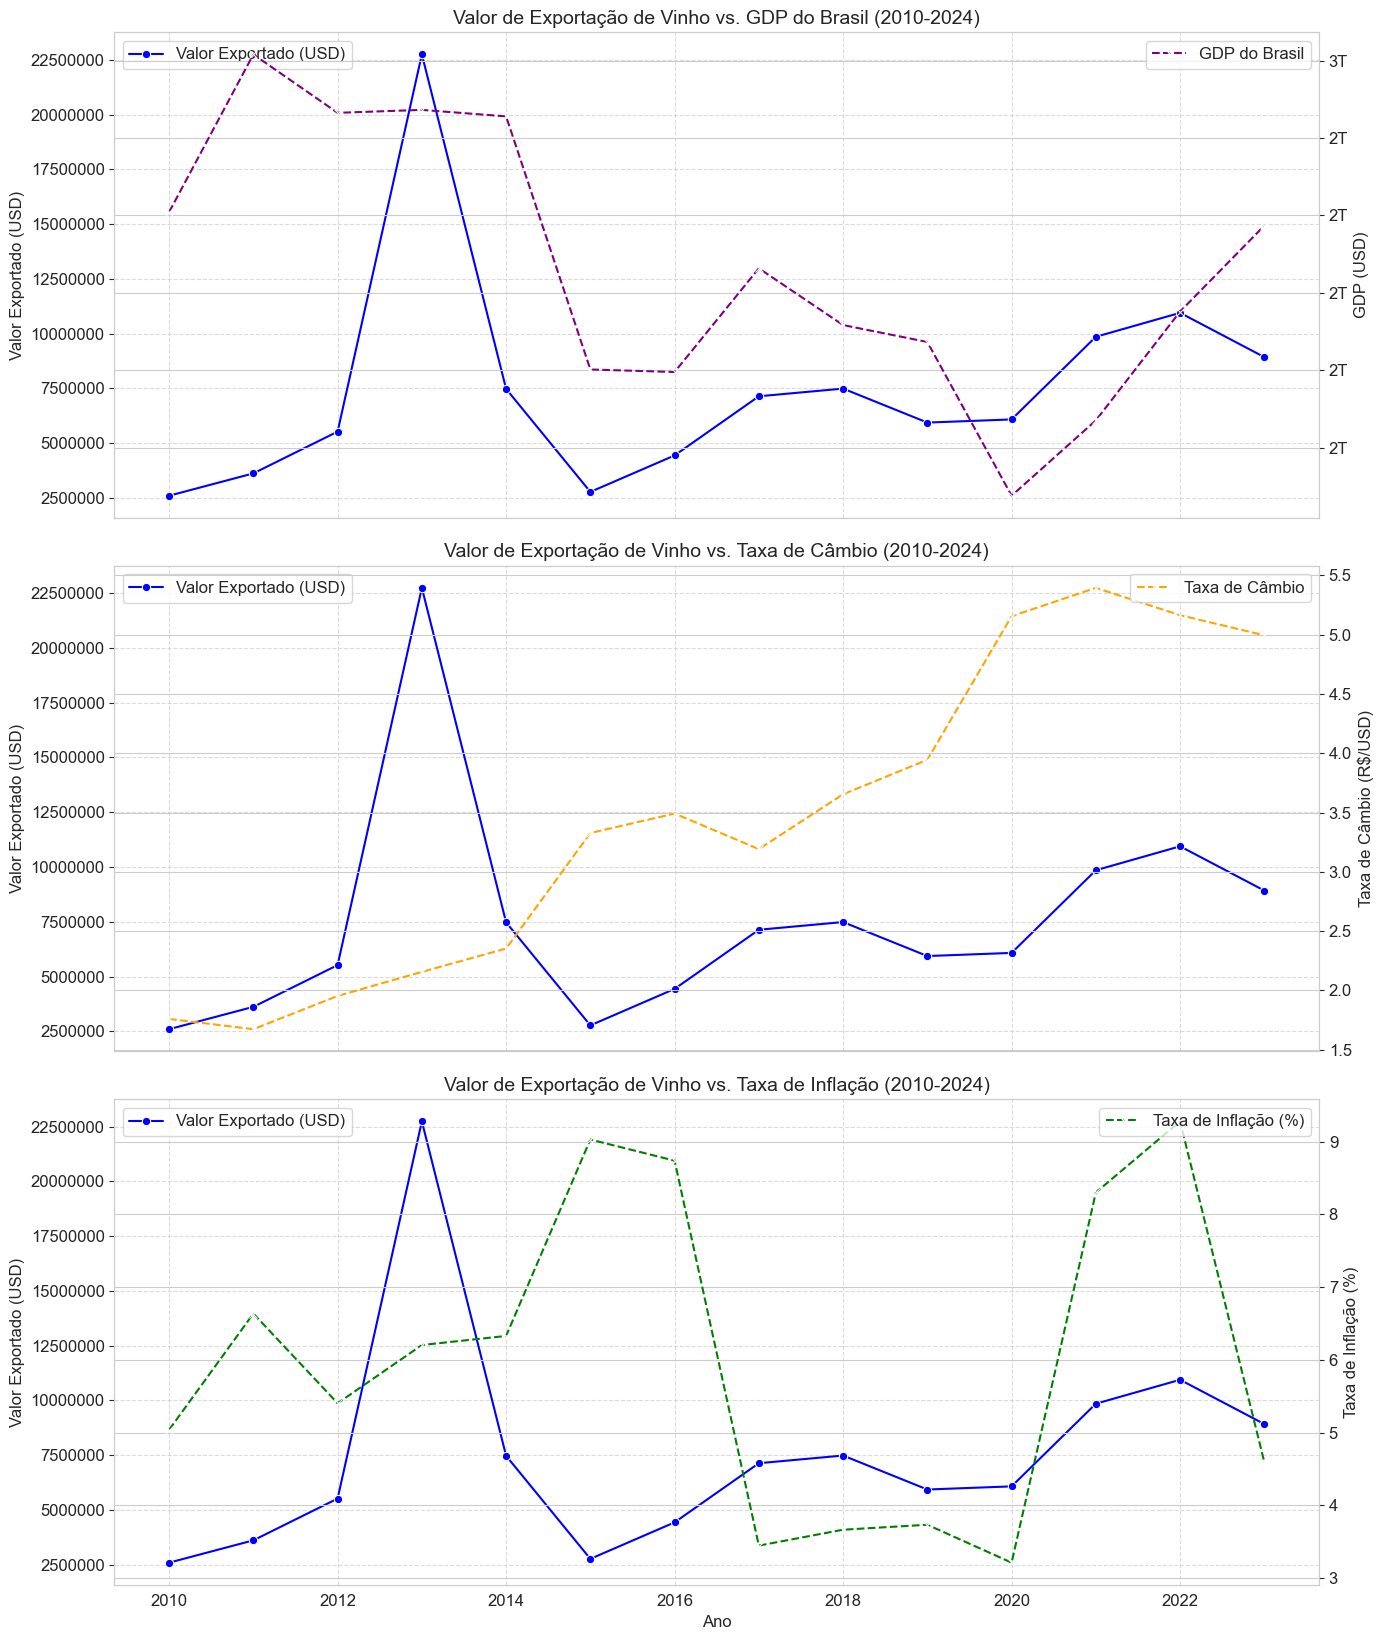

In [ ]:
# Célula 7 (Reestruturada): Análise e Integração com Dados Econômicos

print("\n--- Análise e Integração com Dados Econômicos ---")

# Verificar se os DataFrames necessários estão disponíveis
# df_export_clima_anual deve vir da Célula 6 (agora com métricas climáticas detalhadas)
if 'df_dados_economicos' in globals() and df_dados_economicos is not None and \
   'df_export_clima_anual' in locals() and df_export_clima_anual is not None:

    print("\n--- Informações do DataFrame df_dados_economicos ---")
    print(df_dados_economicos.info())
    print("\n--- Primeiras 5 linhas do df_dados_economicos ---")
    print(df_dados_economicos.head())
    print("\n--- Nomes das Colunas do df_dados_economicos ---")
    print(df_dados_economicos.columns.tolist())

    # Renomear 'Year' para 'Ano' para consistência antes do merge
    df_economicos_copia = df_dados_economicos.copy()
    if 'Year' in df_economicos_copia.columns:
        df_economicos_copia.rename(columns={'Year': 'Ano'}, inplace=True)
    
    # Filtrar dados econômicos para o Brasil no período de análise (2010-2024)
    ano_atual = df_exportacao['Ano'].max()
    ano_inicio_analise = ano_atual - 14

    df_economicos_brasil_filtrado = df_economicos_copia[
        (df_economicos_copia['Country Name'] == 'Brazil') &
        (df_economicos_copia['Ano'] >= ano_inicio_analise) &
        (df_economicos_copia['Ano'] <= ano_atual)
    ].copy()

    if not df_economicos_brasil_filtrado.empty:
        print(f"\nDados econômicos do Brasil filtrados para os anos de {ano_inicio_analise} a {ano_atual}.")
        print(f"Total de linhas econômicas do Brasil após filtro: {len(df_economicos_brasil_filtrado)}")
        print("\nPrimeiras 5 linhas do df_economicos_brasil_filtrado:")
        print(df_economicos_brasil_filtrado.head())

        # Fazer o merge com df_export_clima_anual (que já contém exportação e clima)
        df_final_analise = pd.merge(
            df_export_clima_anual,
            df_economicos_brasil_filtrado[['Ano', 'GDP', 'Inflation Rate', 'Taxa de Câmbio']],
            on='Ano',
            how='inner'
        )

        print("\n--- DataFrame Final para Análise (Exportação + Clima + Economia Brasil) ---")
        print(df_final_analise.head())
        print(f"\nColunas do DataFrame final mergeado: {df_final_analise.columns.tolist()}")

        # Gerar gráficos de correlação com indicadores econômicos do Brasil
        fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # 3 gráficos para GDP, Taxa de Câmbio, Inflation Rate

        # Gráfico 1: Valor de Exportação vs. GDP do Brasil
        sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[0], color='blue', label='Valor Exportado (USD)')
        axes[0].set_title('Valor de Exportação de Vinho vs. GDP do Brasil (2010-2024)', fontsize=14)
        axes[0].set_ylabel('Valor Exportado (USD)')
        from matplotlib.ticker import FuncFormatter
        def format_gdp(x, pos):
            if x >= 1e12: return f'{x*1e-12:,.0f}T' # Trilhões
            elif x >= 1e9: return f'{x*1e-9:,.0f}B' # Bilhões
            return f'{x:,.0f}'
        ax_gdp = axes[0].twinx()
        sns.lineplot(data=df_final_analise, x='Ano', y='GDP', marker='x', ax=ax_gdp, color='purple', linestyle='--', label='GDP do Brasil')
        ax_gdp.yaxis.set_major_formatter(FuncFormatter(format_gdp))
        ax_gdp.set_ylabel('GDP (USD)', fontsize=12)
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].ticklabel_format(style='plain', axis='y')
        axes[0].legend(loc="upper left")
        ax_gdp.legend(loc="upper right")

        # Gráfico 2: Valor de Exportação vs. Taxa de Câmbio
        sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[1], color='blue', label='Valor Exportado (USD)')
        axes[1].set_title('Valor de Exportação de Vinho vs. Taxa de Câmbio (2010-2024)', fontsize=14)
        axes[1].set_ylabel('Valor Exportado (USD)')
        ax_cambio = axes[1].twinx()
        sns.lineplot(data=df_final_analise, x='Ano', y='Taxa de Câmbio', marker='x', ax=ax_cambio, color='orange', linestyle='--', label='Taxa de Câmbio')
        ax_cambio.set_ylabel('Taxa de Câmbio (R$/USD)', fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].ticklabel_format(style='plain', axis='y')
        axes[1].legend(loc="upper left")
        ax_cambio.legend(loc="upper right")

        # Gráfico 3: Valor de Exportação vs. Taxa de Inflação
        sns.lineplot(data=df_final_analise, x='Ano', y='Total_Valor_USD_Anual', marker='o', ax=axes[2], color='blue', label='Valor Exportado (USD)')
        axes[2].set_title('Valor de Exportação de Vinho vs. Taxa de Inflação (2010-2024)', fontsize=14)
        axes[2].set_xlabel('Ano')
        axes[2].set_ylabel('Valor Exportado (USD)')
        ax_inflacao = axes[2].twinx()
        sns.lineplot(data=df_final_analise, x='Ano', y='Inflation Rate', marker='x', ax=ax_inflacao, color='green', linestyle='--', label='Taxa de Inflação (%)')
        ax_inflacao.set_ylabel('Taxa de Inflação (%)', fontsize=12)
        axes[2].grid(True, linestyle='--', alpha=0.7)
        axes[2].ticklabel_format(style='plain', axis='y')
        axes[2].legend(loc="upper left")
        ax_inflacao.legend(loc="upper right")

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print("\nDados econômicos do Brasil não encontrados para o período filtrado. Verifique o 'Country Name' e os anos.")

else:
    print("DataFrame 'df_dados_economicos' ou 'df_export_clima_anual' não está disponível. Verifique o carregamento das células anteriores.")

Sumário Geral para o Relatório (Pontos a Incluir)
Com base em todas as análises (gráficos de linha e heatmaps):

Panorama Geral da Exportação:

Apresente a tendência de Valor e Litros exportados nos últimos 15 anos (da Célula 5). Destaque anos de crescimento ou queda notáveis.

Mencione os Top 10 países de destino e discuta sua importância (ex: Paraguai, EUA, Rússia são os maiores em valor).

Impacto dos Fatores Climáticos na Produção:

Enfatize a forte correlação positiva entre a temperatura (média e, crucialmente, mínima média) e a produção total de vinhos (tanto Viníferas quanto Americanas). Isso sugere que invernos mais amenos podem favorecer safras mais volumosas.

Aponte que a precipitação total anual e o vento máximo mostram pouca correlação linear com a produção ou exportação, indicando que outros aspectos do clima (como o timing da chuva ou eventos extremos pontuais) podem ser mais relevantes do que os totais anuais.

Prospecção Futura (Clima):

Com o aquecimento global, se as temperaturas médias e mínimas médias continuarem a aumentar, isso pode levar a um aumento da produção de vinho no Brasil, assumindo que outros fatores não se tornem limitantes (ex: estresse hídrico por má distribuição de chuvas).

Discutir a necessidade de monitoramento mais granular (ex: temperaturas de geada, regime de chuvas em floração/frutificação) para melhor prever a safra.

Impacto dos Fatores Econômicos na Exportação:

Destaque a correlação positiva moderada do PIB do Brasil com as exportações, sugerindo que uma economia doméstica forte pode suportar ou impulsionar a capacidade exportadora.

Mencione a correlação positiva da taxa de câmbio (real desvalorizado). Isso é um fator externo importante que pode tornar o vinho brasileiro mais competitivo no mercado internacional em certos períodos.

Prospecção Futura (Economia):

Acompanhar as projeções de PIB e taxa de câmbio é crucial. Um real desvalorizado pode ser uma oportunidade para aumentar volume e valor de exportação no curto/médio prazo.

A estabilidade econômica e o crescimento do Brasil podem criar um ambiente mais favorável para investimentos na viticultura e expansão das exportações.

Análise por Tipo de Vinho (Viníferas, Americanas, Sem Classificação):

Apresente os Top 10 e Menos 10 produzidos para cada categoria.

Reforce que a relação entre produção e clima (principalmente temperatura) é consistente em Viníferas e Americanas.

Explique a natureza da categoria "Sem Classificação" e por que sua correlação com o clima é insignificante (provavelmente uma categoria residual/não primária).

Ações para Melhoria nas Exportações:

Monitoramento Climático Avançado: Investir em dados climáticos mais detalhados por região e por fase do ciclo da videira para otimizar a produção e mitigar riscos (ex: geadas, secas).

Estratégia de Mercados: Focar nos Top 10 países, mas também explorar novos mercados com base em oportunidades econômicas (crescimento de PIB, tendências de consumo de vinho).

Aproveitar Flutuações de Câmbio: Desenvolver estratégias de preço e marketing que tirem proveito de períodos de câmbio favorável para aumentar a competitividade.

Diversificação de Produção: Se as viníferas são mais sensíveis a geadas, mas têm maior valor agregado para exportação, pode-se investir em tecnologias de proteção (ventiladores, irrigação anti-geada) ou diversificar portfólio.

Marketing e Promoção: Reforçar a imagem do vinho brasileiro nos mercados-chave, destacando a qualidade e as características únicas que podem vir das condições climáticas do Brasil.



# Célula 16: Análise de Correlação e Gráficos - Produção Total Geral vs. Fatores Econômicos

print("\n--- Análise de Correlação e Gráficos: Produção Total Geral vs. Fatores Econômicos ---")

# Verificar se os DataFrames necessários estão disponíveis
# df_producao_total_anual vem da Célula 9
# df_economicos_brasil_filtrado vem da Célula 7
if 'df_producao_total_anual' in locals() and df_producao_total_anual is not None and \
   'df_economicos_brasil_filtrado' in locals() and df_economicos_brasil_filtrado is not None:

    # Fazer o merge entre Produção Total Anual e Dados Econômicos do Brasil
    # Assegurar que ambos os DataFrames estejam no mesmo período ou que o merge lide com isso
    # df_producao_total_anual vai até 2023, df_economicos_brasil_filtrado vai até 2024. O inner join pegará a interseção (até 2023).
    df_producao_economia = pd.merge(
        df_producao_total_anual,
        df_economicos_brasil_filtrado[['Ano', 'GDP', 'Inflation Rate', 'Taxa de Câmbio']],
        on='Ano',
        how='inner'
    )

    if not df_producao_economia.empty:
        print("\n--- DataFrame: Produção Total Geral e Fatores Econômicos (Merged) ---")
        print(df_producao_economia.head())
        print(f"\nColunas do DataFrame mergeado: {df_producao_economia.columns.tolist()}")

        # --- 1. Matriz de Correlação: Produção Total Geral vs. Fatores Econômicos ---
        print("\n======== Matriz de Correlação: Produção Total Geral vs. Fatores Econômicos ========")

        cols_producao_economia = [
            'Quantidade_Producao_kg',
            'GDP',
            'Inflation Rate',
            'Taxa de Câmbio'
        ]

        existing_cols_prod_eco = [col for col in cols_producao_economia if col in df_producao_economia.columns]

        if len(existing_cols_prod_eco) > 1:
            corr_producao_economia = df_producao_economia[existing_cols_prod_eco].corr()

            plt.figure(figsize=(8, 7))
            sns.heatmap(corr_producao_economia, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'})
            plt.title('Matriz de Correlação: Produção Total Geral vs. Economia (Brasil)', fontsize=16)
            plt.show()

            print("\n--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Geral vs. Economia (Brasil) ---")
            print(corr_producao_economia.to_string(float_format="%.2f"))
            print("\nFoco: Linha 'Quantidade_Producao_kg' para entender a influência dos fatores econômicos na produção.")
        else:
            print("Não há colunas suficientes para calcular a correlação para Produção vs. Economia.")

        # --- 2. Gráficos de Linha: Produção Total Geral vs. Fatores Econômicos ---
        print("\n======== Gráficos de Linha: Produção Total Geral vs. Fatores Econômicos ========")

        fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # 3 gráficos para GDP, Taxa de Câmbio, Inflação

        # Formatação para o eixo Y de GDP (Bilhões/Trilhões)
        from matplotlib.ticker import FuncFormatter
        def format_gdp(x, pos):
            if x >= 1e12: return f'{x*1e-12:,.0f}T'
            elif x >= 1e9: return f'{x*1e-9:,.0f}B'
            return f'{x:,.0f}'

        # Gráfico 1: Produção Total Geral vs. GDP do Brasil
        sns.lineplot(data=df_producao_economia, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[0], color='darkblue', label='Produção Total Geral (kg)')
        axes[0].set_title('Produção Total Geral de Vinhos vs. GDP do Brasil', fontsize=14)
        axes[0].set_ylabel('Produção Total (kg)')
        ax_gdp = axes[0].twinx()
        sns.lineplot(data=df_producao_economia, x='Ano', y='GDP', marker='x', ax=ax_gdp, color='purple', linestyle='--', label='GDP do Brasil')
        ax_gdp.yaxis.set_major_formatter(FuncFormatter(format_gdp))
        ax_gdp.set_ylabel('GDP (USD)', fontsize=12)
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].ticklabel_format(style='plain', axis='y')
        axes[0].legend(loc="upper left")
        ax_gdp.legend(loc="upper right")

        # Gráfico 2: Produção Total Geral vs. Taxa de Câmbio
        sns.lineplot(data=df_producao_economia, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[1], color='darkblue', label='Produção Total Geral (kg)')
        axes[1].set_title('Produção Total Geral de Vinhos vs. Taxa de Câmbio', fontsize=14)
        axes[1].set_ylabel('Produção Total (kg)')
        ax_cambio = axes[1].twinx()
        sns.lineplot(data=df_producao_economia, x='Ano', y='Taxa de Câmbio', marker='x', ax=ax_cambio, color='orange', linestyle='--', label='Taxa de Câmbio (R$/USD)')
        ax_cambio.set_ylabel('Taxa de Câmbio (R$/USD)', fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].ticklabel_format(style='plain', axis='y')
        axes[1].legend(loc="upper left")
        ax_cambio.legend(loc="upper right")

        # Gráfico 3: Produção Total Geral vs. Taxa de Inflação
        sns.lineplot(data=df_producao_economia, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[2], color='darkblue', label='Produção Total Geral (kg)')
        axes[2].set_title('Produção Total Geral de Vinhos vs. Taxa de Inflação', fontsize=14)
        axes[2].set_xlabel('Ano')
        axes[2].set_ylabel('Produção Total (kg)')
        ax_inflacao = axes[2].twinx()
        sns.lineplot(data=df_producao_economia, x='Ano', y='Inflation Rate', marker='x', ax=ax_inflacao, color='green', linestyle='--', label='Taxa de Inflação (%)')
        ax_inflacao.set_ylabel('Taxa de Inflação (%)', fontsize=12)
        axes[2].grid(True, linestyle='--', alpha=0.7)
        axes[2].ticklabel_format(style='plain', axis='y')
        axes[2].legend(loc="upper left")
        ax_inflacao.legend(loc="upper right")

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print("Não foi possível realizar o merge entre produção e dados econômicos para o período analisado.")

else:
    print("DataFrames 'df_producao_total_anual' ou 'df_economicos_brasil_filtrado' não estão disponíveis. Verifique as células anteriores.")


--- Análise de Correlação e Gráficos: Produção Total Geral vs. Fatores Econômicos ---

--- DataFrame: Produção Total Geral e Fatores Econômicos (Merged) ---
    Ano  Quantidade_Producao_kg           GDP  Inflation Rate  Taxa de Câmbio
0  2010               642820786  2.208838e+12        5.038727        1.759227
1  2011               921104534  2.616156e+12        6.636450        1.672829
2  2012               857603200  2.465228e+12        5.403499        1.953069
3  2013               743277338  2.472820e+12        6.204311        2.156089
4  2014               748536510  2.456044e+12        6.329040        2.352952

Colunas do DataFrame mergeado: ['Ano', 'Quantidade_Producao_kg', 'GDP', 'Inflation Rate', 'Taxa de Câmbio']

======== Matriz de Correlação: Produção Total Geral vs. Fatores Econômicos ========


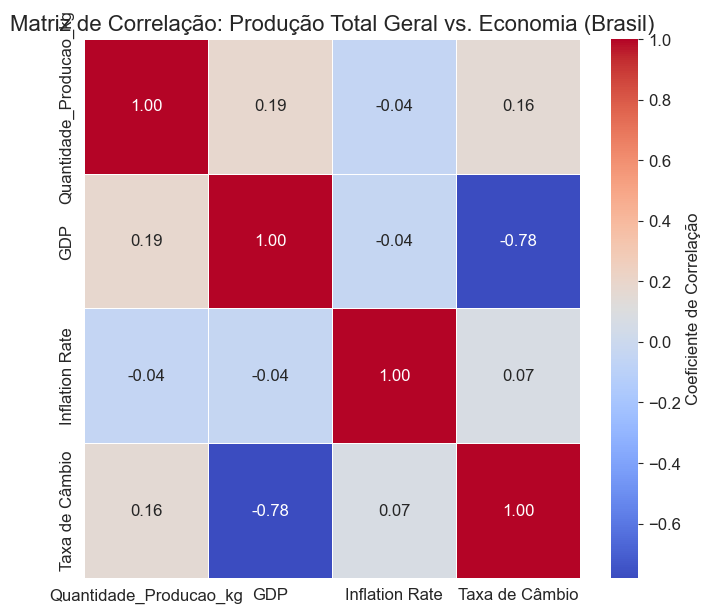


--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Geral vs. Economia (Brasil) ---
                        Quantidade_Producao_kg   GDP  Inflation Rate  Taxa de Câmbio
Quantidade_Producao_kg                    1.00  0.19           -0.04            0.16
GDP                                       0.19  1.00           -0.04           -0.78
Inflation Rate                           -0.04 -0.04            1.00            0.07
Taxa de Câmbio                            0.16 -0.78            0.07            1.00

Foco: Linha 'Quantidade_Producao_kg' para entender a influência dos fatores econômicos na produção.

======== Gráficos de Linha: Produção Total Geral vs. Fatores Econômicos ========


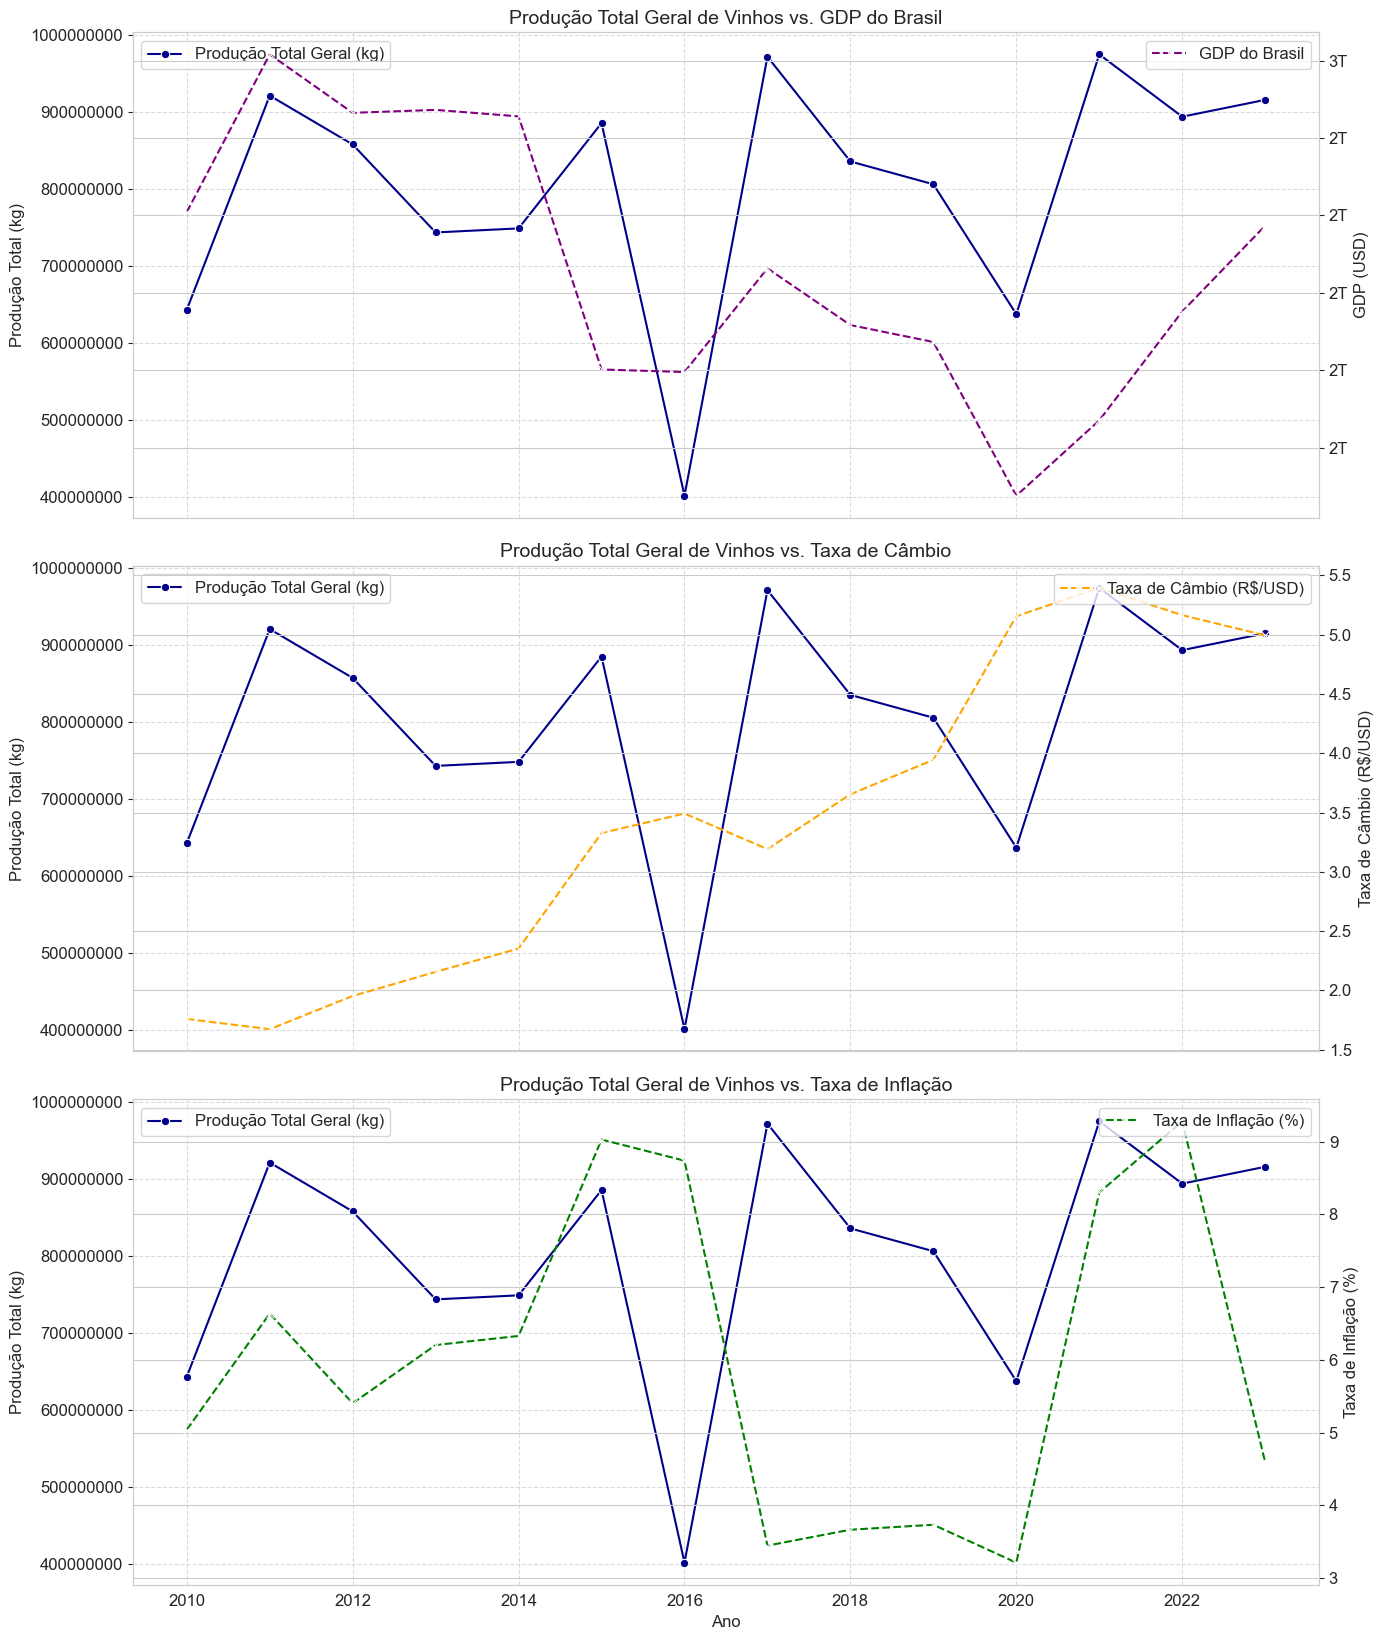

In [ ]:
# Célula 16: Análise de Correlação e Gráficos - Produção Total Geral vs. Fatores Econômicos

print("\n--- Análise de Correlação e Gráficos: Produção Total Geral vs. Fatores Econômicos ---")

# Verificar se os DataFrames necessários estão disponíveis
# df_producao_total_anual vem da Célula 9
# df_economicos_brasil_filtrado vem da Célula 7
if 'df_producao_total_anual' in locals() and df_producao_total_anual is not None and \
   'df_economicos_brasil_filtrado' in locals() and df_economicos_brasil_filtrado is not None:

    # Fazer o merge entre Produção Total Anual e Dados Econômicos do Brasil
    # Assegurar que ambos os DataFrames estejam no mesmo período ou que o merge lide com isso
    # df_producao_total_anual vai até 2023, df_economicos_brasil_filtrado vai até 2024. O inner join pegará a interseção (até 2023).
    df_producao_economia = pd.merge(
        df_producao_total_anual,
        df_economicos_brasil_filtrado[['Ano', 'GDP', 'Inflation Rate', 'Taxa de Câmbio']],
        on='Ano',
        how='inner'
    )

    if not df_producao_economia.empty:
        print("\n--- DataFrame: Produção Total Geral e Fatores Econômicos (Merged) ---")
        print(df_producao_economia.head())
        print(f"\nColunas do DataFrame mergeado: {df_producao_economia.columns.tolist()}")

        # --- 1. Matriz de Correlação: Produção Total Geral vs. Fatores Econômicos ---
        print("\n======== Matriz de Correlação: Produção Total Geral vs. Fatores Econômicos ========")

        cols_producao_economia = [
            'Quantidade_Producao_kg',
            'GDP',
            'Inflation Rate',
            'Taxa de Câmbio'
        ]

        existing_cols_prod_eco = [col for col in cols_producao_economia if col in df_producao_economia.columns]

        if len(existing_cols_prod_eco) > 1:
            corr_producao_economia = df_producao_economia[existing_cols_prod_eco].corr()

            plt.figure(figsize=(8, 7))
            sns.heatmap(corr_producao_economia, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'})
            plt.title('Matriz de Correlação: Produção Total Geral vs. Economia (Brasil)', fontsize=16)
            plt.show()

            print("\n--- VALORES DA MATRIZ DE CORRELAÇÃO: Produção Total Geral vs. Economia (Brasil) ---")
            print(corr_producao_economia.to_string(float_format="%.2f"))
            print("\nFoco: Linha 'Quantidade_Producao_kg' para entender a influência dos fatores econômicos na produção.")
        else:
            print("Não há colunas suficientes para calcular a correlação para Produção vs. Economia.")

        # --- 2. Gráficos de Linha: Produção Total Geral vs. Fatores Econômicos ---
        print("\n======== Gráficos de Linha: Produção Total Geral vs. Fatores Econômicos ========")

        fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True) # 3 gráficos para GDP, Taxa de Câmbio, Inflação

        # Formatação para o eixo Y de GDP (Bilhões/Trilhões)
        from matplotlib.ticker import FuncFormatter
        def format_gdp(x, pos):
            if x >= 1e12: return f'{x*1e-12:,.0f}T'
            elif x >= 1e9: return f'{x*1e-9:,.0f}B'
            return f'{x:,.0f}'

        # Gráfico 1: Produção Total Geral vs. GDP do Brasil
        sns.lineplot(data=df_producao_economia, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[0], color='darkblue', label='Produção Total Geral (kg)')
        axes[0].set_title('Produção Total Geral de Vinhos vs. GDP do Brasil', fontsize=14)
        axes[0].set_ylabel('Produção Total (kg)')
        ax_gdp = axes[0].twinx()
        sns.lineplot(data=df_producao_economia, x='Ano', y='GDP', marker='x', ax=ax_gdp, color='purple', linestyle='--', label='GDP do Brasil')
        ax_gdp.yaxis.set_major_formatter(FuncFormatter(format_gdp))
        ax_gdp.set_ylabel('GDP (USD)', fontsize=12)
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].ticklabel_format(style='plain', axis='y')
        axes[0].legend(loc="upper left")
        ax_gdp.legend(loc="upper right")

        # Gráfico 2: Produção Total Geral vs. Taxa de Câmbio
        sns.lineplot(data=df_producao_economia, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[1], color='darkblue', label='Produção Total Geral (kg)')
        axes[1].set_title('Produção Total Geral de Vinhos vs. Taxa de Câmbio', fontsize=14)
        axes[1].set_ylabel('Produção Total (kg)')
        ax_cambio = axes[1].twinx()
        sns.lineplot(data=df_producao_economia, x='Ano', y='Taxa de Câmbio', marker='x', ax=ax_cambio, color='orange', linestyle='--', label='Taxa de Câmbio (R$/USD)')
        ax_cambio.set_ylabel('Taxa de Câmbio (R$/USD)', fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].ticklabel_format(style='plain', axis='y')
        axes[1].legend(loc="upper left")
        ax_cambio.legend(loc="upper right")

        # Gráfico 3: Produção Total Geral vs. Taxa de Inflação
        sns.lineplot(data=df_producao_economia, x='Ano', y='Quantidade_Producao_kg', marker='o', ax=axes[2], color='darkblue', label='Produção Total Geral (kg)')
        axes[2].set_title('Produção Total Geral de Vinhos vs. Taxa de Inflação', fontsize=14)
        axes[2].set_xlabel('Ano')
        axes[2].set_ylabel('Produção Total (kg)')
        ax_inflacao = axes[2].twinx()
        sns.lineplot(data=df_producao_economia, x='Ano', y='Inflation Rate', marker='x', ax=ax_inflacao, color='green', linestyle='--', label='Taxa de Inflação (%)')
        ax_inflacao.set_ylabel('Taxa de Inflação (%)', fontsize=12)
        axes[2].grid(True, linestyle='--', alpha=0.7)
        axes[2].ticklabel_format(style='plain', axis='y')
        axes[2].legend(loc="upper left")
        ax_inflacao.legend(loc="upper right")

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    else:
        print("Não foi possível realizar o merge entre produção e dados econômicos para o período analisado.")

else:
    print("DataFrames 'df_producao_total_anual' ou 'df_economicos_brasil_filtrado' não estão disponíveis. Verifique as células anteriores.")


--- Gerando Gráfico Temporal das Exportações para a Rússia ---

--- Dados de Exportação para a Rússia (Primeiras 5 linhas) ---
      Ano    País  Total_Litros  Total_Valor_USD
112  2010  Rússia             0                0
253  2011  Rússia             0                0
394  2012  Rússia       4528176          2103968
535  2013  Rússia       5893291         14795694
676  2014  Rússia        190656            61440


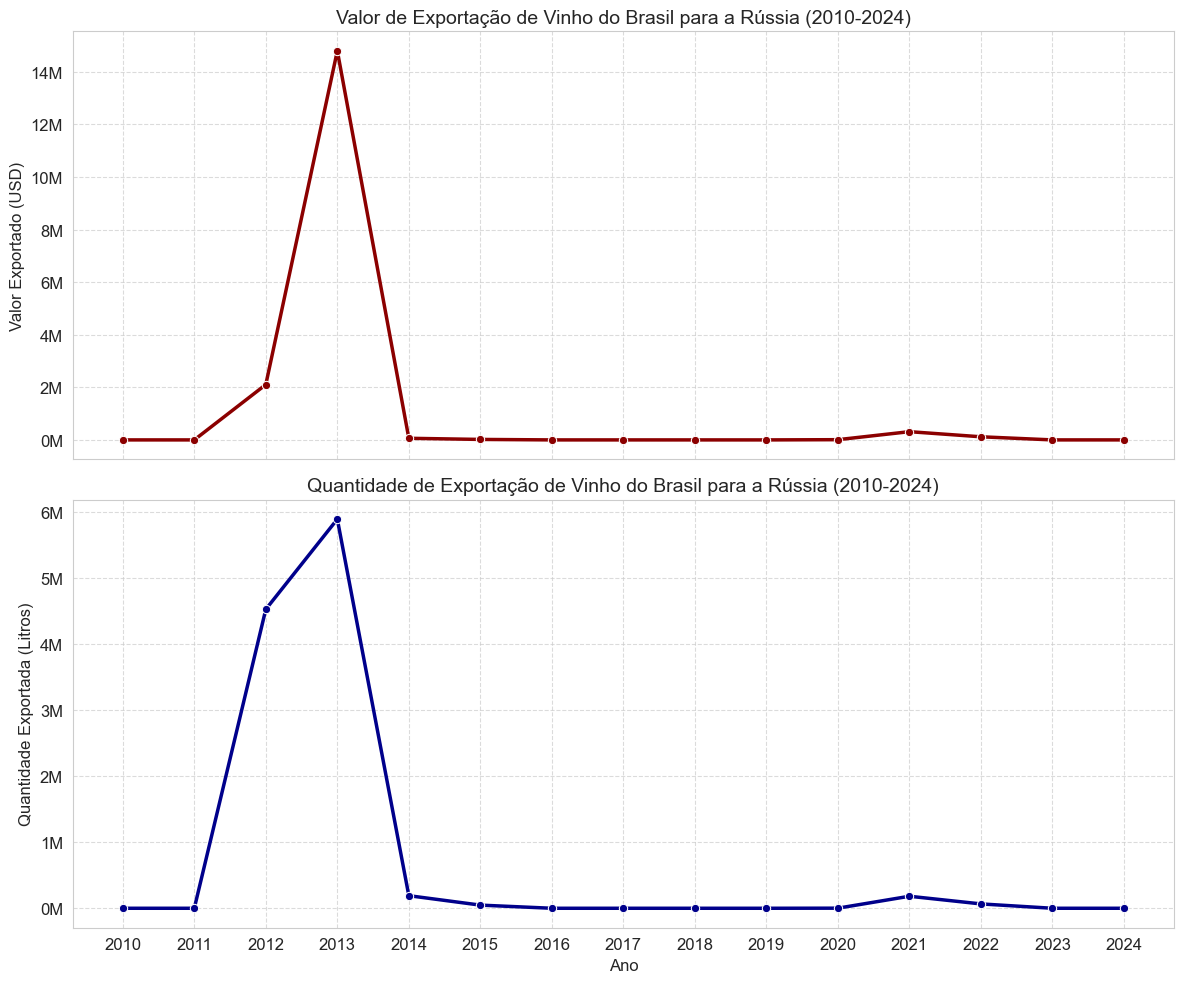


--- Pontos Chave para o Relatório (Gráfico Rússia) ---
1. Observe a tendência de Valor e Litros ao longo dos anos.
2. Destaque o pico de exportação para a Rússia em 2013-2014 (se visualmente aparente).
3. Comente sobre a queda pós-2014, se houver, e como isso se alinha ou não com o contexto das sanções/contra-sanções.
4. Este gráfico é crucial para ilustrar a oportunidade geopolítica que o Brasil aproveitou.


In [ ]:
# Célula 17: Gráfico Temporal das Exportações de Vinho do Brasil para a Rússia

print("\n--- Gerando Gráfico Temporal das Exportações para a Rússia ---")

# Verificar se df_montante_exportacao está disponível
if 'df_montante_exportacao' in locals() and df_montante_exportacao is not None:
    # Filtrar dados para a Rússia
    df_exportacao_russia = df_montante_exportacao[df_montante_exportacao['País'] == 'Rússia'].copy()

    if not df_exportacao_russia.empty:
        # Garantir que os anos estão ordenados
        df_exportacao_russia = df_exportacao_russia.sort_values('Ano')

        print("\n--- Dados de Exportação para a Rússia (Primeiras 5 linhas) ---")
        print(df_exportacao_russia.head())

        # Criar os dois subplots para Valor e Litros
        fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        # Gráfico 1: Valor de Exportação para a Rússia (USD)
        sns.lineplot(data=df_exportacao_russia, x='Ano', y='Total_Valor_USD', marker='o', color='darkred', linewidth=2.5, ax=axes[0])
        axes[0].set_title('Valor de Exportação de Vinho do Brasil para a Rússia (2010-2024)', fontsize=14)
        axes[0].set_ylabel('Valor Exportado (USD)', fontsize=12)
        axes[0].grid(True, linestyle='--', alpha=0.7)

        # Formatação do eixo Y para USD (Milhões), usando a função definida anteriormente
        # Assegure-se de que a função 'millions_formatter' da Célula 5 esteja definida globalmente ou recriada aqui.
        # Vou recriá-la para garantir que funcione independentemente.
        from matplotlib.ticker import FuncFormatter
        def millions_formatter(x, pos):
            return f'{x*1e-6:,.0f}M'
        axes[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
        
        # Adicionar anotações para o pico (2013-2014) e a queda (pós-2014, se houver)
        # Pode ser necessário ajustar os valores e o texto da anotação
        # Ex: pico_ano = df_exportacao_russia.loc[df_exportacao_russia['Total_Valor_USD'].idxmax()]
        # axes[0].annotate(f'Pico: {pico_ano["Total_Valor_USD"]*1e-6:.1f}M', (pico_ano['Ano'], pico_ano['Total_Valor_USD']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')


        # Gráfico 2: Quantidade de Exportação para a Rússia (Litros)
        sns.lineplot(data=df_exportacao_russia, x='Ano', y='Total_Litros', marker='o', color='darkblue', linewidth=2.5, ax=axes[1])
        axes[1].set_title('Quantidade de Exportação de Vinho do Brasil para a Rússia (2010-2024)', fontsize=14)
        axes[1].set_xlabel('Ano', fontsize=12)
        axes[1].set_ylabel('Quantidade Exportada (Litros)', fontsize=12)
        axes[1].grid(True, linestyle='--', alpha=0.7)

        # Formatação do eixo Y para Litros (Milhões)
        def millions_formatter_liters(x, pos):
            return f'{x*1e-6:,.0f}M'
        axes[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter_liters))

        # Configurar ticks do eixo X para mostrar todos os anos (se não forem muitos)
        axes[0].set_xticks(df_exportacao_russia['Ano'])
        axes[0].set_xticklabels(df_exportacao_russia['Ano'], rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

        print("\n--- Pontos Chave para o Relatório (Gráfico Rússia) ---")
        print("1. Observe a tendência de Valor e Litros ao longo dos anos.")
        print("2. Destaque o pico de exportação para a Rússia em 2013-2014 (se visualmente aparente).")
        print("3. Comente sobre a queda pós-2014, se houver, e como isso se alinha ou não com o contexto das sanções/contra-sanções.")
        print("4. Este gráfico é crucial para ilustrar a oportunidade geopolítica que o Brasil aproveitou.")

    else:
        print("Dados de exportação para a Rússia não encontrados no DataFrame. Verifique o nome do país.")

else:
    print("DataFrame 'df_montante_exportacao' não está disponível. Verifique a Célula 4.")

In [ ]:
# Célula 17 (Ajustada - Gerar Mapa de Bolhas): Exportação de Vinho do Brasil por País

print("\n--- Gerando Mapa de Bolhas de Exportação de Vinho do Brasil por País ---")

# Definir o caminho base para os datasets (incluindo o novo countries.csv)
base_path = "zProjeto_Final/Datasets/" # Ajuste se o countries.csv estiver em outro local

# Step 1: Load Country Coordinates from local file
try:
    df_countries = pd.read_csv(base_path + "countries.csv")
    df_countries = df_countries.rename(columns={'name': 'País', 'latitude': 'latitude', 'longitude': 'longitude'})
    print("Successfully loaded df_countries from local file. First 5 rows:")
    print(df_countries.head())
    print(f"\nColumns in df_countries: {df_countries.columns.tolist()}")
except Exception as e:
    print(f"Error loading local country coordinates file: {e}. Please ensure 'countries.csv' is in the specified path.")
    df_countries = None

# Step 2: Prepare Export Data
# Assuming df_montante_exportacao is already available in the environment from Célula 4
if 'df_montante_exportacao' in locals() and df_montante_exportacao is not None:
    df_export_map = df_montante_exportacao.groupby('País')['Total_Valor_USD'].sum().reset_index()
    print("\nAggregated df_export_map. First 5 rows:")
    print(df_export_map.head())

    # Filter out countries with Total_Valor_USD == 0 (as per user request)
    df_export_map_filtered = df_export_map[df_export_map['Total_Valor_USD'] > 0].copy()
    print(f"\nFiltered df_export_map (Total_Valor_USD > 0). Total rows: {len(df_export_map_filtered)}")
    
    # Step 3: Merge Data
    # Perform a left merge to keep all countries with coordinates and then fill NaN for export data
    df_map_data = pd.merge(df_countries, df_export_map_filtered, on='País', how='left')

    # Fill NaN Total_Valor_USD with 0 for countries not in our filtered export data (meaning 0 or no export)
    df_map_data['Total_Valor_USD'] = df_map_data['Total_Valor_USD'].fillna(0)

    # Filter again to strictly show only bubbles for Total_Valor_USD > 0
    df_map_data_final = df_map_data[df_map_data['Total_Valor_USD'] > 0].copy()

    print(f"\nFinal df_map_data_final (merged and filtered). Total rows: {len(df_map_data_final)}")
    print(df_map_data_final.head())

    # Step 4: Create the Map (Altair)
    if not df_map_data_final.empty:
        # Load a base world map GeoJSON for context (common practice for choropleth maps)
        # Using a TopoJSON URL directly as a base layer for context, it's a common Altair pattern
        # This one is frequently used with Altair examples for world maps.
        world_map = alt.UrlData(url="https://raw.githubusercontent.com/vega/vega-datasets/next/data/world-110m.json", format={"type": "topojson", "feature": "countries"})

        background = alt.Chart(world_map).mark_geoshape(
            fill='lightgray',
            stroke='white'
        ).project('equirectangular') # A good projection for world maps

        # Plot bubbles for export data
        # Scale size dynamically based on the Total_Valor_USD
        bubbles = alt.Chart(df_map_data_final).mark_circle().encode(
            longitude='longitude:Q',
            latitude='latitude:Q',
            size=alt.Size('Total_Valor_USD:Q',
                          scale=alt.Scale(rangeMin=10, rangeMax=2000), # Adjust range for bubble size
                          legend=alt.Legend(title="Valor Total (USD)", format='$,.0f')),
            color=alt.value('red'), # All bubbles in red
            opacity=alt.value(0.7),
            tooltip=['País', alt.Tooltip('Total_Valor_USD', format='$,.0f')]
        )

        chart = (background + bubbles).properties(
            title='Exportação de Vinho do Brasil por País de Destino (Valor Total em USD)',
            width=800,
            height=450
        )

        # Save the chart as a JSON file (Altair's output format)
        chart.save('export_map_bubbles.json')
        print("\nMap 'export_map_bubbles.json' created successfully. You can open this JSON file in a browser with a Vega-Lite renderer (e.g., Vega Editor) to view the interactive map.")
    else:
        print("\nNo data to plot after merging and filtering for positive export values. The map will not be generated.")
else:
    print("DataFrame 'df_montante_exportacao' not found. Please ensure it's loaded from Célula 4 in your environment.")


--- Gerando Mapa de Bolhas de Exportação de Vinho do Brasil por País ---
Error loading local country coordinates file: name 'pd' is not defined. Please ensure 'countries.csv' is in the specified path.
DataFrame 'df_montante_exportacao' not found. Please ensure it's loaded from Célula 4 in your environment.
